In [127]:
# Import the Warnings
import warnings
warnings.filterwarnings('ignore')

In [128]:
# Importing the Usefull libraries.
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [129]:
inp0 = pd.read_csv(r"D:\Courses\IIIT Banglore DS\Credit EDA Case Study\application_data.csv")
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [130]:
# shape of the data frame
inp0.shape

(307511, 122)

In [131]:
# count of missing values from each column in the dataframe
inp0.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [132]:
#precentage of missing values from the columns
round(100*(inp0.isnull().sum()/len(inp0.index)),2).sort_values(ascending=False)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

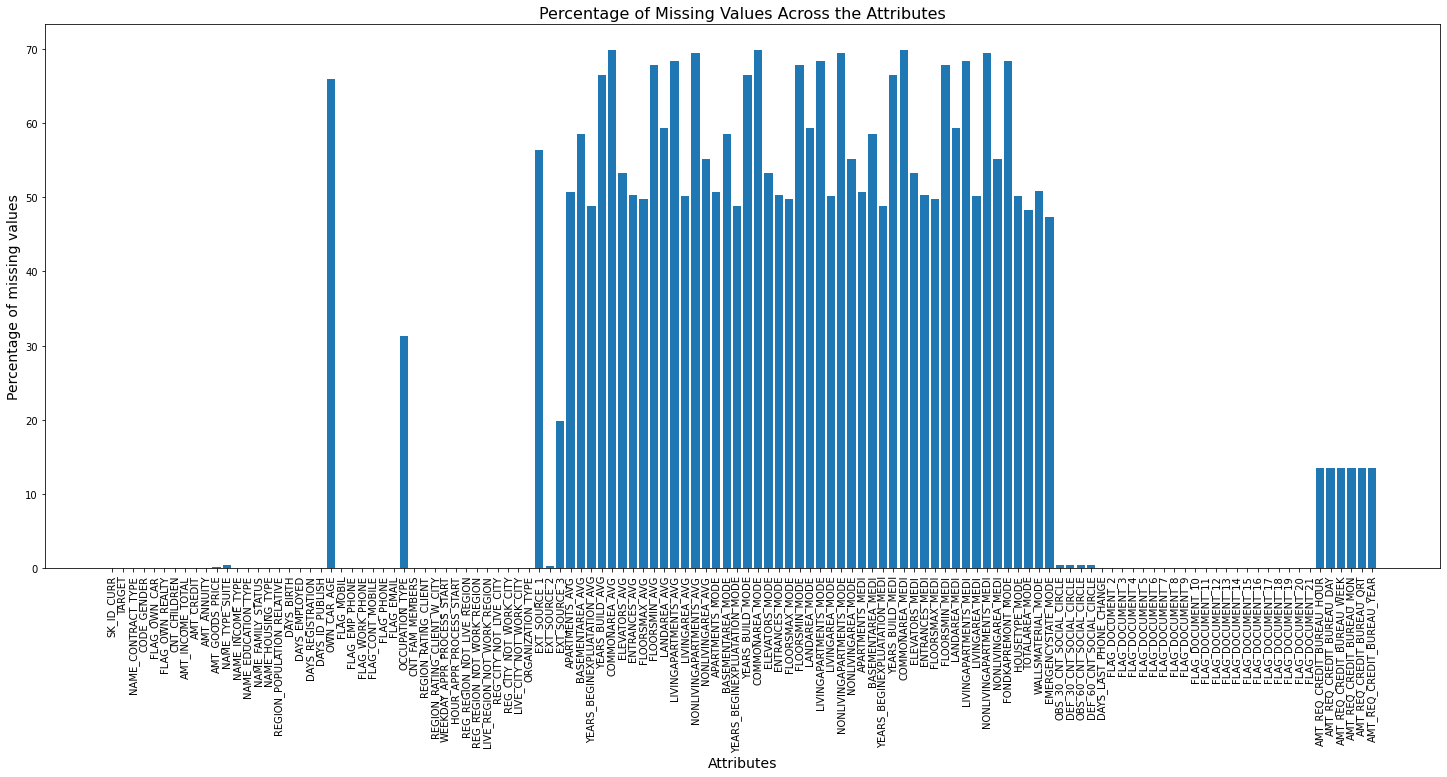

In [133]:
# plot a bar graph for the null value percentage in the data frame
plt.figure(figsize=(25,10))
plt.bar(inp0.columns,100*inp0.isnull().sum()/len(inp0))
plt.title('Percentage of Missing Values Across the Attributes',fontdict={'fontsize':16})
plt.xticks(rotation=90)
plt.xlabel("Attributes",fontdict={'fontsize':14, 'fontweight':5})
plt.ylabel("Percentage of missing values",fontdict={'fontsize':14, 'fontweight':5})
plt.show()


In [134]:
# list of columns having null value percentage more than 35 percentage
null_columns = inp0.columns[inp0.isnull().sum()/len(inp0) > 0.35].sort_values(ascending=False)


In [135]:
# print count of null_columns
print(len(null_columns))
null_columns

49


Index(['YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'WALLSMATERIAL_MODE', 'TOTALAREA_MODE',
       'OWN_CAR_AGE', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'LIVINGAREA_AVG',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAPARTMENTS_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI',
       'LANDAREA_AVG', 'HOUSETYPE_MODE', 'FONDKAPREMONT_MODE',
       'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'EXT_SOURCE_1', 'ENTRANCES_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'EMERGENCYSTATE_MODE',
       'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'COMMONAREA_MODE',
       'COMMONAREA_MEDI', 'COMMONAREA_AVG', 'BASEMENTAR

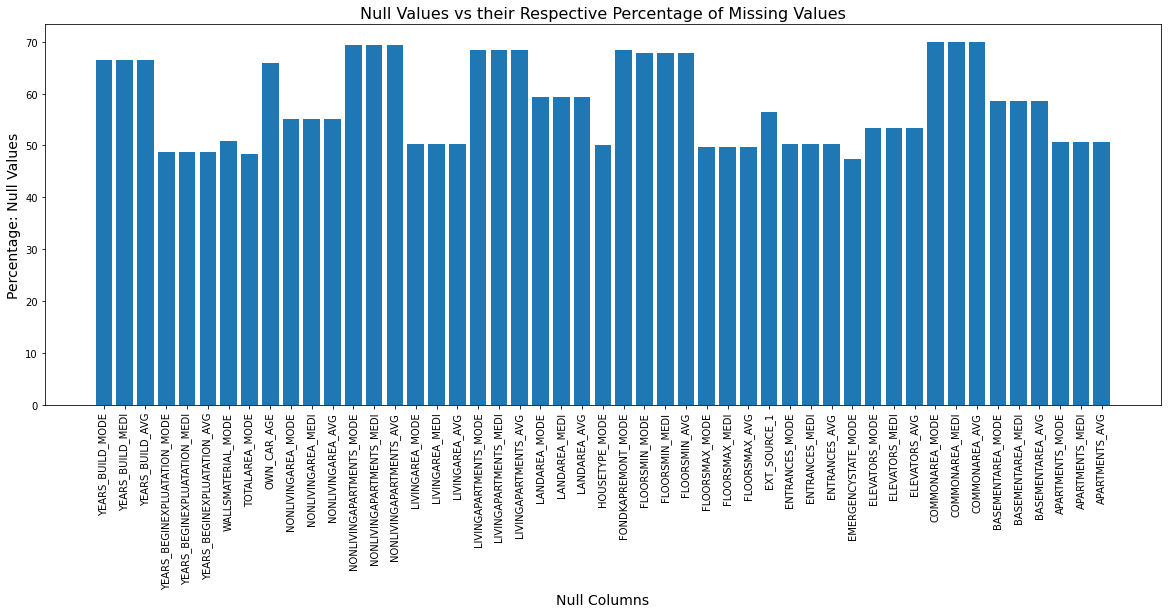

In [136]:
# plot a bar graph for the null value percentage in the data frame
plt.figure(figsize=(20,7))
plt.bar(null_columns,100*inp0[null_columns].isnull().sum()/len(inp0))
plt.title("Null Values vs their Respective Percentage of Missing Values", fontdict={'fontsize':16})
plt.xticks(rotation=90)
plt.xlabel("Null Columns",fontdict={"fontsize":14,"fontweight":6})                  
plt.ylabel("Percentage: Null Values",fontdict={"fontsize":14,"fontweight":6})
plt.show()


In [137]:
# drop the columns having null value percentage more than 35 percentage
inp0.drop(null_columns,axis=1,inplace=True) 

In [138]:
inp0.shape

(307511, 73)

In [139]:
# null value percentage in descending order

round(100*(inp0.isnull().sum()/len(inp0.index)),2).sort_values(ascending=False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
                               ...  
HOUR_APPR_PROCESS_START         0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_CITY_NOT_LIVE_CITY          0.00
Length: 73, dtype: float64

In [140]:
# Handling the missing values in Occupational Type

# check the value counts of the categorical variable 'OCCUPATION_TYPE'
inp0['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [141]:
inp0['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [142]:
# Impute null values as Unkown
inp0['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)


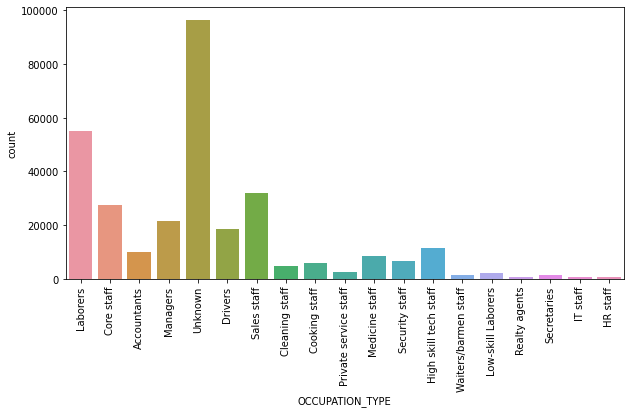

In [143]:
#Plotting a count graph to see the different types of loan takers

plt.figure(figsize = (10,5))
sns.countplot(data = inp0, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

Observations

- Looking at the plot, Laborers has the highest number of loan applicants
- For imputation, it would be better to leave the data as is (missing values being 31.35%) and not impute to mean/median/mode as it may bias the data in later computations

In [144]:
# Analysing EXT_SOURCE_3

# check the description of the variable
inp0['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

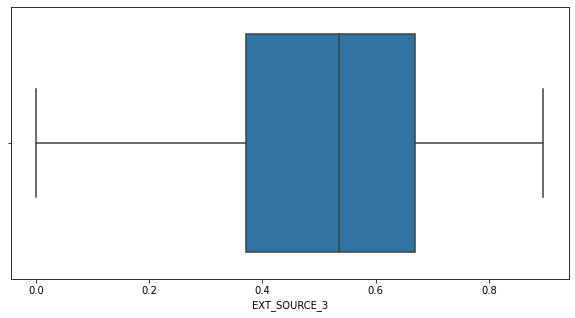

In [145]:
# plot the histogram of 'EXT_SOURCE_3'

plt.figure(figsize=(10,5))
sns.boxplot(x = inp0['EXT_SOURCE_3'].dropna())
plt.show()

In [146]:
# checking for outliers
inp0['EXT_SOURCE_3'].quantile([0,0.1,0.15,0.2,0.25,0.5,0.75,0.9,0.95,0.99,1])

0.00    0.000527
0.10    0.227613
0.15    0.283712
0.20    0.329655
0.25    0.370650
0.50    0.535276
0.75    0.669057
0.90    0.749022
0.95    0.786267
0.99    0.832785
1.00    0.896010
Name: EXT_SOURCE_3, dtype: float64

In [147]:
# calculating the inter quartile ranges
q1 = inp0['EXT_SOURCE_3'].quantile(0.25)
q3 = inp0['EXT_SOURCE_3'].quantile(0.75)
iqr = q3 - q1
print(iqr)

0.29840706245242243


In [148]:
# finding the min value and max value of the box plot

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr
print(f'lower_whisker: {lower_whisker}')
print(f'upper_whisker: {upper_whisker}')

lower_whisker: -0.07696096134865194
upper_whisker: 1.1166672884610378


In [149]:
# mean, mode of the EXT_SOURCE_3
print(inp0['EXT_SOURCE_3'].mean())
print(inp0['EXT_SOURCE_3'].mode()[0])
print(inp0.EXT_SOURCE_3.median())

0.5108529061799658
0.746300213050371
0.5352762504724826


In [150]:
# observations
# 1. We see from the graph that the outliers lie in the lower half of the lower_whiskers
# 2. The mean and median are almost same
# 3. Thus the null values can be replaced by the median of the data

# imputing the null values with the median
inp0['EXT_SOURCE_3'].fillna(inp0.EXT_SOURCE_3.median(), inplace=True)


In [151]:

# imputing the null values with the median
inp0['EXT_SOURCE_3'].fillna(inp0.EXT_SOURCE_3.median(), inplace=True)


In [152]:
# Analysing AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON,
# AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR

# check the description of the variables
inp0[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()


AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

In [153]:
# observations from the description

# 1. The mean of the variables is almost same as the median
# 2. The min value of the variables is 0
# 3. The max value of the variables is 261
# 4. The 75% of the variables is 0
# 5. The 25% of the variables is 0
# 6. The 50% of the variables is 0 except for AMT_REQ_CREDIT_BUREAU_YEAR


In [154]:
# Finding mode of all these variables
print(inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])
print(inp0['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])
print(inp0['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])
print(inp0['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])
print(inp0['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])
print(inp0['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])

0.0
0.0
0.0
0.0
0.0
0.0


In [155]:
##### Final observations and conclusion 
#  1. The mode of all the variables is 0
#  2. The percentage of null values is higher and close 13.50%
#  3. Thus imputing the null values with the mode of the data can hinder the analysis

In [156]:
# Checking the Null value columns with null percentage <1%

# columns having null value percentage less than 1 percentage
null_count = inp0.isnull().sum()
null_percentage = round((inp0.isnull().sum()/inp0.shape[0])*100, 2)

In [157]:
null_inp0 = pd.DataFrame({'column_name' : inp0.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_inp0.reset_index(drop = True, inplace = True)

In [158]:
null_inp0.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
72  AMT_REQ_CREDIT_BUREAU_YEAR       41519             13.5
67  AMT_REQ_CREDIT_BUREAU_HOUR       41519             13.5
71   AMT_REQ_CREDIT_BUREAU_QRT       41519             13.5
70   AMT_REQ_CREDIT_BUREAU_MON       41519             13.5
69  AMT_REQ_CREDIT_BUREAU_WEEK       41519             13.5
..                         ...         ...              ...
25                  FLAG_PHONE           0              0.0
24            FLAG_CONT_MOBILE           0              0.0
23             FLAG_WORK_PHONE           0              0.0
22              FLAG_EMP_PHONE           0              0.0
36      REG_CITY_NOT_LIVE_CITY           0              0.0

[73 rows x 3 columns]

In [159]:
null_inp0_under1 = null_inp0[(null_inp0['null_percentage'] < 1)]
null_inp0_under1.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
11              NAME_TYPE_SUITE        1292             0.42
44     OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
42     OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
43     DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
45     DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
..                          ...         ...              ...
29         REGION_RATING_CLIENT           0             0.00
30  REGION_RATING_CLIENT_W_CITY           0             0.00
31   WEEKDAY_APPR_PROCESS_START           0             0.00
32      HOUR_APPR_PROCESS_START           0             0.00
66             FLAG_DOCUMENT_21           0             0.00

[67 rows x 3 columns]

In [160]:
# Handling NAME_TYPE_SUITE with 0.42% null percentage

# check the value counts of the categorical variable 'NAME_TYPE_SUITE'
inp0['NAME_TYPE_SUITE'].value_counts(normalize=True)


Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [161]:
# With the obove results we can impute the null values to be unaccompanied

inp0['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)


In [162]:
# Analysing 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE' with 0.33%

inp0[['OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.405292                  1.422245   
std                    2.379803                  2.400989   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  2.000000   
max                  344.000000                348.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   0.143421                  0.100049  
std                    0.446698                  0.362291  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    0.000000                  0.000000  
max                   34.000000                 24.000000

In [163]:
# Since the mean, and mode of the data and close to each other 
# we can impute the null values with the mode of the data

inp0['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(inp0['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
inp0['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(inp0['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
inp0['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(inp0['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
inp0['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(inp0['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)


In [164]:
# Analysing EXT_SOURCE_2

print(round(inp0.EXT_SOURCE_2.isnull().sum()/inp0.shape[0]*100,2))


0.21


In [165]:
# understanding the value_count

inp0['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [166]:
# calculating the mean, median, mode of the data

print('Mean:', inp0['EXT_SOURCE_2'].mean())
print('Mode:', inp0['EXT_SOURCE_2'].mode()[0])
print('Median:' ,inp0.EXT_SOURCE_2.median())

Mean: 0.5143926741308462
Mode: 0.2858978721410488
Median: 0.5659614260608526


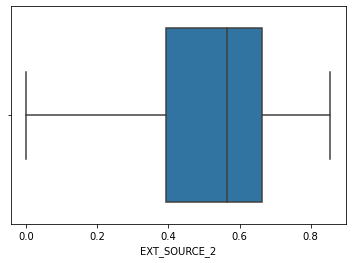

In [167]:
# boxplot of EXT_SOURCE_2

sns.boxplot(x = inp0['EXT_SOURCE_2'])
plt.show()

In [168]:
# Mean and Median of the data are close so the value can be imputed with the median 
# inputing missing values with median

inp0['EXT_SOURCE_2'].fillna(inp0.EXT_SOURCE_2.median(), inplace=True)

In [169]:
null_inp0_under1.sort_values(by = 'null_percentage', ascending = False).head(15)

column_name  null_count  null_percentage
11           NAME_TYPE_SUITE        1292             0.42
44  OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
42  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
43  DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
45  DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
40              EXT_SOURCE_2         660             0.21
10           AMT_GOODS_PRICE         278             0.09
49           FLAG_DOCUMENT_4           0             0.00
48           FLAG_DOCUMENT_3           0             0.00
47           FLAG_DOCUMENT_2           0             0.00
46    DAYS_LAST_PHONE_CHANGE           1             0.00
0                 SK_ID_CURR           0             0.00
51           FLAG_DOCUMENT_6           0             0.00
41              EXT_SOURCE_3           0             0.00
39         ORGANIZATION_TYPE           0             0.00

In [170]:
# Analysing AMT_GOOD_PRICE

# understanding the descriptiion
inp0.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

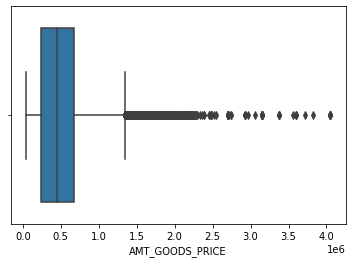

In [171]:
# plotting graph to undedrstand the outlier

sns.boxplot(x = inp0['AMT_GOODS_PRICE'])
plt.show()


In [172]:
# Finding the quantile values for the data 
inp0.AMT_GOODS_PRICE.quantile([0, 0.25, 0.5, 0.75, 1])


0.00      40500.0
0.25     238500.0
0.50     450000.0
0.75     679500.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [173]:
# Most occuring Amount loan is taken for
inp0.AMT_GOODS_PRICE.mode()[0]

450000.0

In [174]:
# Observations
# 1. The median of the data is 450000
# 2. The mode of the data is 450000
# 3. The max value of the data is 40500
# 4. The min value of the data is 4050000


In [175]:
# Since the median and mode are close we can impute the null values with the mode of the data
# inputing missing values with mode

inp0['AMT_GOODS_PRICE'].fillna(inp0.AMT_GOODS_PRICE.mode()[0], inplace=True)

In [176]:
# Dealing with incorrect Values

inp0.CODE_GENDER.value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

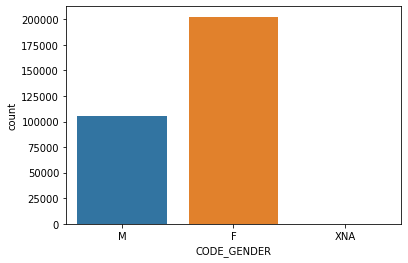

In [177]:
# plotting a bargraph for CODE_GENDER to unnderstand the distribution 

sns.countplot(x = inp0.CODE_GENDER)

In [178]:
# Observations
# 1. There are just twice the nnumber of female applicants as that of the male. 
# 2. Mode of the data is Females

# Replacing the XNA values with the mode of the data


inp0['CODE_GENDER'].replace('XNA', inp0.CODE_GENDER.mode()[0], inplace= True)

In [179]:
inp0.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [180]:
inp0[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

In [181]:
# Changing the negative values to positive for 
# ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

inp0['DAYS_BIRTH'] = inp0['DAYS_BIRTH'].abs()
inp0['DAYS_EMPLOYED'] = inp0['DAYS_EMPLOYED'].abs()
inp0['DAYS_REGISTRATION'] = inp0['DAYS_REGISTRATION'].abs()
inp0['DAYS_ID_PUBLISH'] = inp0['DAYS_ID_PUBLISH'].abs()
inp0['DAYS_LAST_PHONE_CHANGE'] = inp0['DAYS_LAST_PHONE_CHANGE'].abs()


In [182]:
# Converting Number of days to years 

inp0['DAYS_BIRTH'] = (inp0['DAYS_BIRTH']//365)
inp0['DAYS_EMPLOYED'] = (inp0['DAYS_EMPLOYED']//365)
inp0['DAYS_REGISTRATION'] = (inp0['DAYS_REGISTRATION']//365)
inp0['DAYS_ID_PUBLISH'] = (inp0['DAYS_ID_PUBLISH']//365)
inp0['DAYS_LAST_PHONE_CHANGE'] = (inp0['DAYS_LAST_PHONE_CHANGE']//365)

In [183]:
# Understanding days_employed

inp0.DAYS_EMPLOYED.describe()

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: DAYS_EMPLOYED, dtype: float64

In [184]:
# Observations
# 1. The max value of the data is 1000
# 2. The min value of the data is 0
# 3. This is practically impossible for someone to be working for 1000 years
    # a. We need to understand this as they might be someone with `pension` or someone `retired`
    # b. Min value being 0 indicated someone who is not employed or `unemployed`

In [185]:
# to check this obervation lets have a vallue count to it
# value count of the income type with employment days = 1000

inp0[inp0['DAYS_EMPLOYED'] == 1000].NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [186]:
# Analysing Name Income type

inp0.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

In [187]:
# Calculating the null value percentage for name income type

round(inp0.NAME_INCOME_TYPE.isnull().sum()/inp0.shape[0]*100,2)

0.0

In [188]:
# Understanding the name income type

inp0.NAME_INCOME_TYPE.describe()

count      307511
unique          8
top       Working
freq       158774
Name: NAME_INCOME_TYPE, dtype: object

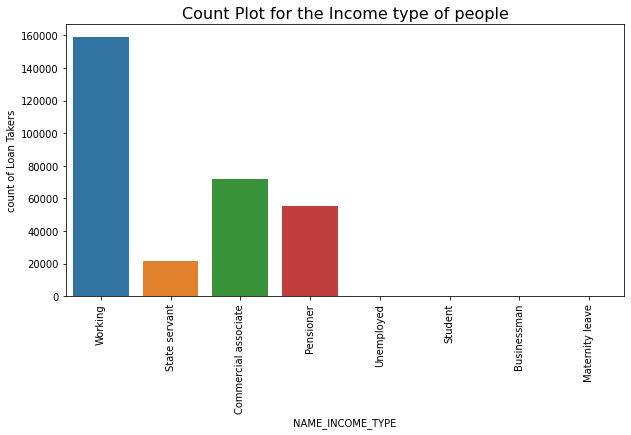

In [189]:
# Plotting a count plot for the categorical name income type

plt.figure(figsize=(10,5))
sns.countplot(x = inp0.NAME_INCOME_TYPE)
plt.title('Count Plot for the Income type of people', fontdict={'fontsize':16})
plt.xticks(rotation = 90)
plt.ylabel('count of Loan Takers')
plt.show()


In [190]:
# observaations
# 1. Most of the people who have taken the loan are working in the private sector
# 2. The least number of people who have taken the loan are working in the business sector

In [191]:
# Analysing Name EDUCATION TYPE

inp0.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

In [192]:
# Calculating the null value percentage for name education type

round(inp0.NAME_EDUCATION_TYPE.isnull().sum()/inp0.shape[0]*100,2)

0.0

In [193]:
# Understanding the name education type

inp0.NAME_EDUCATION_TYPE.describe()

count                            307511
unique                                5
top       Secondary / secondary special
freq                             218391
Name: NAME_EDUCATION_TYPE, dtype: object

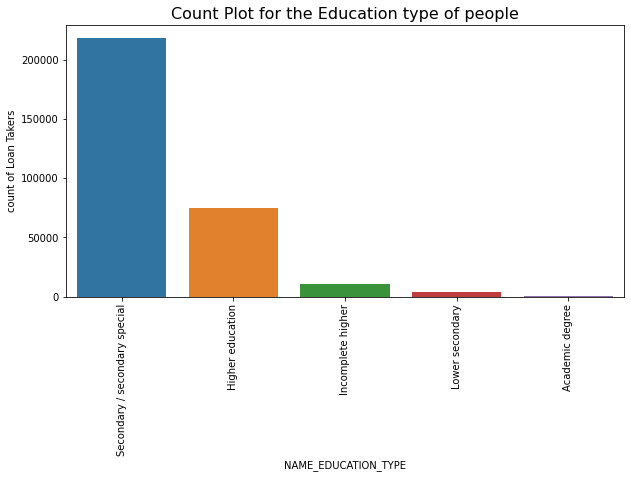

In [194]:
# Plotting a count plot for the categorical name education type

plt.figure(figsize=(10,5))
sns.countplot(x = inp0.NAME_EDUCATION_TYPE)
plt.title('Count Plot for the Education type of people', fontdict={'fontsize':16})
plt.xticks(rotation = 90)
plt.ylabel('count of Loan Takers')
plt.show()

In [195]:
#Observations
# 1. Most of the people who have taken the loan are ones who have doen their Secondary Education
# 2. The least number of people who have taken the loan are in the academic degree

In [196]:
# analyzing NAME_FAMILY_STATUS

inp0.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

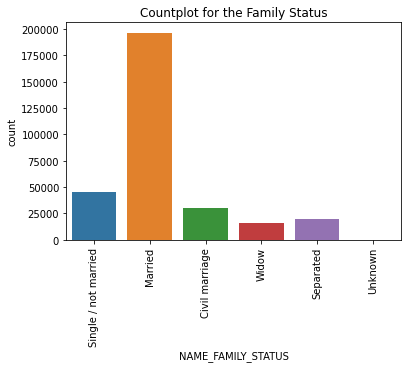

In [197]:
#plotting countplot to understand the distribution

sns.countplot(x = inp0.NAME_FAMILY_STATUS)
plt.title("Countplot for the Family Status")
plt.xticks(rotation = 90)
plt.show()

In [198]:
# observations
# 1. Most of the applicants are married
# 2. The mode of the data is Married.

# Imputing the unknown category to married

inp0['NAME_FAMILY_STATUS'].replace('Unknown', inp0.NAME_FAMILY_STATUS.mode()[0], inplace= True)

In [199]:
# Analysing NAME_HOUSING_TYPE

inp0.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

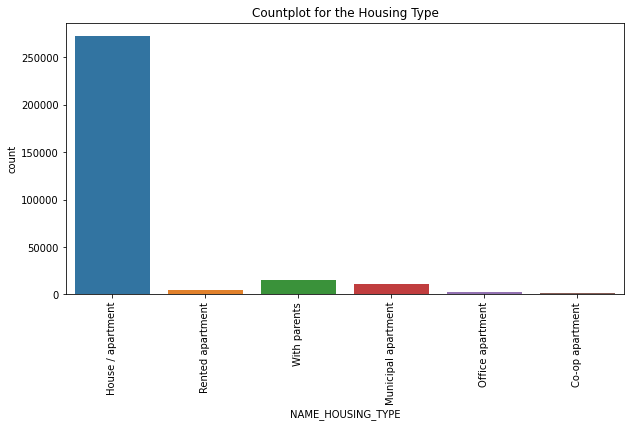

In [200]:
#plotting countplot to understand the distribution

plt.figure(figsize=(10,5))
sns.countplot(x = inp0.NAME_HOUSING_TYPE)
plt.title("Countplot for the Housing Type")
plt.xticks(rotation = 90)
plt.show()

In [201]:
inp0[['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']].nunique()


NAME_INCOME_TYPE       8
NAME_EDUCATION_TYPE    5
NAME_FAMILY_STATUS     5
NAME_HOUSING_TYPE      6
dtype: int64

In [202]:
# Analyzing the numerical data

inp0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].describe()


AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY
count      3.075110e+05  3.075110e+05  307499.000000
mean       1.687979e+05  5.990260e+05   27108.573909
std        2.371231e+05  4.024908e+05   14493.737315
min        2.565000e+04  4.500000e+04    1615.500000
25%        1.125000e+05  2.700000e+05   16524.000000
50%        1.471500e+05  5.135310e+05   24903.000000
75%        2.025000e+05  8.086500e+05   34596.000000
max        1.170000e+08  4.050000e+06  258025.500000

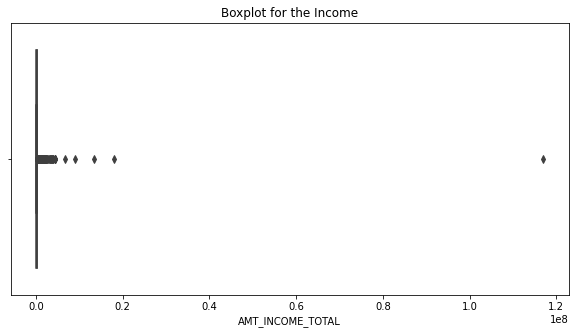

In [203]:
# plotting boxplot for eaach of them to understand them

plt.figure(figsize=(10,5))
sns.boxplot(x = inp0.AMT_INCOME_TOTAL)
plt.title("Boxplot for the Income")
plt.show()



In [204]:
# Fidning the outlliers

inp0.AMT_INCOME_TOTAL.quantile([0, 0.25,0.5,0.75,0.95, 0.999, 1])


0.000        25650.0
0.250       112500.0
0.500       147150.0
0.750       202500.0
0.950       337500.0
0.999       900000.0
1.000    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [205]:
# observations
# 1. The max value is 117000000
# 2. The min value is 25650
# 3. The 99th percentile is 900000.0
# 4. Outliers Exists after 99th Percentile

# Mean and mode of the Income

print('Mean',inp0.AMT_INCOME_TOTAL.mean())
print('Mode',inp0.AMT_INCOME_TOTAL.mode()[0])

Mean 168797.9192969845
Mode 135000.0


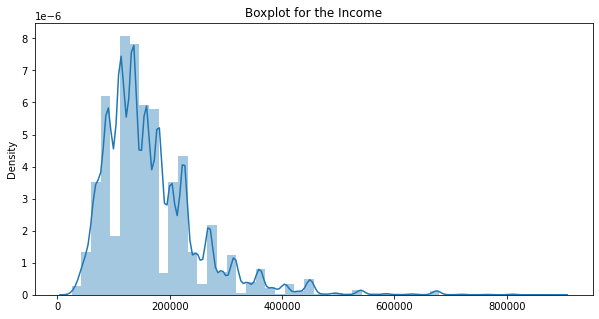

In [206]:
# Plotting the distribution plot for the income of people less than the 99th percentile

plt.figure(figsize=(10,5))
sns.distplot(x = inp0[inp0['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
plt.title("Boxplot for the Income")
plt.show()


In [207]:
# Observations
# 1. The distribution is right skewed
# 2. The mean is greater than the median
# 3. Clearly the data beyond 900k income are outliers 

In [208]:
# finding inter quartile range of the income

IQR = inp0.AMT_INCOME_TOTAL.quantile(0.75) - inp0.AMT_INCOME_TOTAL.quantile(0.25)
print(f'IQR: {IQR}')

# finding the upper and lower bound of the income

upper_bound = inp0.AMT_INCOME_TOTAL.quantile(0.75) + (1.5 * IQR)
lower_bound = inp0.AMT_INCOME_TOTAL.quantile(0.25) - (1.5 * IQR)
print(f'upper bound: {upper_bound}')
print(f'lower bound: {lower_bound}')

IQR: 90000.0
upper bound: 337500.0
lower bound: -22500.0


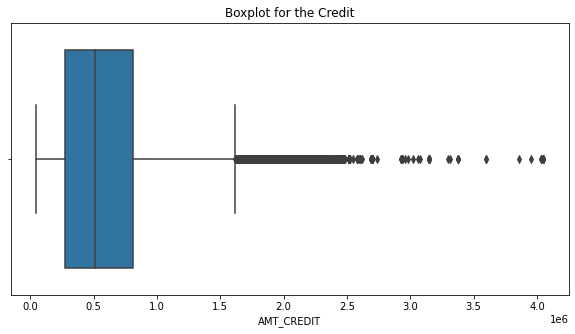

In [209]:
# Analyzing AMT_CREDIT

plt.figure(figsize=(10,5))
sns.boxplot(x = inp0.AMT_CREDIT)
plt.title("Boxplot for the Credit")
plt.show()


In [210]:
# Finding the quartile values 

inp0.AMT_CREDIT.quantile([0, 0.25,0.5,0.75,0.95, 0.99, 1])

0.00      45000.0
0.25     270000.0
0.50     513531.0
0.75     808650.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [211]:
# IQR OF AMT_CREDIT

IQR = inp0.AMT_CREDIT.quantile(0.75) - inp0.AMT_CREDIT.quantile(0.25)
print(f'IQR: {IQR}')

# finding the upper and lower bound of the income

upper_bound = inp0.AMT_CREDIT.quantile(0.75) + (1.5 * IQR)
lower_bound = inp0.AMT_CREDIT.quantile(0.25) - (1.5 * IQR)
print(f'upper bound: {upper_bound}')
print(f'lower bound: {lower_bound}')

IQR: 538650.0
upper bound: 1616625.0
lower bound: -537975.0


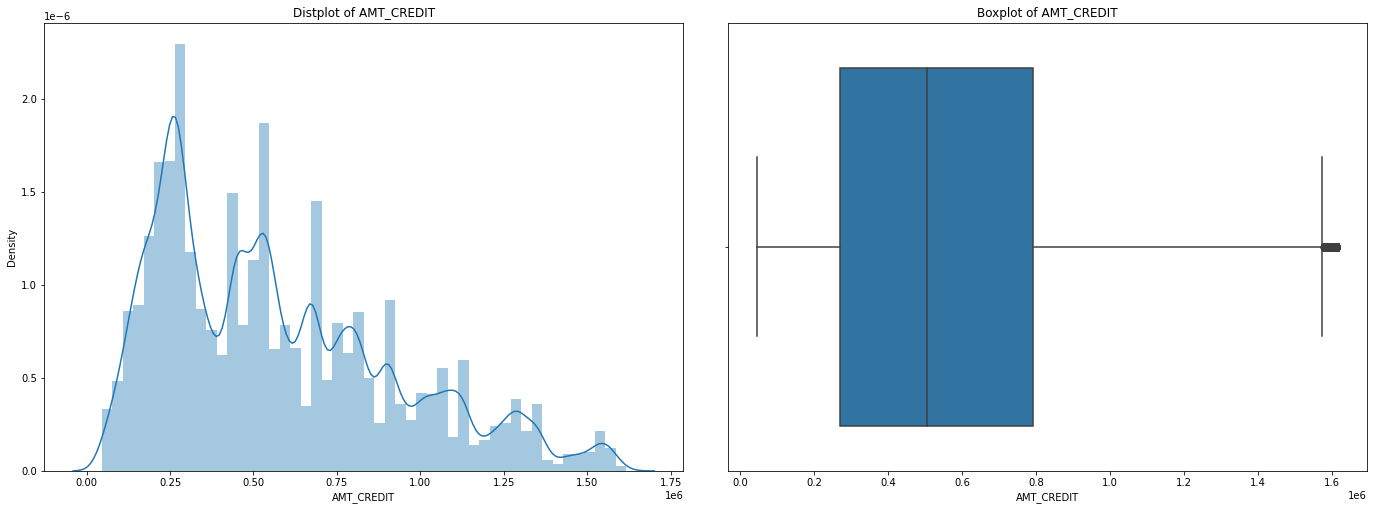

In [212]:
plt.subplots(1,2 ,figsize = (20,8))

plt.subplot(121)
sns.distplot(inp0[inp0['AMT_CREDIT'] <= 1616625.0].AMT_CREDIT)
pltname = 'Distplot of ' + 'AMT_CREDIT'
plt.title(pltname)

plt.subplot(122)
sns.boxplot(x = inp0[inp0['AMT_CREDIT'] <= 1616625.0].AMT_CREDIT)
pltname = 'Boxplot of ' + 'AMT_CREDIT'
plt.title(pltname)

plt.tight_layout(pad = 4)
plt.show()

In [213]:
# Observations
# 1. The max value is 4050000
# 2. The min value is 45000
# 3. The 99th percentile is 1616625.0
# 4. Outliers Exists after 99th Percentile

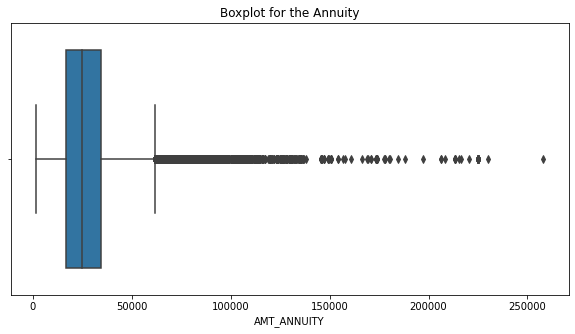

In [214]:
# Analyzing AMT_ANNUITY

plt.figure(figsize=(10,5))
sns.boxplot(x = inp0.AMT_ANNUITY)   
plt.title("Boxplot for the Annuity")
plt.show()

In [215]:
# Finding the quartile values

inp0.AMT_ANNUITY.quantile([0, 0.25,0.5,0.75,0.95, 0.99, 1])


0.00      1615.5
0.25     16524.0
0.50     24903.0
0.75     34596.0
0.95     53325.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

In [216]:
# IQR OF AMT_ANNUITY

IQR = inp0.AMT_ANNUITY.quantile(0.75) - inp0.AMT_ANNUITY.quantile(0.25)
print(f'IQR: {IQR}')

# finding the upper and lower bound of the income

upper_bound = inp0.AMT_ANNUITY.quantile(0.75) + (1.5 * IQR)
lower_bound = inp0.AMT_ANNUITY.quantile(0.25) - (1.5 * IQR)
print(f'upper bound: {upper_bound}')
print(f'lower bound: {lower_bound}')


IQR: 18072.0
upper bound: 61704.0
lower bound: -10584.0


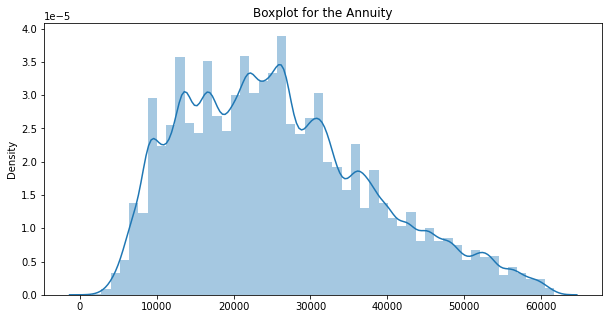

In [217]:
#distribution plot for the annuity

plt.figure(figsize=(10,5))
sns.distplot(x = inp0[inp0['AMT_ANNUITY'] < 61704.0].AMT_ANNUITY)
plt.title("Boxplot for the Annuity")
plt.show()


In [218]:
# Observations
# 1. The distribution is right skewed
# 2. Outliers Exists above 61704.0

In [219]:
# Analysis of CNT_CHILDREN column

inp0.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [220]:
(inp0['CNT_CHILDREN'].value_counts(normalize = True).sort_values(ascending = False) * 100)

0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
14     0.000976
8      0.000650
9      0.000650
12     0.000650
10     0.000650
19     0.000650
11     0.000325
Name: CNT_CHILDREN, dtype: float64

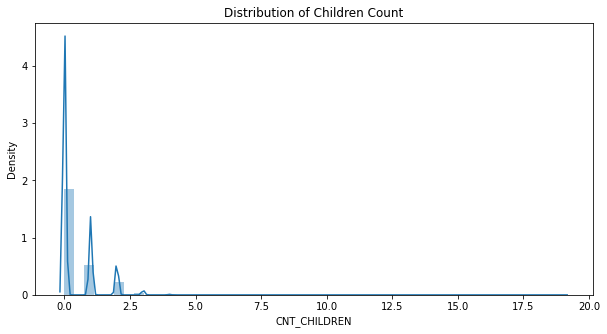

In [221]:
# lets understand the distriution of children count and loan applications

plt.figure(figsize=(10,5))
sns.distplot(inp0.CNT_CHILDREN)
plt.title("Distribution of Children Count")

plt.show()

In [222]:
# Observations
# 1. Most of the applicants have 0 children
# 2. The distribution is right skewed
# 3. The values above 2.5 can be considered as outliers as most of them are within 2.5 


In [223]:

# age of the applicant with 10 kids

inp0[inp0['CNT_CHILDREN'] == 10].DAYS_BIRTH


132585    31
186820    41
Name: DAYS_BIRTH, dtype: int64

In [224]:
# This is a bit odd data when looking at it this way
# So we can treat them as outliers

In [225]:
# Analyzing count memebers

inp0.CNT_FAM_MEMBERS.describe()


count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

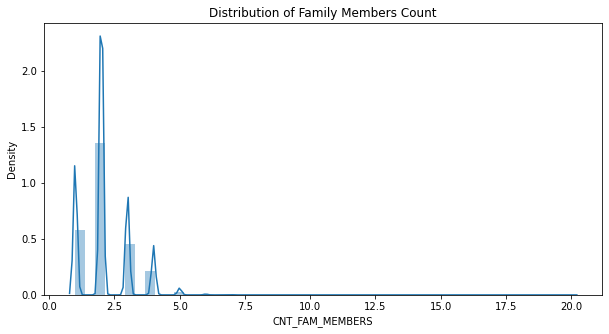

In [226]:
# lets understand the distriution of family members count and loan applications

plt.figure(figsize=(10,5))
sns.distplot(inp0.CNT_FAM_MEMBERS)
plt.title("Distribution of Family Members Count")
plt.show()

In [227]:
#Obeservations
# 1. The distribution is right skewed
# 2. The values above 4.5 can be considered as outliers as most of them are within 4.5

##### BINNING OF CONTINUOUS NUMERICAL VALUES

In [228]:
# Binning the AMT_GOODS_PRICE

inp0['AMT_GOODS_PRICE'].describe([0,0.25,0.50,0.75,0.99,.9999])

count     3.075110e+05
mean      5.383163e+05
std       3.692890e+05
min       4.050000e+04
0%        4.050000e+04
25%       2.385000e+05
50%       4.500000e+05
75%       6.795000e+05
99%       1.800000e+06
99.99%    2.933964e+06
max       4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [229]:
#Creating 5 bins very low, low, medium, high, very high for AMT_GOODS_PRICE

inp0['AMT_GOODS_PRICE_CATEGORY'] = pd.cut(inp0.AMT_GOODS_PRICE, bins = 5, labels = ['very low','low','medium','high','very high'])

In [230]:
#Checking that the values are populated as per expectation

inp0['AMT_GOODS_PRICE_CATEGORY'].value_counts()

very low     247251
low           56087
medium         4108
high             47
very high        18
Name: AMT_GOODS_PRICE_CATEGORY, dtype: int64

In [231]:
#Binning "DAYS_BIRTH"

inp0['AGE_GROUP']=pd.cut(inp0['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])


In [232]:

#Checking that the values are populated as per expectation
inp0['AGE_GROUP'].value_counts()

Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: AGE_GROUP, dtype: int64

In [233]:
#Categorising AMT INCOME TYPE based on thr quantile values

inp0['AMT_INCOME_TYPE'] = pd.qcut(inp0.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH']) 


In [234]:
#Checking the values

inp0['AMT_INCOME_TYPE'].value_counts()

MEDIUM       106633
LOW           90089
VERY_LOW      63671
HIGH          33083
VERY_HIGH     14035
Name: AMT_INCOME_TYPE, dtype: int64

In [235]:
# Checking Imbalance for target column `TARGET'

In [236]:
# Analyzing the target variable

inp0.TARGET.value_counts(normalize=True).sort_values(ascending=False)*100


0    91.927118
1     8.072882
Name: TARGET, dtype: float64

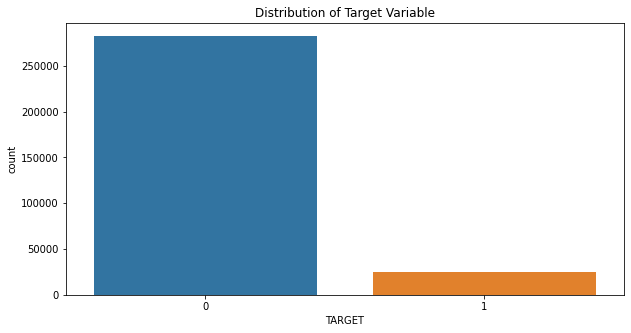

In [237]:
# Making a count plot to check the imbalance ratio of target variable

plt.figure(figsize=(10,5))
sns.countplot(x = inp0.TARGET)
plt.title("Distribution of Target Variable")
plt.show()

In [238]:
# Observations
# 1. The target variable is highly imbalanced
# 2. The ratio of 0 to 1 is 92:8
# 3. 0: is the people not facing any difficulty
# 4. 1: People facing difficulty paying their Annuities


In [239]:
# Splitting the target variable to 2 new dataframes individually with both the target variables separately

inp0_0 = inp0[inp0['TARGET'] == 0]
inp0_1 = inp0[inp0['TARGET'] == 1]

#### Univariate analysis of the Catecogrical Values


- Analyzing the Name_CONTRACT_TYPE


In [240]:

inp0_0.NAME_CONTRACT_TYPE.value_counts(normalize=True).sort_values(ascending=False)*100

Cash loans         90.209986
Revolving loans     9.790014
Name: NAME_CONTRACT_TYPE, dtype: float64

In [241]:
inp0_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).sort_values(ascending=False)*100

Cash loans         93.538771
Revolving loans     6.461229
Name: NAME_CONTRACT_TYPE, dtype: float64

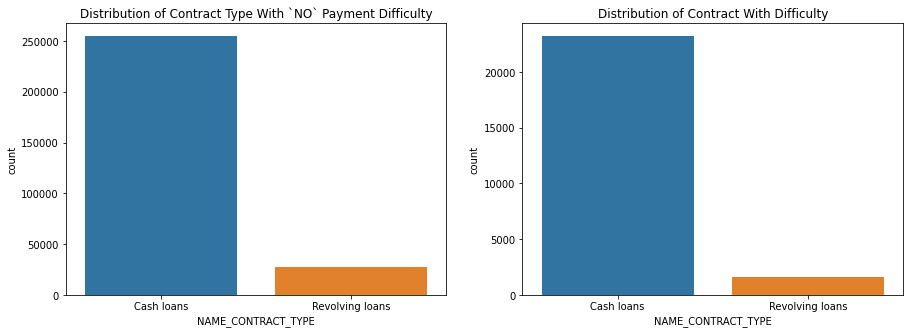

In [242]:
# Creating 2 sub countplots for NAME_CONTRACT_TYPE for both the target variables

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = inp0_0.NAME_CONTRACT_TYPE)
plt.title("Distribution of Contract Type With `NO` Payment Difficulty")

plt.subplot(1,2,2)
sns.countplot(x = inp0_1.NAME_CONTRACT_TYPE)
plt.title("Distribution of Contract With Difficulty")
plt.show()

In [243]:
# Observations

# 1. The contract type is highly imbalanced
# 2. The ratio of Cash loans to Revolving loans is 90:10

# We cannot see any particular differences in the contract type of either people with payment difficulty or No Difficulty

# Conclusion
# 1. Contract Type does not give any information about the payment difficulties

- Analyzing CODE_GENDER

In [244]:
# code_gender value counts based on the target 

inp0_0.CODE_GENDER.value_counts(normalize=True).sort_values(ascending=False)*100

F    66.604643
M    33.395357
Name: CODE_GENDER, dtype: float64

In [245]:
inp0_1.CODE_GENDER.value_counts(normalize=True).sort_values(ascending=False)*100
sorted(inp0['CODE_GENDER'].unique(), reverse = False)

['F', 'M']

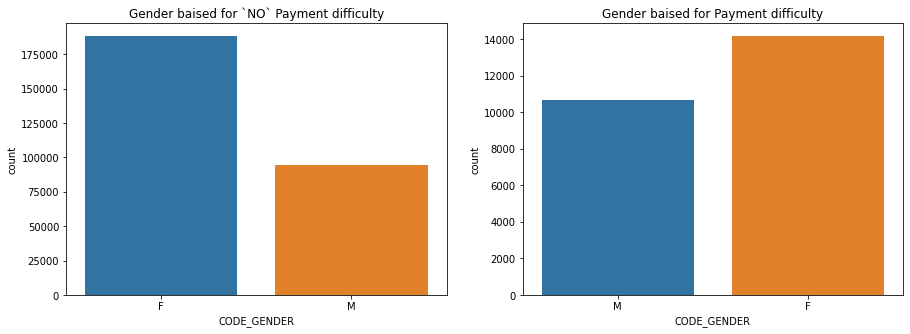

In [246]:
# plotting a sub countplot to visualize both the target variables

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = inp0_0.CODE_GENDER)
plt.title("Gender baised for `NO` Payment difficulty")

plt.subplot(1,2,2)
palt = sns.color_palette("bright")
sns.countplot(x = inp0_1.CODE_GENDER)
plt.title("Gender baised for Payment difficulty")
plt.show()

In [247]:
#Observations

# Percentage increase in the default percentage of a man

(inp0_1[inp0_1.CODE_GENDER == 'M'].value_counts() - inp0_0[inp0_0.CODE_GENDER == 'M'].value_counts())/ (inp0_1[inp0_1.CODE_GENDER == 'M'].value_counts())

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE      NAME_EDUCATION_TYPE            NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE       EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLA

Observations

Looking at CountPlot and PieChart, there is a 9.5% decrease in "Male" values from CODE_GENDER b/w clients with payment difficulties to on-time payments. It's a weak correlation that Males have more payment difficulties.

In [248]:
# Analysis of FLAG_OWN_CAR

inp0_0.FLAG_OWN_CAR.value_counts(normalize=True).sort_values(ascending=False)*100


N    65.682418
Y    34.317582
Name: FLAG_OWN_CAR, dtype: float64

In [249]:

inp0_1.FLAG_OWN_CAR.value_counts(normalize=True).sort_values(ascending=False)*100

N    69.482377
Y    30.517623
Name: FLAG_OWN_CAR, dtype: float64

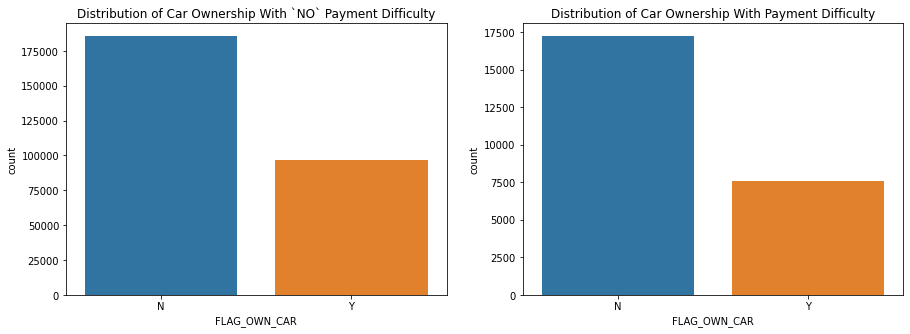

In [250]:
# Creating a sub countplot to visualize both the target variables

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = inp0_0.FLAG_OWN_CAR)
plt.title("Distribution of Car Ownership With `NO` Payment Difficulty")

plt.subplot(1,2,2)
sns.countplot(x = inp0_1.FLAG_OWN_CAR)
plt.title("Distribution of Car Ownership With Payment Difficulty")
plt.show()

Conclusion

Flag Own car does not provide any conclusion with respect to the payment defaulters


Analyzing NAME_INCOME_TYPE

In [251]:
#Analyzing the NAME_INCOME_TYPE

inp0_0.NAME_INCOME_TYPE.value_counts(normalize=True).sort_values(ascending=False)*100


Working                 50.780725
Commercial associate    23.438373
Pensioner               18.529393
State servant            7.235590
Student                  0.006367
Unemployed               0.004952
Businessman              0.003537
Maternity leave          0.001061
Name: NAME_INCOME_TYPE, dtype: float64

In [252]:
inp0_1.NAME_INCOME_TYPE.value_counts(normalize=True).sort_values(ascending=False)*100

Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64

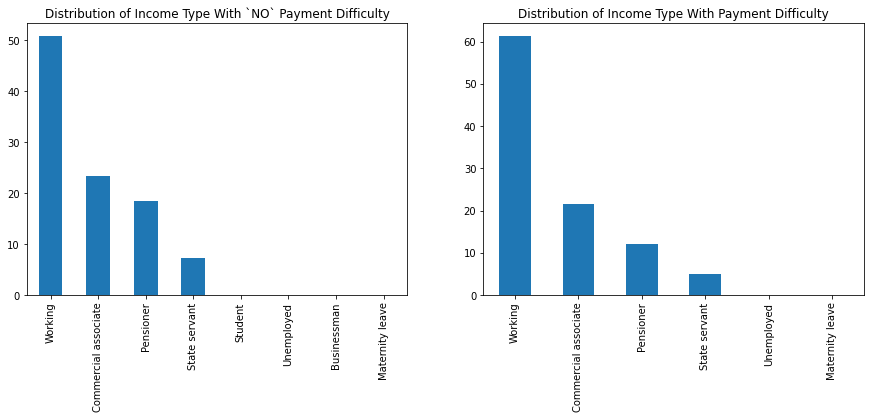

In [253]:
# Creating a sub countplot to visualize both the target variables

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
(inp0_0.NAME_INCOME_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.title("Distribution of Income Type With `NO` Payment Difficulty")
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
(inp0_1.NAME_INCOME_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.title("Distribution of Income Type With Payment Difficulty")
plt.xticks(rotation = 90)
plt.show()

In [254]:
# observation

# 1. Students and Business man dont have any problems wrt to the payments
# 2. Pensioners have better on time payments

# Conclusion
# 1. Pensioners have better on time payment, this gives a weak correlation of the dta 
# 2. Students and Businessman has no problem for payments, thus can be treated as weak corelation as we have fewer records of both of them.

Analyzing the NAME_EDUCATION_TYPE

In [255]:
inp0_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).sort_values(ascending=False)*100

Secondary / secondary special    70.349080
Higher education                 25.064559
Incomplete higher                 3.327013
Lower secondary                   1.202394
Academic degree                   0.056954
Name: NAME_EDUCATION_TYPE, dtype: float64

In [256]:
inp0_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).sort_values(ascending=False)*100

Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: NAME_EDUCATION_TYPE, dtype: float64

In [257]:
# Creating a sub countplot to visualize both the target variables 

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
(inp0_0.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.title("Distribution of Education Type With `NO` Payment Difficulty")
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
(inp0_1.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.title("Distribution of Education Type With Payment Difficulty")
plt.xticks(rotation = 90)
plt.show()

In [258]:
# observations
# 1. We see a weak corelation with the higher education people having less payment difficulties

Analyzing NAME_FAMILY_STATUS 

In [259]:
round(inp0_0.NAME_FAMILY_STATUS.value_counts(normalize=True).sort_values(ascending=False)*100,2)

Married                 64.24
Single / not married    14.50
Civil marriage           9.49
Separated                6.42
Widow                    5.36
Name: NAME_FAMILY_STATUS, dtype: float64

In [260]:

round(inp0_1.NAME_FAMILY_STATUS.value_counts(normalize=True).sort_values(ascending=False)*100,2)

Married                 59.82
Single / not married    17.95
Civil marriage          11.93
Separated                6.53
Widow                    3.77
Name: NAME_FAMILY_STATUS, dtype: float64

In [261]:

# Creating a sub countplot to visualize both the target variables

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
(inp0_0.NAME_FAMILY_STATUS.value_counts(normalize=True)*100).plot.bar()
plt.title("Distribution of Family Status With `NO` Payment Difficulty")
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
(inp0_1.NAME_FAMILY_STATUS.value_counts(normalize=True)*100).plot.bar()
plt.title("Distribution of Family Status With Payment Difficulty")
plt.xticks(rotation = 90)
plt.show()

In [262]:
# Observations
# 1. We see a weak corelation with the Married people having less payment difficulties, with 64.24% compared to 59.82%
# 2. We also see a weak corelation with the widows 5.36% to 3.77% of them not having payment difficulties
# 3. about 18% of single/not married have payment difficulties compared to 13% of the ones who dont have

# Conclusion
# 1. Married people have less payment difficulties, weak corelation.
# 2. Widows have less payment difficulties, weak corelation.
# 3. Single people have more payment difficulties, weak corelation.

Numerical Analysis

- Corelation matrix for payment difficulties

In [263]:
# corelation matrix of payment difficulties of numerical data

corr_1 = inp0_1.select_dtypes(include=['int', 'float']).corr()
corr_1


SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000     NaN     -0.005144   
TARGET                             NaN     NaN           NaN   
CNT_CHILDREN                 -0.005144     NaN      1.000000   
AMT_INCOME_TOTAL             -0.010165     NaN      0.004796   
AMT_CREDIT                   -0.001290     NaN     -0.001675   
...                                ...     ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.007954     NaN     -0.013004   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.002999     NaN     -0.011792   
AMT_REQ_CREDIT_BUREAU_MON     0.006436     NaN     -0.012583   
AMT_REQ_CREDIT_BUREAU_QRT    -0.000880     NaN     -0.018174   
AMT_REQ_CREDIT_BUREAU_YEAR    0.008916     NaN     -0.035427   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.010165   -0.001290    -0.007578   
TARGET                                   NaN         NaN          NaN   
CNT_CHILDREN                        0.004796   -0.001675     0.031257   
AMT_INCOME_TOTAL                    1.000000    0.038131     0.046421   
AMT_CREDIT                          0.038131    1.000000     0.752195   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY          -0.000272    0.003008    -0.000294   
AMT_REQ_CREDIT_BUREAU_WEEK          0.000018    0.007650     0.031242   
AMT_REQ_CREDIT_BUREAU_MON           0.004114    0.055038     0.053413   
AMT_REQ_CREDIT_BUREAU_QRT          -0.001133   -0.017467    -0.010205   
AMT_REQ_CREDIT_BUREAU_YEAR          0.001752   -0.035719    -0.013841   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                        -0.001814                    0.006301   
TARGET                                  NaN                         NaN   
CNT_CHILDREN                      -0.008111                   -0.031975   
AMT_INCOME_TOTAL                   0.037591                    0.009135   
AMT_CREDIT                         0.982783                    0.069161   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.004288                   -0.005483   
AMT_REQ_CREDIT_BUREAU_WEEK         0.007998                    0.002904   
AMT_REQ_CREDIT_BUREAU_MON          0.058566                    0.071329   
AMT_REQ_CREDIT_BUREAU_QRT         -0.016020                   -0.007299   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.037819                    0.000602   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                    0.001160      -0.005166  ...         -0.009181   
TARGET                             NaN            NaN  ...               NaN   
CNT_CHILDREN                 -0.259222      -0.192866  ...          0.004333   
AMT_INCOME_TOTAL             -0.003154      -0.014979  ...         -0.002177   
AMT_CREDIT                    0.135070       0.001936  ...          0.011174   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.007151       0.021517  ...          0.005703   
AMT_REQ_CREDIT_BUREAU_WEEK    0.005748       0.014955  ...         -0.007416   
AMT_REQ_CREDIT_BUREAU_MON     0.005685      -0.025091  ...          0.012550   
AMT_REQ_CREDIT_BUREAU_QRT     0.017304       0.014423  ...         -0.004834   
AMT_REQ_CREDIT_BUREAU_YEAR    0.084245       0.035796  ...         -0.050958   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                         -0.006382          0.003781   
TARGET                                   NaN               NaN   
CNT_CHILDREN                       -0.001370         -0.002395   
AMT_INCOME_TOTAL                   -0.000371         -0.000450   
AMT_CREDIT                          0.013442          0.016949   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY          -0.001744         -0.00

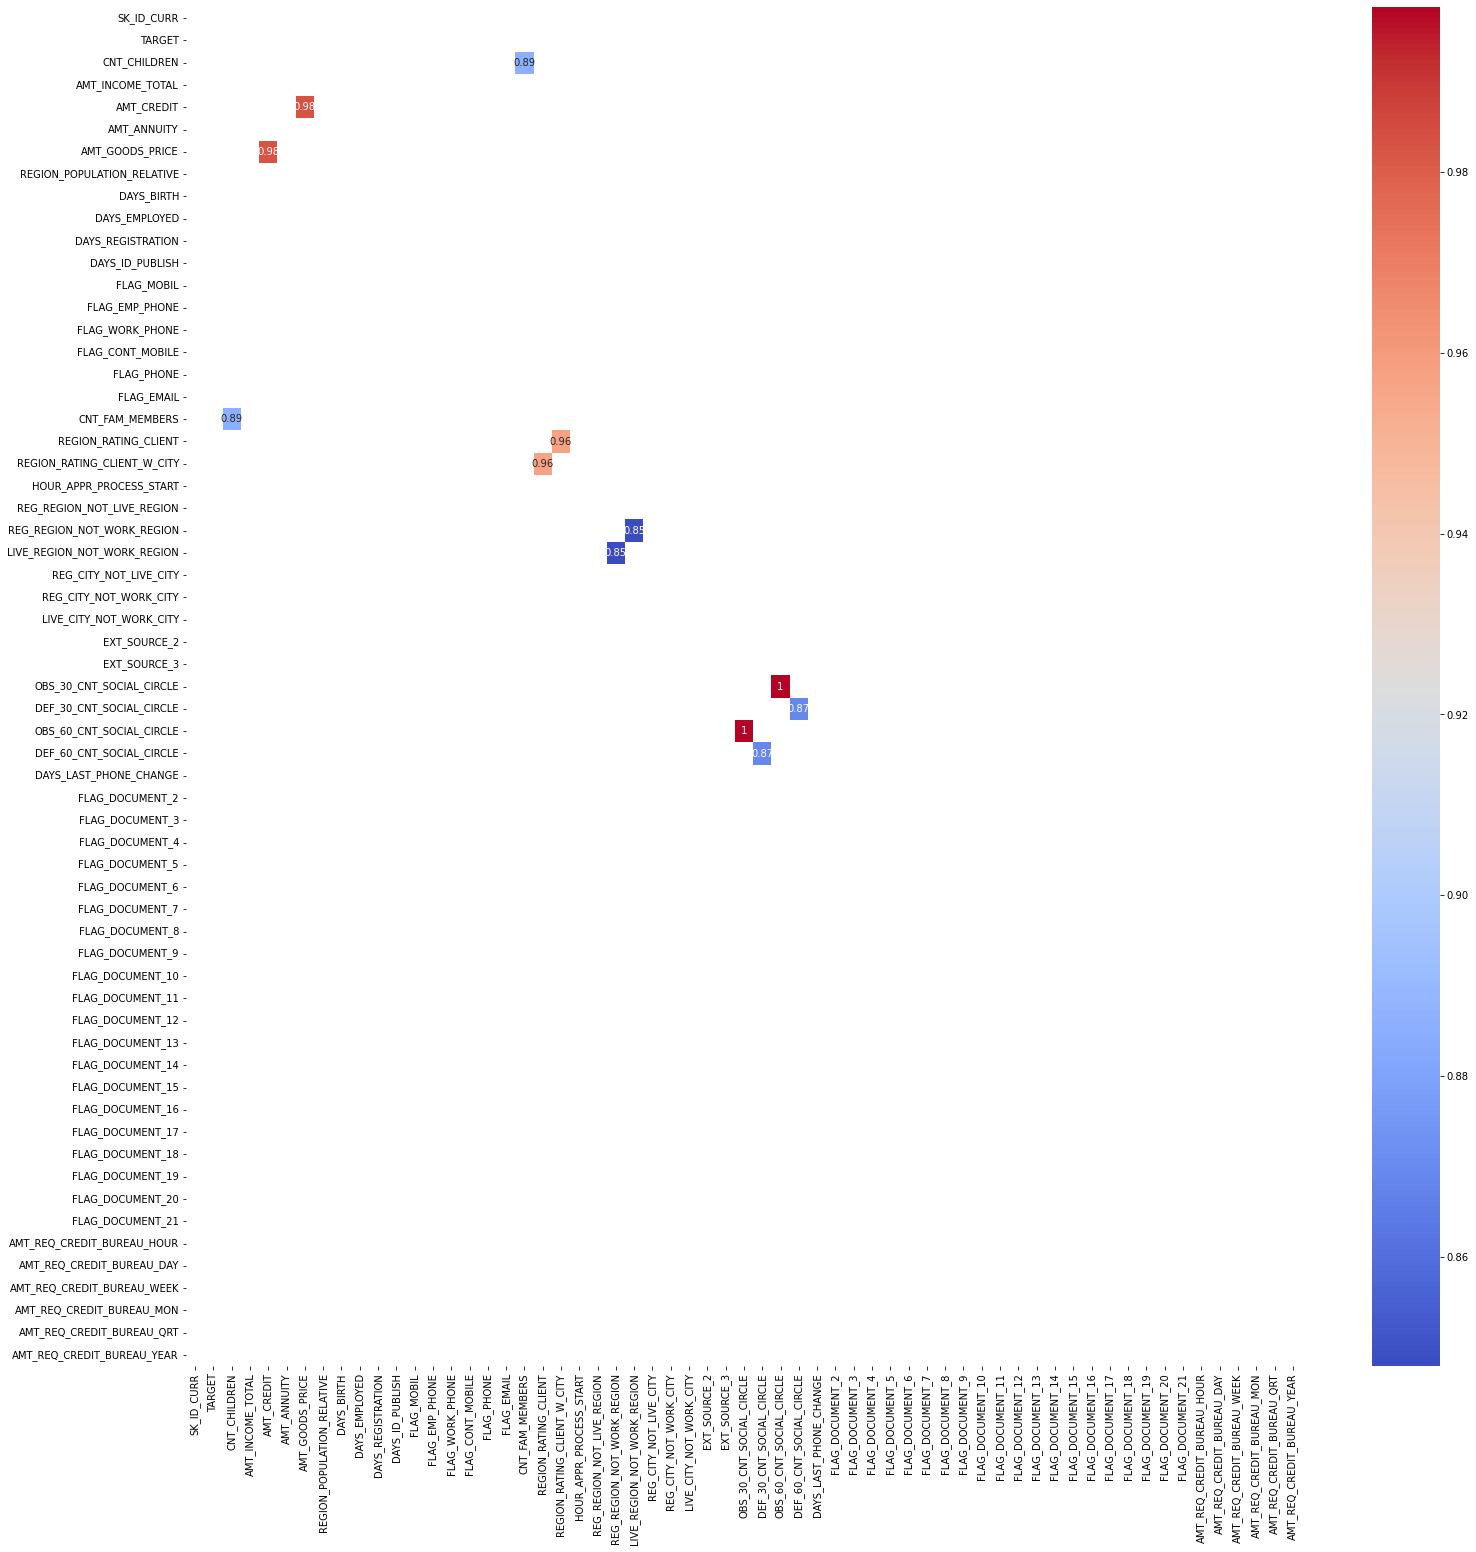

In [264]:
# creaating a corelation matrix between 80-99.99%

corr_1 = inp0_1.select_dtypes(include=['int', 'float']).corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr_1[(corr_1 >= 0.8) & (corr_1 <= 0.9999)], annot=True, cmap='coolwarm')
plt.show()

In [265]:
# Getting top 10 correlations for Payment Difficulties
# thus taking a head of 25 attributes

corr_1 = inp0_1.select_dtypes(include=['int', 'float']).corr()
corr_1 = corr_1.sort_values(by='TARGET', ascending=False)
corr_1[corr_1 <= 0.99].unstack().sort_values(ascending=False).head(22)



AMT_CREDIT                   AMT_GOODS_PRICE                0.982783
AMT_GOODS_PRICE              AMT_CREDIT                     0.982783
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.869016
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.869016
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847885
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.778540
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778540
AMT_ANNUITY                  AMT_GOODS_PRICE                0.752295
AMT_GOODS_PRICE              AMT_ANNUITY                    0.752295
AMT_ANNUITY                  AMT_C

In [266]:
# As we have duplicate combinations, looking at the above and removing dups, we get top 10 correlations as:

# AMT_GOODS_PRICE                                   AMT_CREDIT                              0.98
# REGION_RATING_CLIENT                              REGION_RATING_CLIENT_W_CITY             0.96
# CNT_FAM_MEMBERS                                   CNT_CHILDREN                            0.89
# DEF_60_CNT_SOCIAL_CIRCLE                          DEF_30_CNT_SOCIAL_CIRCLE                0.87
# REG_REGION_NOT_WORK_REGION                        LIVE_REGION_NOT_WORK_REGION             0.85
# LIVE_CITY_NOT_WORK_CITY                           REG_CITY_NOT_WORK_CITY                  0.78
# AMT_ANNUITY                                       AMT_GOODS_PRICE                         0.75
# AMT_ANNUITY                                       AMT_CREDIT                              0.75
# DAYS_EMPLOYED                                     FLAG_DOCUMENT_6                         0.62
# DAYS_BIRTH                                        DAYS_EMPLOYED                           0.58

In [267]:
# Correlation matrix for On time payments

corr_0 = inp0_0.select_dtypes(include=['int', 'float']).corr()
corr_0

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000     NaN     -0.000716   
TARGET                             NaN     NaN           NaN   
CNT_CHILDREN                 -0.000716     NaN      1.000000   
AMT_INCOME_TOTAL              0.001739     NaN      0.027397   
AMT_CREDIT                   -0.000342     NaN      0.003081   
...                                ...     ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.001725     NaN      0.000648   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002524     NaN     -0.001632   
AMT_REQ_CREDIT_BUREAU_MON     0.000054     NaN     -0.010455   
AMT_REQ_CREDIT_BUREAU_QRT     0.001148     NaN     -0.007087   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004349     NaN     -0.042547   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          0.001739   -0.000342     0.000068   
TARGET                                   NaN         NaN          NaN   
CNT_CHILDREN                        0.027397    0.003081     0.020905   
AMT_INCOME_TOTAL                    1.000000    0.342799     0.418953   
AMT_CREDIT                          0.342799    1.000000     0.771309   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.007862    0.004409     0.002392   
AMT_REQ_CREDIT_BUREAU_WEEK          0.006234   -0.001883     0.012681   
AMT_REQ_CREDIT_BUREAU_MON           0.061470    0.054071     0.038181   
AMT_REQ_CREDIT_BUREAU_QRT           0.013128    0.017767     0.011248   
AMT_REQ_CREDIT_BUREAU_YEAR          0.029536   -0.048866    -0.010882   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                        -0.000235                    0.000360   
TARGET                                  NaN                         NaN   
CNT_CHILDREN                      -0.000559                   -0.024363   
AMT_INCOME_TOTAL                   0.349426                    0.167851   
AMT_CREDIT                         0.987022                    0.100604   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.004835                    0.001969   
AMT_REQ_CREDIT_BUREAU_WEEK        -0.001578                   -0.002480   
AMT_REQ_CREDIT_BUREAU_MON          0.055880                    0.078629   
AMT_REQ_CREDIT_BUREAU_QRT          0.018177                   -0.001013   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.051206                    0.001775   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                    0.001318       0.001742  ...          0.001194   
TARGET                             NaN            NaN  ...               NaN   
CNT_CHILDREN                 -0.336907      -0.245173  ...          0.004181   
AMT_INCOME_TOTAL             -0.062494      -0.140394  ...          0.008214   
AMT_CREDIT                    0.047366      -0.070105  ...          0.035527   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.002766      -0.000873  ...          0.013823   
AMT_REQ_CREDIT_BUREAU_WEEK    0.001171       0.002225  ...         -0.004443   
AMT_REQ_CREDIT_BUREAU_MON    -0.002729      -0.034887  ...         -0.002460   
AMT_REQ_CREDIT_BUREAU_QRT     0.011297       0.015113  ...         -0.005158   
AMT_REQ_CREDIT_BUREAU_YEAR    0.072847       0.052163  ...         -0.047097   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                          0.000676          0.000832   
TARGET                                   NaN               NaN   
CNT_CHILDREN                        0.001078          0.001302   
AMT_INCOME_TOTAL                    0.005762          0.000840   
AMT_CREDIT                          0.021560          0.032151   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.001341          0.00

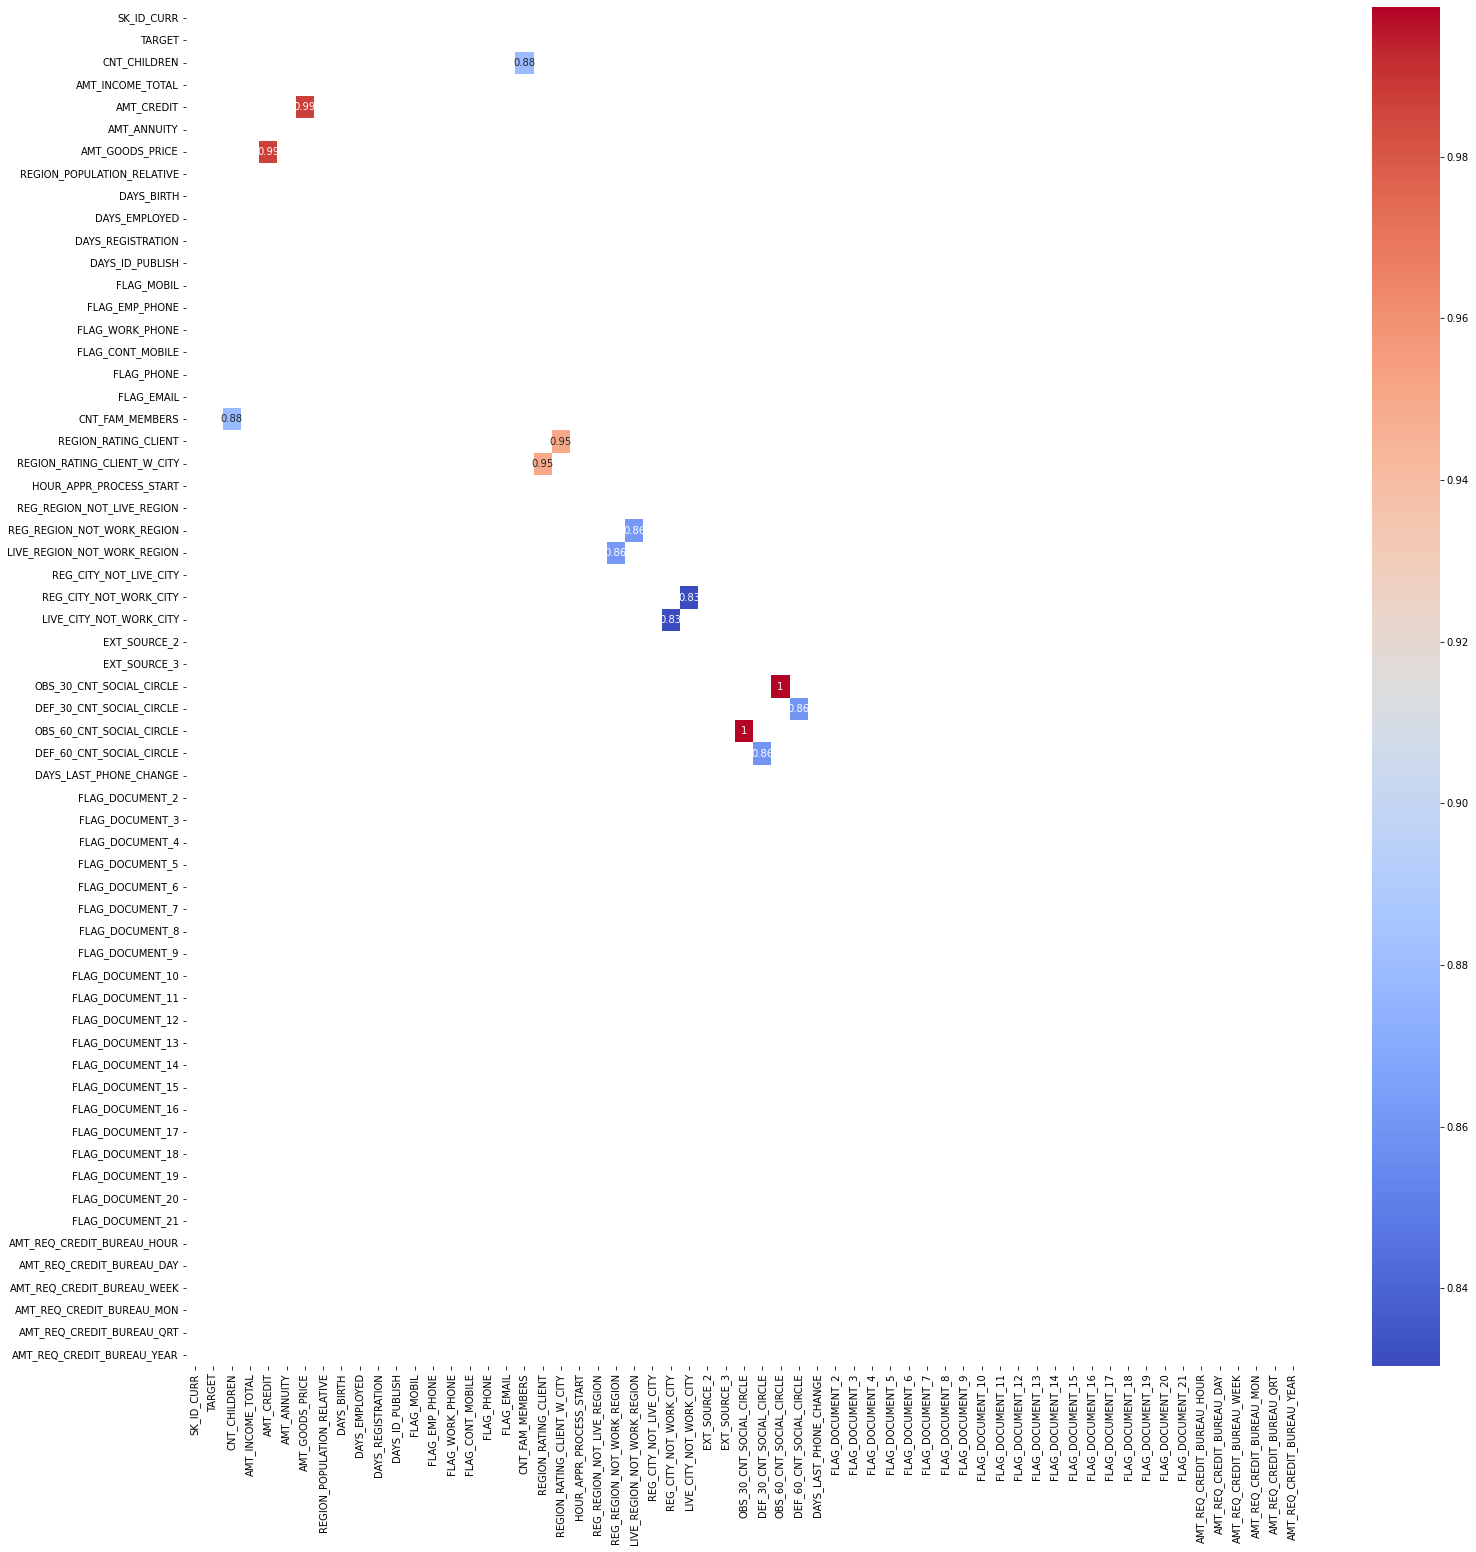

In [268]:

# creaating a corelation matrix between 80-99.99%

corr_0 = inp0_0.select_dtypes(include=['int', 'float']).corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr_0[(corr_0 >= 0.8) & (corr_0 <= 0.9999)], annot=True, cmap='coolwarm')
plt.show()

In [269]:
# Getting top 10 correlations for On time payments

corr_0 = inp0_0.select_dtypes(include=['int', 'float']).corr()
corr_0 = corr_0.sort_values(by='TARGET', ascending=False)
corr_0[corr_0 <= 0.99].unstack().sort_values(ascending=False).head(25)


AMT_GOODS_PRICE              AMT_CREDIT                     0.987022
AMT_CREDIT                   AMT_GOODS_PRICE                0.987022
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861861
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.859371
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.859371
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.830381
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830381
AMT_ANNUITY                  AMT_GOODS_PRICE                0.776433
AMT_GOODS_PRICE              AMT_ANNUITY                    0.776433
AMT_ANNUITY                  AMT_C

In [270]:
# Observations

# AMT_GOODS_PRICE              AMT_CREDIT                     0.987
# REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.95
# CNT_CHILDREN                 CNT_FAM_MEMBERS                0.87
# REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.86
# DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.85
# DEG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.83
# AMT_ANNUITY                  AMT_GOODS_PRICE                0.77
# AMT_ANNUITY                  AMT_CREDIT                     0.77
# DAYS_BIRTH                   DAYS_EMPLOYED                  0.62
# DAYS_EMPLOYED                FLAG_DOCUMENT_6                0.59

In [517]:
# heat map of payment difficult variables  with high correlation

corr_1 = inp0_0[['AMT_GOODS_PRICE','AMT_CREDIT','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','CNT_CHILDREN','CNT_FAM_MEMBERS',
                'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_CREDIT',
                'DAYS_BIRTH','DAYS_EMPLOYED']].corr()
sns.heatmap(corr_1[(corr_1 >= 0.8) & (corr_1 <= 0.9999)], annot=True, cmap='coolwarm')
plt.show()

In [271]:
# Comparing top 10 correlations b/w Payment difficulties and On-Time Payments

#Observations
# Minor differences int the correlation percentages

# 1. Highest correlation is between GOOD_PRICE AND AMT_CREDIT
# 2. 0.987 is for on time payment correlation
# 3. 0.982 is for payment difficulties correlation

Univariate Analysis of AMT_CREDIT

In [272]:
# Calculating IQR (Inter Quartile range)

Q1 = inp0_1['AMT_CREDIT'].quantile(0.25)
Q3 = inp0_1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Min value before which outlier exist: {}".format(Min_value1))
print("Max value after which outlier exist: {}".format(Max_value1))


448915.5
Min value before which outlier exist: -388973.25
Max value after which outlier exist: 1406688.75


In [273]:

# Outlier identification of AMT_CREDIT with On-Time Payments
# Calculating IQR (Inter Quartile range)

Q1 = inp0_0['AMT_CREDIT'].quantile(0.25)
Q3 = inp0_0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Min value before which outlier exist: {}".format(Min_value0))
print("Max value after which outlier exist: {}".format(Max_value0))

540000.0
Min value before which outlier exist: -540000.0
Max value after which outlier exist: 1620000.0


In [274]:
# Univariate Analysis of AMT_CREDIT

# Creating a sub Distribution to visualize both the target variables
# (removing the outliers)

plt.figure(figsize = [15,8])
sns.distplot(inp0_1[inp0_1['AMT_CREDIT'] <= Max_value1].AMT_CREDIT,label = 'Payment difficulties', hist=False)
sns.distplot(inp0_0[inp0_0['AMT_CREDIT'] <= Max_value0].AMT_CREDIT,label = 'On-Time Payments', hist=False)
plt.title("Distribution of AMT_CREDIT")
plt.xticks(rotation = 45)
plt.legend()
plt.show()


In [275]:
# Observation   
# 1. The distribution of AMT_CREDIT is similar for both the target variables
# 2. The distribution is right skewed

# For AMT_CREDIT between 250000 and approximately 650000, there are more clients with Payment difficulties
# For AMT_CREDIT > 750000 , there are more clients with On-Time Payments

Analysis of Birth Year

In [276]:
# Univariate analysis of birth Year

# finding the inter quartile range for the payment difficulty

Q1 = inp0_1['DAYS_BIRTH'].quantile(0.25)
Q3 = inp0_1['DAYS_BIRTH'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value1}")
print(f"Max value after which outlier exist: {Max_value1}")

18.0
Min value before which outlier exist: 4.0
Max value after which outlier exist: 76.0


In [277]:
# Finding IQR for NO PAYMENT DIFFICULTY in birth year

Q1 = inp0_0['DAYS_BIRTH'].quantile(0.25)
Q3 = inp0_0['DAYS_BIRTH'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value0}")
print(f"Max value after which outlier exist: {Max_value0}")

20.0
Min value before which outlier exist: 4.0
Max value after which outlier exist: 84.0


In [278]:
# Removing outliers and ploting the dist plt for the birth year

plt.figure(figsize = [15,8])
sns.distplot(inp0_1[inp0_1['DAYS_BIRTH'] <= Max_value1].DAYS_BIRTH,label = 'Payment difficulties', hist=False)
sns.distplot(inp0_0[inp0_0['DAYS_BIRTH'] <= Max_value0].DAYS_BIRTH,label = 'On-Time Payments', hist=False)
plt.title("Distribution of DAYS_BIRTH")
plt.xticks(rotation = 45)
plt.legend()
plt.show()


In [279]:
# Observations
# 1. People between the age of 19-40 face payment difficulties
# 2. People between the age of >40 have more clients with on time payments

Analysing AMT_GOODS_PRICE

In [280]:
# analyzing GOODS PRICE

# finding the inter quartile range for the payment difficulty

Q1 = inp0_1['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = inp0_1['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value1}")
print(f"Max value after which outlier exist: {Max_value1}")

436500.0
Min value before which outlier exist: -416250.0
Max value after which outlier exist: 1329750.0


In [281]:
# Finding IQR for NO PAYMENT DIFFICULTY in birth year

Q1 = inp0_0['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = inp0_0['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value0}")
print(f"Max value after which outlier exist: {Max_value0}")

446502.375
Min value before which outlier exist: -431253.5625
Max value after which outlier exist: 1354755.9375


In [282]:
# removing outlliers and plotting distplot for the AMT_GOODS_PRICE 

plt.figure(figsize = [15,8])
sns.distplot(inp0_1[inp0_1['AMT_GOODS_PRICE'] <= Max_value1].AMT_GOODS_PRICE,label = 'Payment difficulties', hist=False)
sns.distplot(inp0_0[inp0_0['AMT_GOODS_PRICE'] <= Max_value0].AMT_GOODS_PRICE,label = 'On-Time Payments', hist=False)
plt.title("Distribution of AMT_GOODS_PRICE")
plt.xticks(rotation = 45)
plt.legend()    
plt.show()

In [283]:
# Observations
# For AMT_GOODS_PRICE between ~250000 and ~550000, there are more clients with Payment difficulties
# For AMT_GOODS_PRICE > 650000 , there are more clients with On-Time Payments

Analysis of Day_EMPLOYEED

In [284]:

# Univariate analysis of DAYS_EMPLOYEED

# finding the inter quartile range for the DAYS_EMPLOYEED Payment Diificulty

Q1 = inp0_1['DAYS_EMPLOYED'].quantile(0.25)
Q3 = inp0_1['DAYS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value1}")
print(f"Max value after which outlier exist: {Max_value1}")


7.0
Min value before which outlier exist: -9.5
Max value after which outlier exist: 18.5


In [285]:
# IQR AND outliers for EMPLOYMENT DAYS with no payment difficulty

Q1 = inp0_0['DAYS_EMPLOYED'].quantile(0.25)
Q3 = inp0_0['DAYS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value0}")
print(f"Max value after which outlier exist: {Max_value0}")

14.0
Min value before which outlier exist: -19.0
Max value after which outlier exist: 37.0


In [286]:
# plotting the Employement verses the target distplot to analyse

plt.figure(figsize = [15,8])
sns.distplot(inp0_1[inp0_1['DAYS_EMPLOYED'] <= Max_value1].DAYS_EMPLOYED,label = 'Payment difficulties', hist=False)
sns.distplot(inp0_0[inp0_0['DAYS_EMPLOYED'] <= Max_value0].DAYS_EMPLOYED,label = 'On-Time Payments', hist=False)
plt.title("Distribution of DAYS_EMPLOYED")
plt.xticks(rotation = 45)
plt.legend()
plt.show()


In [287]:
# Observation

# The ones who are employeed for more than 5 years dont face a payemnt difficulty

Analysis CNT_CHILDREN

In [288]:
# IQR OF chlddren count WITH DIFFICULTY

Q1 = inp0_1['CNT_CHILDREN'].quantile(0.25)
Q3 = inp0_1['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value1}")
print(f"Max value after which outlier exist: {Max_value1}")

1.0
Min value before which outlier exist: -1.5
Max value after which outlier exist: 2.5


In [289]:
# IQR WITH NO PAYMENT DIFFICULTY

Q1 = inp0_0['CNT_CHILDREN'].quantile(0.25)
Q3 = inp0_0['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value0}")
print(f"Max value after which outlier exist: {Max_value0}")


1.0
Min value before which outlier exist: -1.5
Max value after which outlier exist: 2.5


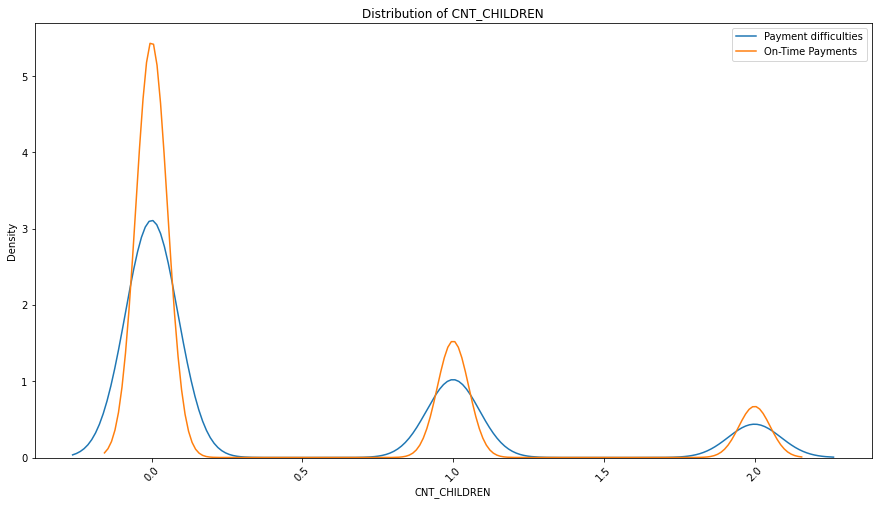

In [290]:
# Plotting a Distribution plot for the analysis

plt.figure(figsize = [15,8])
sns.distplot(inp0_1[inp0_1['CNT_CHILDREN'] <= Max_value1].CNT_CHILDREN,label = 'Payment difficulties', hist=False)
sns.distplot(inp0_0[inp0_0['CNT_CHILDREN'] <= Max_value0].CNT_CHILDREN,label = 'On-Time Payments', hist=False)
plt.title("Distribution of CNT_CHILDREN")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [291]:

# Observation

# The ones who have 0 children have a very less possibility of payment difficulty
# the ones who have 1 or 2 children have fewer possibility of payment defaulting

Analysis of INCOME THE EARN

In [292]:
# IQR OF THE INCOME WRT TO THE TARGET

Q1 = inp0_1['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = inp0_1['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value1}")
print(f"Max value after which outlier exist: {Max_value1}")


90000.0
Min value before which outlier exist: -22500.0
Max value after which outlier exist: 337500.0


In [293]:
# IQR WITH NO PAYMENT DIFFICULTY

Q1 = inp0_0['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = inp0_0['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value0}")
print(f"Max value after which outlier exist: {Max_value0}")


90000.0
Min value before which outlier exist: -22500.0
Max value after which outlier exist: 337500.0


In [294]:
# Plotting a Distribution plot for the analysis of the income earned

plt.figure(figsize = [15,8])
sns.distplot(inp0_1[inp0_1['AMT_INCOME_TOTAL'] <= Max_value1].AMT_INCOME_TOTAL,label = 'Payment difficulties', hist=False)
sns.distplot(inp0_0[inp0_0['AMT_INCOME_TOTAL'] <= Max_value0].AMT_INCOME_TOTAL,label = 'On-Time Payments', hist=False)
plt.title("Distribution of AMT_INCOME_TOTAL")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [295]:
# Observations
# The distribution of the payment difficulty is similar to that of the normal distribution with no payment difficulty
# The understanding of this is not very clear and cannot draw conclusions with the plot

### BIVARIATE ANALYSIS

In [296]:
# for Easier MAX_VALUE return
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

CONTINUOUS VS CONTINUOUS

In [297]:
# Analysis of AMT_GOODS_PRICE V/S AMT_CREDIT

# Outlier identification of AMT_GOOD_PRICE with Payment Difficulty
# Outlier identification of AMT_CREDIT with Payment difficulties

max_value1_AMT_GOODS_PRICE = outlier_range(inp0_1,'AMT_GOODS_PRICE')
print(f'max_value1_AMT_GOODS_PRICE: {max_value1_AMT_GOODS_PRICE}')

max_value1_AMT_CREDIT = outlier_range(inp0_1,'AMT_CREDIT')
print(f'max_value1_AMT_CREDIT: {max_value1_AMT_CREDIT}')

max_value1_AMT_GOODS_PRICE: 1329750.0
max_value1_AMT_CREDIT: 1406688.75


In [298]:

# Outlier identification of AMT_GOOD_PRICE with No Payment Difficulty
# Outlier identification of AMT_CREDIT with No Payment difficulties

max_value0_AMT_GOODS_PRICE = outlier_range(inp0_0,'AMT_GOODS_PRICE')
print(f'max_value0_AMT_GOODS_PRICE: {max_value0_AMT_GOODS_PRICE}')

max_value0_AMT_CREDIT = outlier_range(inp0_0,'AMT_CREDIT')
print(f'max_value0_AMT_CREDIT: {max_value0_AMT_CREDIT}')


max_value0_AMT_GOODS_PRICE: 1354755.9375
max_value0_AMT_CREDIT: 1620000.0


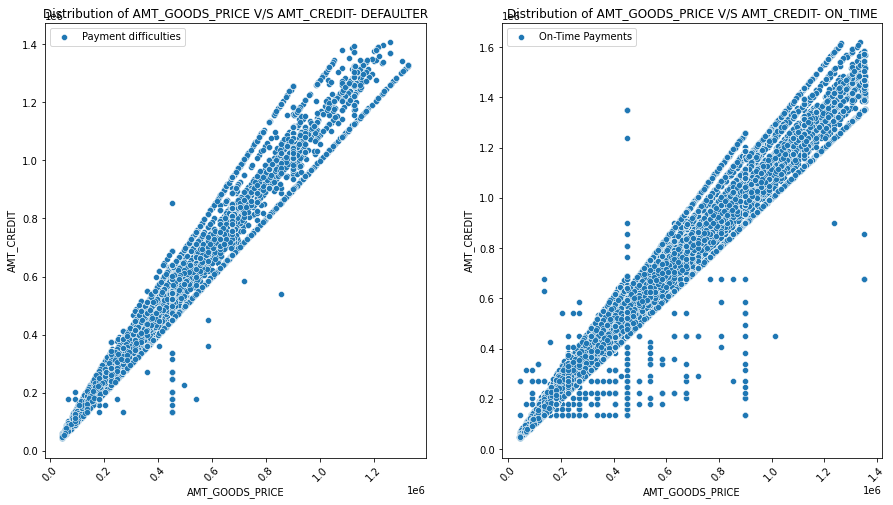

In [299]:
# Plotting a subplotted scatter plot with the outlierrs removed

plt.figure(figsize = [15,8])
plt.subplot(1,2,1)
sns.scatterplot(x = inp0_1[inp0_1['AMT_GOODS_PRICE'] <= max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = inp0_1[inp0_1['AMT_CREDIT'] <= max_value1_AMT_CREDIT].AMT_CREDIT,label = 'Payment difficulties')
plt.title("Distribution of AMT_GOODS_PRICE V/S AMT_CREDIT- DEFAULTER")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.scatterplot(x = inp0_0[inp0_0['AMT_GOODS_PRICE'] <= max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = inp0_0[inp0_0['AMT_CREDIT'] <= max_value0_AMT_CREDIT].AMT_CREDIT,label = 'On-Time Payments')
plt.title("Distribution of AMT_GOODS_PRICE V/S AMT_CREDIT- ON_TIME")
plt.xticks(rotation = 45)

plt.legend()
plt.show()


In [300]:

# Observations

# The ones who have a higher amount of credit have a higher amount of goods price
# The ones who have a lower amount of credit have a lower amount of goods price

# In-SHORT THEY ARE STRONGLY CORRELATED

In [301]:
# Analysis of AMT_ANNUITY V/S AMT_CREDIT

# Outlier identification of AMT_ANNUITY with Payment Difficulty
# Outlier identification of AMT_CREDIT with Payment difficulties

max_value1_AMT_ANNUITY = outlier_range(inp0_1,'AMT_ANNUITY')
print(f'max_value1_AMT_ANNUITY: {max_value1_AMT_ANNUITY}')

max_value1_AMT_CREDIT = outlier_range(inp0_1,'AMT_CREDIT')
print(f'max_value1_AMT_CREDIT: {max_value1_AMT_CREDIT}')

max_value1_AMT_ANNUITY: 56398.5
max_value1_AMT_CREDIT: 1406688.75


In [302]:

# Outlier identification of AMT_ANNUITY with No Payment Difficulty
# Outlier identification of AMT_CREDIT with No Payment difficulties

max_value0_AMT_ANNUITY = outlier_range(inp0_0,'AMT_ANNUITY')
print(f'max_value0_AMT_ANNUITY: {max_value0_AMT_ANNUITY}')

max_value0_AMT_CREDIT = outlier_range(inp0_0,'AMT_CREDIT')
print(f'max_value0_AMT_CREDIT: {max_value0_AMT_CREDIT}')


max_value0_AMT_ANNUITY: 62187.75
max_value0_AMT_CREDIT: 1620000.0


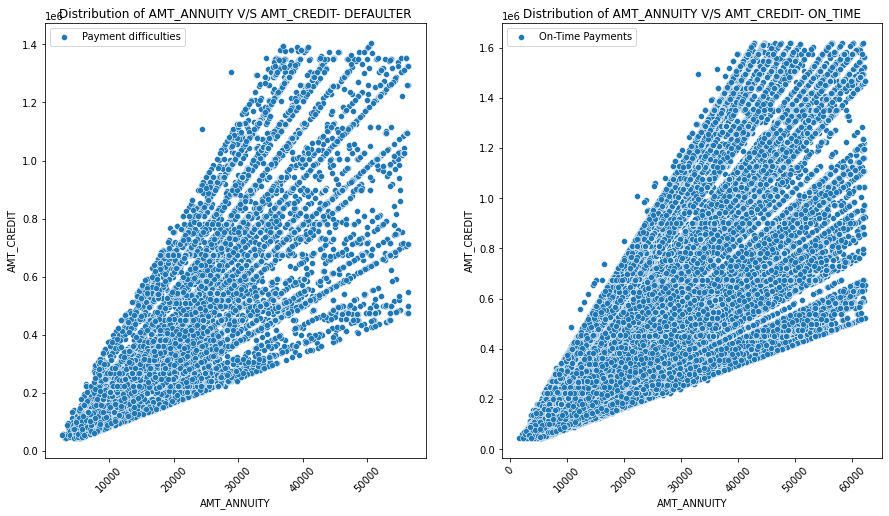

In [303]:

# Plotting a subplotted scatter plot with the outlierrs removed

plt.figure(figsize = [15,8])
plt.subplot(1,2,1)
sns.scatterplot(x = inp0_1[inp0_1['AMT_ANNUITY'] <= max_value1_AMT_ANNUITY].AMT_ANNUITY,
                y = inp0_1[inp0_1['AMT_CREDIT'] <= max_value1_AMT_CREDIT].AMT_CREDIT,label = 'Payment difficulties')
plt.title("Distribution of AMT_ANNUITY V/S AMT_CREDIT- DEFAULTER")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.scatterplot(x = inp0_0[inp0_0['AMT_ANNUITY'] <= max_value0_AMT_ANNUITY].AMT_ANNUITY,
                y = inp0_0[inp0_0['AMT_CREDIT'] <= max_value0_AMT_CREDIT].AMT_CREDIT,label = 'On-Time Payments')
plt.title("Distribution of AMT_ANNUITY V/S AMT_CREDIT- ON_TIME")
plt.xticks(rotation = 45)

plt.legend()
plt.show()


In [304]:
# Observations

# Positive Corelation- ANNUITY INCREASE THEN CREDIT also increase

In [305]:

# Analysis of AMT_ANNUITY V/S AMT_GOODS_PRICE

In [306]:
# Outlier identification of AMT_ANNUITY with Payment Difficulty
# Outlier identification of AMT_GOODS_PRICE with Payment difficulties

max_value1_AMT_ANNUITY = outlier_range(inp0_1,'AMT_ANNUITY')
print(f'max_value1_AMT_ANNUITY: {max_value1_AMT_ANNUITY}')

max_value1_AMT_GOODS_PRICE = outlier_range(inp0_1,'AMT_GOODS_PRICE')
print(f'max_value1_AMT_GOODS_PRICE: {max_value1_AMT_GOODS_PRICE}')


max_value1_AMT_ANNUITY: 56398.5
max_value1_AMT_GOODS_PRICE: 1329750.0


In [307]:
# Outlier identification of AMT_ANNUITY with No Payment Difficulty
# Outlier identification of AMT_GOODS_PRICE with No Payment difficulties

max_value0_AMT_ANNUITY = outlier_range(inp0_0,'AMT_ANNUITY')
print(f'max_value0_AMT_ANNUITY: {max_value0_AMT_ANNUITY}')

max_value0_AMT_GOODS_PRICE = outlier_range(inp0_0,'AMT_GOODS_PRICE')
print(f'max_value0_AMT_GOODS_PRICE: {max_value0_AMT_GOODS_PRICE}')


max_value0_AMT_ANNUITY: 62187.75
max_value0_AMT_GOODS_PRICE: 1354755.9375


In [308]:
# Plotting a subplotted scatter plot with the outlierrs removed

plt.figure(figsize = [15,8])
plt.subplot(1,2,1)
sns.scatterplot(x = inp0_1[inp0_1['AMT_ANNUITY'] <= max_value1_AMT_ANNUITY].AMT_ANNUITY,
                y = inp0_1[inp0_1['AMT_GOODS_PRICE'] <= max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,label = 'Payment difficulties')
plt.title("Distribution of AMT_ANNUITY V/S AMT_GOODS_PRICE- DEFAULTER")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.scatterplot(x = inp0_0[inp0_0['AMT_ANNUITY'] <= max_value0_AMT_ANNUITY].AMT_ANNUITY,
                y = inp0_0[inp0_0['AMT_GOODS_PRICE'] <= max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,label = 'On-Time Payments')
plt.title("Distribution of AMT_ANNUITY V/S AMT_GOODS_PRICE- ON_TIME")
plt.xticks(rotation = 45)

plt.legend()
plt.show()

In [309]:

# Observations

# Positive Corelation- ANNUITY INCREASE THEN GOODS_PRICE also increase

In [310]:
# Analysis of DAYS_EMPLOYED V/S AMT_INCOME_TOTAL

In [311]:
# Outlier identification of DAYS_EMPLOYED with Payment Difficulty
# Outlier identification of AMT_INCOME_TOTAL with Payment difficulties

max_value1_DAYS_EMPLOYED = outlier_range(inp0_1,'DAYS_EMPLOYED')
print(f'max_value1_DAYS_EMPLOYED: {max_value1_DAYS_EMPLOYED}')

max_value1_AMT_INCOME_TOTAL = outlier_range(inp0_1,'AMT_INCOME_TOTAL')  
print(f'max_value1_AMT_INCOME_TOTAL: {max_value1_AMT_INCOME_TOTAL}')


max_value1_DAYS_EMPLOYED: 18.5
max_value1_AMT_INCOME_TOTAL: 337500.0


In [312]:
# Outlier identification of DAYS_EMPLOYED with No Payment Difficulty
# Outlier identification of AMT_INCOME_TOTAL with No Payment difficulties

max_value0_DAYS_EMPLOYED = outlier_range(inp0_0,'DAYS_EMPLOYED')
print(f'max_value0_DAYS_EMPLOYED: {max_value0_DAYS_EMPLOYED}')

max_value0_AMT_INCOME_TOTAL = outlier_range(inp0_0,'AMT_INCOME_TOTAL')
print(f'max_value0_AMT_INCOME_TOTAL: {max_value0_AMT_INCOME_TOTAL}')

max_value0_DAYS_EMPLOYED: 37.0
max_value0_AMT_INCOME_TOTAL: 337500.0


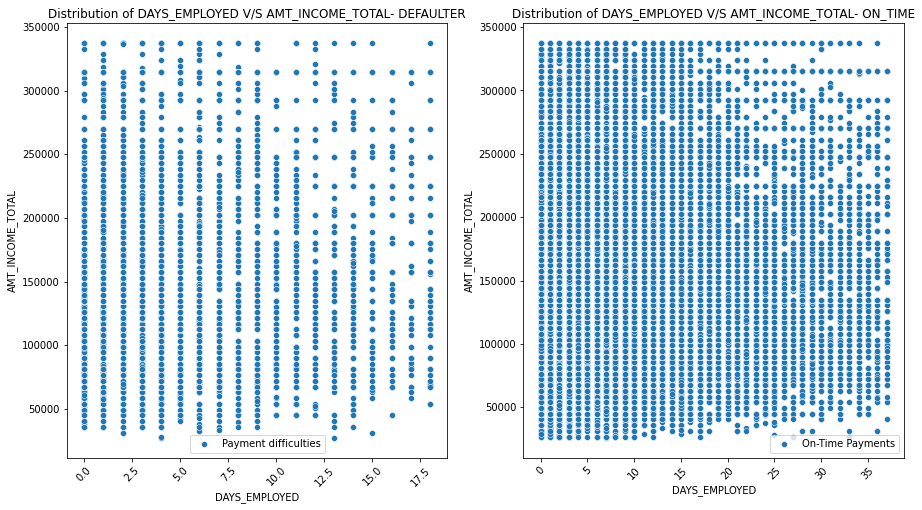

In [313]:

# Plotting a subplotted scatter plot with the outlierrs removed

plt.figure(figsize = [15,8])
plt.subplot(1,2,1)
sns.scatterplot(x = inp0_1[inp0_1['DAYS_EMPLOYED'] <= max_value1_DAYS_EMPLOYED].DAYS_EMPLOYED,
                y = inp0_1[inp0_1['AMT_INCOME_TOTAL'] <= max_value1_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL,label = 'Payment difficulties')
plt.title("Distribution of DAYS_EMPLOYED V/S AMT_INCOME_TOTAL- DEFAULTER")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.scatterplot(x = inp0_0[inp0_0['DAYS_EMPLOYED'] <= max_value0_DAYS_EMPLOYED].DAYS_EMPLOYED,
                y = inp0_0[inp0_0['AMT_INCOME_TOTAL'] <= max_value0_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL,label = 'On-Time Payments')
plt.title("Distribution of DAYS_EMPLOYED V/S AMT_INCOME_TOTAL- ON_TIME")
plt.xticks(rotation = 45)

plt.legend()
plt.show()

In [314]:
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0  ...                 0                        0.0                       0.0   
1  ...                 0                        0.0                       0.0   
2  ...                 0                        0.0                       0.0   
3  ...                 0                        NaN                       NaN   
4  ...                 0                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                       0.0                         1.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_GOODS_PRICE_CATEGORY   AGE_GROUP  AMT_INCOME_TYPE  
0                  very low  Very_Young           MEDIUM  
1                       low  Middle_Age             HIGH  
2                  very low  Middle_Age         VERY_LOW  
3                  very low  Middle_Age              LOW  
4                  very low  Middle_Age              LOW  

[5 rows x 76 columns]

In [315]:
#OBSERVATIONS

# People employed for more than 20 Years make heir payments on time, BUT These people do not exist in the difficulties group
# Peeople with more than 10 years of employment also spares indicating the payments made sufficiently better compared to early years of Employmment

CONTINUOUS VS CATEGORICAL


In [316]:
# Analysis of NAME_EDUCATION_TYPE V/S AMT_CREDIT V/S CODE_GENDER

# Outlier identification of AMT_CREDIT with Payment difficulties

max_value1_AMT_CREDIT = outlier_range(inp0_1,'AMT_CREDIT')
print(f'max_value1_AMT_CREDIT: {max_value1_AMT_CREDIT}')

# Outlier identification of AMT_CREDIT with No Payment difficulties
max_value0_AMT_CREDIT = outlier_range(inp0_0,'AMT_CREDIT')
print(f'max_value0_AMT_CREDIT: {max_value0_AMT_CREDIT}')


max_value1_AMT_CREDIT: 1406688.75
max_value0_AMT_CREDIT: 1620000.0


In [317]:
# Client with PAYMENT DIFFICULTIES

inp0_1.groupby(by= ['NAME_EDUCATION_TYPE', 'CODE_GENDER']).AMT_CREDIT.describe()

count           mean  \
NAME_EDUCATION_TYPE           CODE_GENDER                           
Academic degree               F                3.0  950245.500000   
Higher education              F             2438.0  648500.581624   
                              M             1571.0  642070.944940   
Incomplete higher             F              504.0  520150.348214   
                              M              368.0  554723.816576   
Lower secondary               F              214.0  463681.871495   
                              M              203.0  500467.544335   
Secondary / secondary special F            11011.0  545461.521796   
                              M             8513.0  538126.342300   

                                                     std       min       25%  \
NAME_EDUCATION_TYPE           CODE_GENDER                                      
Academic degree               F            504711.375348  544491.0  667660.5   
Higher education              F            410415.703440   47970.0  323595.0   
                              M            409695.934841   45000.0  329202.0   
Incomplete higher             F            352227.493127   91692.0  269550.0   
                              M            347843.706372   74628.0  284400.0   
Lower secondary               F            276698.861494   50940.0  269662.5   
                              M            257868.829269   89388.0  311719.5   
Secondary / secondary special F            335125.668113   45000.0  283500.0   
                              M            323672.404216   45000.0  284400.0   

                                                50%          75%        max  
NAME_EDUCATION_TYPE           CODE_GENDER                                    
Academic degree               F            790830.0  1153122.750  1515415.5  
Higher education              F            545040.0   877500.000  2687355.0  
                              M            545040.0   832797.000  2695500.0  
Incomplete higher             F            450000.0   675000.000  2695500.0  
                              M            497520.0   699976.125  2013840.0  
Lower secondary               F            401580.0   599355.000  1325475.0  
                              M            457717.5   640080.000  1546020.0  
Secondary / secondary special F            490495.5   724248.000  4027680.0  
                              M            479974.5   679500.000  2961000.0

In [318]:
# client with no payment difficulty

inp0_0.groupby(by = ['NAME_EDUCATION_TYPE', 'CODE_GENDER']).AMT_CREDIT.describe()

count           mean  \
NAME_EDUCATION_TYPE           CODE_GENDER                            
Academic degree               F                97.0  708770.737113   
                              M                64.0  735235.382812   
Higher education              F             47852.0  682485.002194   
                              M             23002.0  713144.543844   
Incomplete higher             F              5780.0  555340.534256   
                              M              3625.0  592586.904414   
Lower secondary               F              2097.0  476462.358369   
                              M              1302.0  513760.455069   
Secondary / secondary special F            132456.0  567121.499049   
                              M             66411.0  587819.857027   

                                                     std       min       25%  \
NAME_EDUCATION_TYPE           CODE_GENDER                                      
Academic degree               F            463052.418484  130824.0  354469.5   
                              M            497739.972619   74182.5  309519.0   
Higher education              F            456642.778578   45000.0  302206.5   
                              M            486073.660453   45000.0  315000.0   
Incomplete higher             F            385980.597875   45000.0  253737.0   
                              M            411077.547244   45000.0  269982.0   
Lower secondary               F            320800.325909   45000.0  229230.0   
                              M            340183.479332   47970.0  260586.0   
Secondary / secondary special F            375245.015327   45000.0  269550.0   
                              M            388533.792660   45000.0  270000.0   

                                                50%        75%        max  
NAME_EDUCATION_TYPE           CODE_GENDER                                  
Academic degree               F            607500.0  1006920.0  2463840.0  
                              M            610056.0  1036890.0  1984500.0  
Higher education              F            568057.5   916470.0  4050000.0  
                              M            592560.0   973503.0  4050000.0  
Incomplete higher             F            454500.0   760225.5  2517300.0  
                              M            490536.0   808650.0  2517300.0  
Lower secondary               F            405000.0   675000.0  2013840.0  
                              M            450000.0   675000.0  2250000.0  
Secondary / secondary special F            495891.0   781920.0  3150000.0  
                              M            508495.5   808650.0  2931660.0

In [319]:
# creating a boxplot for the Name_eduction_type, AMT_CREDIT with code gender for both payment difficulty and no difficulty

plt.figure(figsize = [18,10])

plt.subplot(1,2,1)
plt.title('Payment Difficulties')
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x = inp0_1.NAME_EDUCATION_TYPE, 
            y = inp0_1[inp0_1['AMT_CREDIT'] < max_value1_AMT_CREDIT]['AMT_CREDIT'], 
            data = inp0_1, 
            flierprops = red_diamond, 
            order = sorted(inp0_1['NAME_EDUCATION_TYPE'].unique(), reverse = True),
            hue = inp0_1.CODE_GENDER, hue_order = sorted(inp0_0['CODE_GENDER'].unique(), reverse = True))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('No Payment Difficulties')
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x = inp0_0.NAME_EDUCATION_TYPE,
            y = inp0_0[inp0_0['AMT_CREDIT'] < max_value0_AMT_CREDIT]['AMT_CREDIT'],
            data = inp0_0,
            flierprops = red_diamond,
            order = sorted(inp0_0['NAME_EDUCATION_TYPE'].unique(), reverse = True),
            hue = inp0_0.CODE_GENDER, hue_order = sorted(inp0_0['CODE_GENDER'].unique(), reverse = True))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

plt.show()

In [320]:
# Observations

# There is a huge range of credit value taken up by the Academic degree holders and have had no diifficult making the payments
# the credit seems to be higher for the ones who have faced the difficulty
# Males of higher degree holder have always made the payments on time

Analysis of NAME_FAMILY_STATUS V/S AMT_INCOME_TOTAL V/S CODE_GENDER

In [321]:
# Analysis of FAMIL STATUS V/S AMT_INCOME V/S CODE_GENDER

# Outlier identification of AMT_INCOME_TOTAL with Payment difficulties

max_value1_AMT_INCOME_TOTAL = outlier_range(inp0_1,'AMT_INCOME_TOTAL')
print(f'max_value1_AMT_INCOME_TOTAL: {max_value1_AMT_INCOME_TOTAL}')

# Outlier identification of AMT_INCOME_TOTAL with No Payment difficulties
max_value0_AMT_INCOME_TOTAL = outlier_range(inp0_0,'AMT_INCOME_TOTAL')
print(f'max_value0_AMT_INCOME_TOTAL: {max_value0_AMT_INCOME_TOTAL}')


max_value1_AMT_INCOME_TOTAL: 337500.0
max_value0_AMT_INCOME_TOTAL: 337500.0


In [322]:

# Client with PAYMENT DIFFICULTIES

inp0_1.groupby(by= ['NAME_FAMILY_STATUS', 'CODE_GENDER']).AMT_INCOME_TOTAL.describe()

count           mean           std  \
NAME_FAMILY_STATUS   CODE_GENDER                                        
Civil marriage       F            1753.0  153620.720194  1.010459e+05   
                     M            1208.0  173949.988411  9.244917e+04   
Married              F            8324.0  159907.850853  1.283283e+06   
                     M            6526.0  182233.063975  9.478777e+04   
Separated            F            1045.0  161159.546411  8.263333e+04   
                     M             575.0  178888.280870  8.503485e+04   
Single / not married F            2220.0  150373.572973  7.699614e+04   
                     M            2237.0  166827.989048  8.047161e+04   
Widow                F             828.0  141806.896739  6.764706e+04   
                     M             109.0  145368.701835  6.754357e+04   

                                      min       25%       50%       75%  \
NAME_FAMILY_STATUS   CODE_GENDER                                          
Civil marriage       F            25650.0  108000.0  135000.0  180000.0   
                     M            36000.0  117000.0  157500.0  202500.0   
Married              F            27000.0   90000.0  135000.0  180000.0   
                     M            31500.0  126000.0  157500.0  225000.0   
Separated            F            36000.0  112500.0  135000.0  202500.0   
                     M            45000.0  126000.0  157500.0  225000.0   
Single / not married F            31500.0  103500.0  135000.0  180000.0   
                     M            40500.0  112500.0  157500.0  202500.0   
Widow                F            28575.0   90000.0  130500.0  180000.0   
                     M            45000.0   90000.0  135000.0  180000.0   

                                          max  
NAME_FAMILY_STATUS   CODE_GENDER               
Civil marriage       F              3150000.0  
                     M              1350000.0  
Married              F            117000000.0  
                     M              1890000.0  
Separated            F               832500.0  
                     M               675000.0  
Single / not married F               810000.0  
                     M               990000.0  
Widow                F               540000.0  
                     M               360000.0

In [323]:

# Client with NO PAYMENT DIFFICULTIES

inp0_0.groupby(by = ['NAME_FAMILY_STATUS','CODE_GENDER']).AMT_INCOME_TOTAL.describe()

count           mean            std  \
NAME_FAMILY_STATUS   CODE_GENDER                                           
Civil marriage       F             19017.0  162086.054245  106811.493431   
                     M              7797.0  184126.294363  106559.488198   
Married              F            114125.0  154289.532323   88593.427099   
                     M             67459.0  199592.828178  147599.764903   
Separated            F             14416.0  166374.209767   94782.184577   
                     M              3734.0  191625.458356  102991.275912   
Single / not married F             26364.0  160796.867506   89306.040122   
                     M             14623.0  183592.862532  117388.187402   
Widow                F             14360.0  142114.631481   76227.052530   
                     M               791.0  160029.193426   95460.171022   

                                      min       25%       50%       75%  \
NAME_FAMILY_STATUS   CODE_GENDER                                          
Civil marriage       F            27000.0  112500.0  135000.0  202500.0   
                     M            27000.0  121500.0  157500.0  225000.0   
Married              F            26100.0   94500.0  135000.0  180000.0   
                     M            27000.0  135000.0  180000.0  225000.0   
Separated            F            27000.0  112500.0  139500.0  202500.0   
                     M            32850.0  135000.0  180000.0  225000.0   
Single / not married F            25650.0  112500.0  135000.0  198000.0   
                     M            27000.0  121500.0  157500.0  225000.0   
Widow                F            26100.0   90000.0  126000.0  180000.0   
                     M            28350.0   99000.0  135000.0  202500.0   

                                         max  
NAME_FAMILY_STATUS   CODE_GENDER              
Civil marriage       F             9000000.0  
                     M             3825000.0  
Married              F             3600000.0  
                     M            18000090.0  
Separated            F             2250000.0  
                     M             1235038.5  
Single / not married F             2250000.0  
                     M             4500000.0  
Widow                F             1800000.0  
                     M             1035000.0

In [324]:
# creating a boxplot for the NAME_FAMILY_STATUS, AMT_INCOME_TOTAL with code gender for both payment difficulty and no difficulty

plt.figure(figsize = [18,10])

plt.subplot(1,2,1)
plt.title('Payment Difficulties')
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x = inp0_1.NAME_FAMILY_STATUS, 
            y = inp0_1[inp0_1['AMT_INCOME_TOTAL'] < max_value1_AMT_INCOME_TOTAL]['AMT_INCOME_TOTAL'], 
            data = inp0_1, 
            flierprops = red_diamond, 
            order = sorted(inp0_1['NAME_FAMILY_STATUS'].unique(), reverse = True),
            hue = inp0_1.CODE_GENDER, hue_order = sorted(inp0_0['CODE_GENDER'].unique(), reverse = True))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('No Payment Difficulties')
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x = inp0_0.NAME_FAMILY_STATUS,
            y = inp0_0[inp0_0['AMT_INCOME_TOTAL'] < max_value0_AMT_INCOME_TOTAL]['AMT_INCOME_TOTAL'],
            data = inp0_0,
            flierprops = red_diamond,
            order = sorted(inp0_0['NAME_FAMILY_STATUS'].unique(), reverse = True),
            hue = inp0_0.CODE_GENDER, hue_order = sorted(inp0_0['CODE_GENDER'].unique(), reverse = True))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

In [325]:
# Observations

# Married clients have a slightly higher mean/median income with On-Time Payments than Payment difficulties category

Analysis of YEARS_BIRTH_CATEGORY V/S AMT_INCOME_TOTAL V/S NAME_HOUSING_TYPE

In [326]:
# Outlier identification of AMT_INCOME_TOTAL with Payment difficulties
max_value1_AMT_INCOME_TOTAL = outlier_range(inp0_1,'AMT_INCOME_TOTAL')
print(f'max_value1_AMT_INCOME_TOTAL: {max_value1_AMT_INCOME_TOTAL}')

# Outlier identification of AMT_INCOME_TOTAL with No Payment difficulties
max_value0_AMT_INCOME_TOTAL = outlier_range(inp0_0,'AMT_INCOME_TOTAL')
print(f'max_value0_AMT_INCOME_TOTAL: {max_value0_AMT_INCOME_TOTAL}')


max_value1_AMT_INCOME_TOTAL: 337500.0
max_value0_AMT_INCOME_TOTAL: 337500.0


In [327]:
# client with payment difficulties

inp0_1.groupby(by = ['AGE_GROUP','NAME_HOUSING_TYPE']).AMT_INCOME_TOTAL.describe()

count           mean           std  \
AGE_GROUP      NAME_HOUSING_TYPE                                           
Very_Young     Co-op apartment         17.0  134799.882353  4.731470e+04   
               House / apartment     1362.0  143681.022026  6.386046e+04   
               Municipal apartment     46.0  143364.130435  5.092641e+04   
               Office apartment         9.0  127500.000000  3.133887e+04   
               Rented apartment        95.0  136554.726316  5.673234e+04   
               With parents           387.0  133770.569767  5.288845e+04   
Young          Co-op apartment         41.0  167376.951220  8.392711e+04   
               House / apartment     6454.0  179094.193368  1.456615e+06   
               Municipal apartment    269.0  161827.695167  8.600397e+04   
               Office apartment        63.0  167832.357143  8.793488e+04   
               Rented apartment       258.0  155965.552326  6.481087e+04   
               With parents           952.0  149171.090861  7.338790e+04   
Middle_Age     Co-op apartment         28.0  205392.857143  8.963438e+04   
               House / apartment    12095.0  167280.723398  9.492938e+04   
               Municipal apartment    582.0  163048.762887  8.694027e+04   
               Office apartment        85.0  171661.764706  7.938632e+04   
               Rented apartment       242.0  171583.884298  8.969128e+04   
               With parents           395.0  172474.177215  9.932031e+04   
Senior_Citizen Co-op apartment          3.0  180000.000000  9.807523e+04   
               House / apartment     1361.0  134033.296841  7.683667e+04   
               Municipal apartment     58.0  135139.655172  6.266472e+04   
               Office apartment        15.0  128880.000000  6.626312e+04   
               Rented apartment         6.0  108750.000000  3.629876e+04   
               With parents             2.0  110250.000000  2.863782e+04   

                                        min       25%       50%        75%  \
AGE_GROUP      NAME_HOUSING_TYPE                                             
Very_Young     Co-op apartment      67500.0  112500.0  135000.0  180000.00   
               House / apartment    31500.0  104625.0  135000.0  166500.00   
               Municipal apartment  58500.0  112500.0  135000.0  174937.50   
               Office apartment     67500.0  112500.0  135000.0  148500.00   
               Rented apartment     49500.0   99000.0  118642.5  167474.25   
               With parents         36000.0   98437.5  126000.0  157500.00   
Young          Co-op apartment      76500.0  112500.0  153000.0  202500.00   
               House / apartment    27000.0  112500.0  139500.0  198000.00   
               Municipal apartment  45000.0  112500.0  144000.0  202500.00   
               Office apartment     52438.5  119250.0  135000.0  202500.00   
               Rented apartment     36000.0  112500.0  135000.0  180000.00   
               With parents         27900.0   99000.0  135000.0  180000.00   
Middle_Age     Co-op apartment      54000.0  135000.0  191250.0  258750.00   
               House / apartment    25650.0  112500.0  157500.0  202500.00   
               Municipal apartment  36000.0  112500.0  135000.0  202500.00   
               Office apartment     54000.0  117000.0  157500.0  202500.00   
               Rented apartment     40500.0  112500.0  157500.0  202500.00   
               With parents         40500.0  112500.0  157500.0  202500.00   
Senior_Citizen Co-op apartment      67500.0  146250.0  225000.0  236250.00   
               House / apartment    31500.0   87750.0  112500.0  157500.00   
               Municipal apartment  40500.0   90675.0  126000.0  171000.00   
               Office apartment     45000.0   80100.0  121500.0  157500.00   
               Rented apartment     60750.0   83812.5  112500.0  129375.00   
               With parents         90000.0  100125.0  110250.0  120375.00   

                                

In [328]:
inp0_0.groupby(by = ['AGE_GROUP','NAME_HOUSING_TYPE']).AMT_INCOME_TOTAL.describe()

count           mean            std  \
AGE_GROUP      NAME_HOUSING_TYPE                                             
Very_Young     Co-op apartment         126.0  159371.428571   82599.083876   
               House / apartment     10193.0  152587.498470   76629.772469   
               Municipal apartment     303.0  149637.623762   94290.048864   
               Office apartment        126.0  162196.428571   76582.025353   
               Rented apartment        615.0  144346.236585   63703.304160   
               With parents           3039.0  140647.483712   61790.827541   
Young          Co-op apartment         338.0  165340.198225   78418.495115   
               House / apartment     56230.0  174579.080199  101387.372428   
               Municipal apartment    1964.0  177808.701629   90362.331012   
               Office apartment        772.0  194715.810233  118301.555302   
               Rented apartment       1871.0  166064.072421   83702.608808   
               With parents           6713.0  163494.466960  100252.615296   
Middle_Age     Co-op apartment         514.0  174931.310311   88893.481395   
               House / apartment    158648.0  174100.174495  121311.313934   
               Municipal apartment    6953.0  171399.504602  103008.186737   
               Office apartment       1381.0  193965.539826  123690.453884   
               Rented apartment       1696.0  181736.992040  102618.828725   
               With parents           3281.0  169996.151631   91114.405774   
Senior_Citizen Co-op apartment          55.0  123259.090909   66725.685050   
               House / apartment     26525.0  136740.097641   76414.186896   
               Municipal apartment    1008.0  138512.584821   73124.248562   
               Office apartment        166.0  149893.183735   89092.545805   
               Rented apartment         98.0  145723.867347  107952.939341   
               With parents             71.0  134233.098592   68397.352154   

                                        min       25%       50%       75%  \
AGE_GROUP      NAME_HOUSING_TYPE                                            
Very_Young     Co-op apartment      45000.0  112500.0  135000.0  192375.0   
               House / apartment    27000.0  112500.0  135000.0  180000.0   
               Municipal apartment  45000.0  112500.0  135000.0  180000.0   
               Office apartment     45000.0  112500.0  138375.0  202500.0   
               Rented apartment     29250.0   99000.0  135000.0  180000.0   
               With parents         27000.0   99000.0  135000.0  162000.0   
Young          Co-op apartment      45000.0  112500.0  144000.0  202500.0   
               House / apartment    27000.0  112500.0  157500.0  202500.0   
               Municipal apartment  31500.0  112500.0  157500.0  225000.0   
               Office apartment     36000.0  121500.0  180000.0  225000.0   
               Rented apartment     36000.0  112500.0  153000.0  202500.0   
               With parents         27000.0  112500.0  135000.0  202500.0   
Middle_Age     Co-op apartment      45000.0  112500.0  157500.0  225000.0   
               House / apartment    26100.0  112500.0  157500.0  211500.0   
               Municipal apartment  29250.0  112500.0  157500.0  211500.0   
               Office apartment     27967.5  112500.0  162000.0  225000.0   
               Rented apartment     28350.0  112500.0  157500.0  225000.0   
               With parents         25650.0  112500.0  157500.0  202500.0   
Senior_Citizen Co-op apartment      45000.0   90000.0  112500.0  135000.0   
               House / apartment    27000.0   90000.0  117000.0  166500.0   
               Municipal apartment  27000.0   90000.0  130500.0  180000.0   
               Office apartment     37350.0   90000.0  135000.0  202500.0   
               Rented apartment     31500.0   90000.0  114750.0  160875.0   
               With parents         31500.0   86400.0  112500.0  157500.0   

       

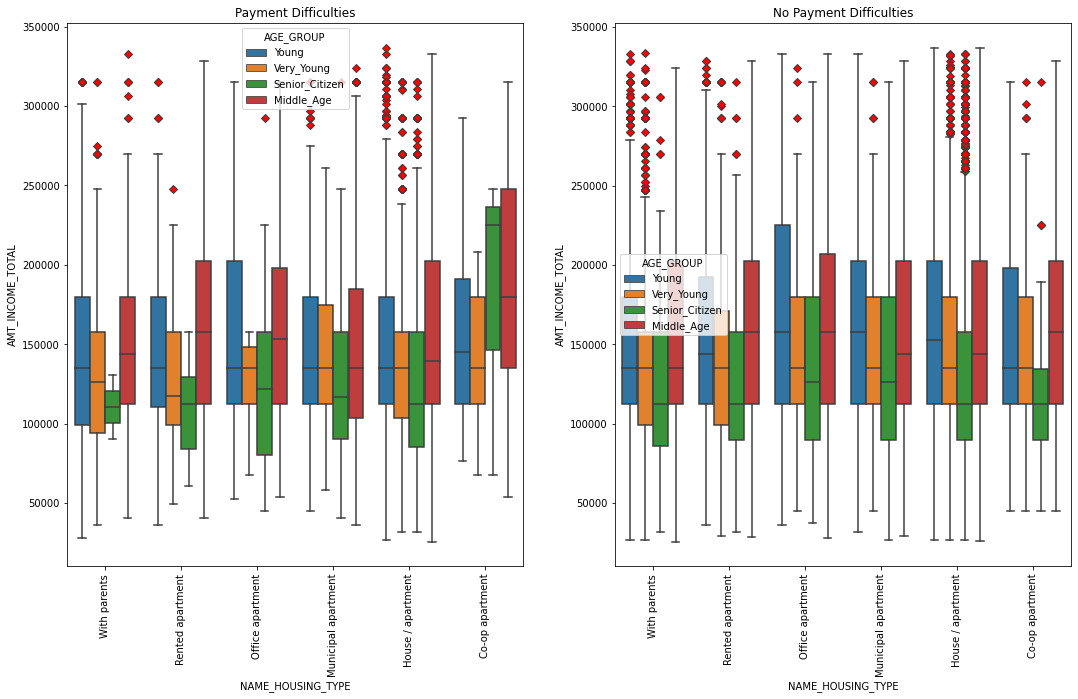

In [329]:
# creating a boxplot for the NAME_HOUSING_TYPE, AMT_INCOME_TOTAL with AGE_GROUP for both payment difficulty and no difficulty

plt.figure(figsize = [18,10])

plt.subplot(1,2,1)
plt.title('Payment Difficulties')
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x = inp0_1.NAME_HOUSING_TYPE,
            y = inp0_1[inp0_1['AMT_INCOME_TOTAL'] < max_value1_AMT_INCOME_TOTAL]['AMT_INCOME_TOTAL'],
            data = inp0_1,  
            flierprops = red_diamond,
            order = sorted(inp0_1['NAME_HOUSING_TYPE'].unique(), reverse = True),
            hue = inp0_1.AGE_GROUP, hue_order = sorted(inp0_1['AGE_GROUP'].unique(), reverse = True))
plt.ticklabel_format(style='plain', axis='y')   
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('No Payment Difficulties')
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x = inp0_0.NAME_HOUSING_TYPE,
            y = inp0_0[inp0_0['AMT_INCOME_TOTAL'] < max_value0_AMT_INCOME_TOTAL]['AMT_INCOME_TOTAL'],
            data = inp0_0,
            flierprops = red_diamond,
            order = sorted(inp0_0['NAME_HOUSING_TYPE'].unique(), reverse = True),
            hue = inp0_0.AGE_GROUP, hue_order = sorted(inp0_0['AGE_GROUP'].unique(), reverse = True))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()


Analysis of FLAG_OWN_CAR V/S AMT_ANNUITY V/S CODE_GENDER

In [330]:
# outlier identification of AMT_ANNUITY with Payment difficulties

max_value1_AMT_ANNUITY = outlier_range(inp0_1,'AMT_ANNUITY')
print(f'max_value1_AMT_ANNUITY: {max_value1_AMT_ANNUITY}')

# outlier identification of AMT_ANNUITY with No Payment difficulties

max_value0_AMT_ANNUITY = outlier_range(inp0_0,'AMT_ANNUITY')
print(f'max_value0_AMT_ANNUITY: {max_value0_AMT_ANNUITY}')

max_value1_AMT_ANNUITY: 56398.5
max_value0_AMT_ANNUITY: 62187.75


In [331]:
# Client with Payment difficulties

inp0_1.groupby(by = ['FLAG_OWN_CAR','CODE_GENDER']).AMT_ANNUITY.describe().head()

count          mean           std     min  \
FLAG_OWN_CAR CODE_GENDER                                                
N            F            11567.0  24910.533717  11855.563615  2722.5   
             M             5682.0  26258.836061  12075.777539  3172.5   
Y            F             2603.0  28577.909527  13256.174575  3559.5   
             M             4973.0  29293.817313  13130.940168  4374.0   

                                25%       50%       75%       max  
FLAG_OWN_CAR CODE_GENDER                                           
N            F            16350.750  23715.00  31261.50  149211.0  
             M            17517.375  25202.25  32352.75  127507.5  
Y            F            18969.750  26797.50  35961.75  128178.0  
             M            20007.000  27558.00  36459.00  115803.0

In [332]:
inp0_0.groupby(by = ['FLAG_OWN_CAR','CODE_GENDER']).AMT_ANNUITY.describe().head()

count          mean           std     min  \
FLAG_OWN_CAR CODE_GENDER                                                 
N            F            145917.0  25351.258280  13579.026022  1615.5   
             M             39749.0  26799.801001  14295.319107  1980.0   
Y            F             42357.0  29830.221120  15705.982418  1993.5   
             M             54651.0  30200.482077  15988.655901  2317.5   

                              25%      50%      75%       max  
FLAG_OWN_CAR CODE_GENDER                                       
N            F            15448.5  23283.0  32125.5  230161.5  
             M            16294.5  24750.0  34114.5  225000.0  
Y            F            18409.5  27085.5  38133.0  225000.0  
             M            19125.0  27630.0  38322.0  258025.5

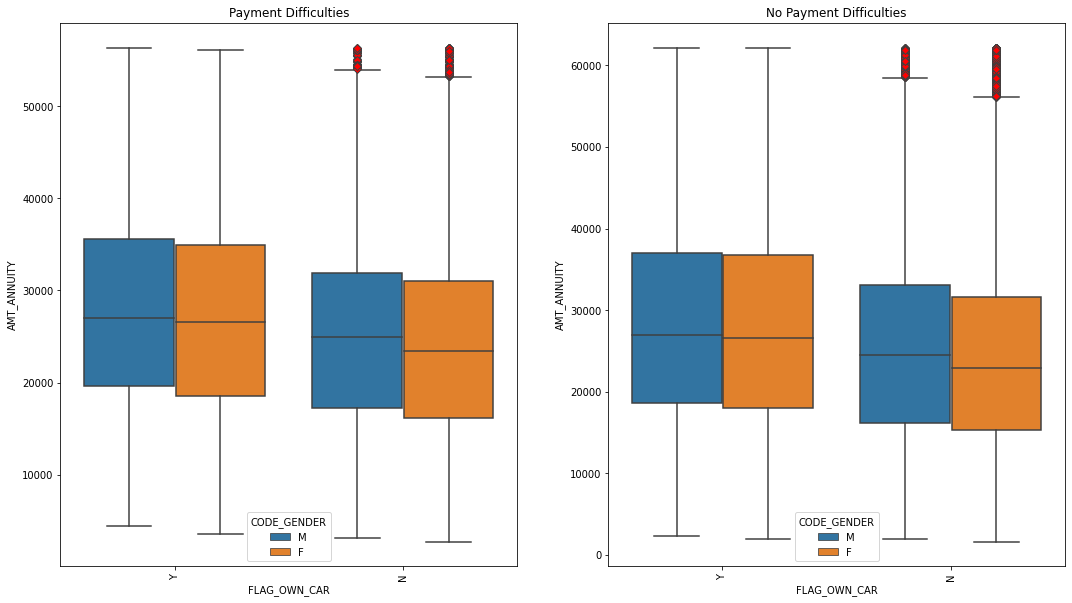

In [333]:
# creating a boxplot for the FLAG_OWN_CAR, AMT_ANNUITY with CODE_GENDER for both payment difficulty and no difficulty

plt.figure(figsize = [18,10])

plt.subplot(1,2,1)
plt.title('Payment Difficulties')
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x = inp0_1.FLAG_OWN_CAR,
            y = inp0_1[inp0_1['AMT_ANNUITY'] < max_value1_AMT_ANNUITY]['AMT_ANNUITY'],
            data = inp0_1,
            flierprops = red_diamond,
            order = sorted(inp0_1['FLAG_OWN_CAR'].unique(), reverse = True),
            hue = inp0_1.CODE_GENDER, hue_order = sorted(inp0_1['CODE_GENDER'].unique(), reverse = True))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('No Payment Difficulties')
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x = inp0_0.FLAG_OWN_CAR,
            y = inp0_0[inp0_0['AMT_ANNUITY'] < max_value0_AMT_ANNUITY]['AMT_ANNUITY'],
            data = inp0_0,
            flierprops = red_diamond,
            order = sorted(inp0_0['FLAG_OWN_CAR'].unique(), reverse = True),
            hue = inp0_0.CODE_GENDER, hue_order = sorted(inp0_0['CODE_GENDER'].unique(), reverse = True))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()


In [334]:
# Observation
# there is not clear visual understanding between the car_owned by a male or female with the annuity amount affecting our target variablle


Analysis of NAME_INCOME_TYPE V/S AMT_GOODS_PRICE V/S CODE_GENDER

In [335]:
# Outlier identification of AMT_GOODS_PRICE with Payment difficultie

max_value1_AMT_GOODS_PRICE = outlier_range(inp0_1,'AMT_GOODS_PRICE')
print(f'max_value1_AMT_GOODS_PRICE: {max_value1_AMT_GOODS_PRICE}')

# Outlier identification of AMT_GOODS_PRICE with No Payment difficulties

max_value0_AMT_GOODS_PRICE = outlier_range(inp0_0,'AMT_GOODS_PRICE')
print(f'max_value0_AMT_GOODS_PRICE: {max_value0_AMT_GOODS_PRICE}')


max_value1_AMT_GOODS_PRICE: 1329750.0
max_value0_AMT_GOODS_PRICE: 1354755.9375


In [336]:
inp0_1.groupby(by = ['NAME_INCOME_TYPE','CODE_GENDER']).AMT_GOODS_PRICE.describe().head()

count           mean            std  \
NAME_INCOME_TYPE     CODE_GENDER                                         
Commercial associate F            2968.0  536304.018699  353598.522077   
                     M            2392.0  526355.375418  335793.332040   
Maternity leave      F               2.0  929250.000000  715945.615951   
Pensioner            F            2243.0  494976.115693  316903.858997   
                     M             739.0  486543.075101  321104.431714   

                                       min       25%       50%        75%  \
NAME_INCOME_TYPE     CODE_GENDER                                            
Commercial associate F             45000.0  270000.0  450000.0   675000.0   
                     M             45000.0  270000.0  450000.0   675000.0   
Maternity leave      F            423000.0  676125.0  929250.0  1182375.0   
Pensioner            F             45000.0  229500.0  450000.0   675000.0   
                     M             45000.0  229500.0  450000.0   675000.0   

                                        max  
NAME_INCOME_TYPE     CODE_GENDER             
Commercial associate F            3600000.0  
                     M            2961000.0  
Maternity leave      F            1435500.0  
Pensioner            F            2173500.0  
                     M            1800000.0

In [337]:
inp0_0.groupby(by = ['NAME_INCOME_TYPE','CODE_GENDER']).AMT_GOODS_PRICE.describe().head()

count          mean           std  \
NAME_INCOME_TYPE     CODE_GENDER                                        
Businessman          F                3.0  1.125000e+06  1.031080e+06   
                     M                7.0  1.272857e+06  7.551041e+05   
Commercial associate F            41552.0  6.021327e+05  4.007011e+05   
                     M            24705.0  6.201237e+05  4.223452e+05   
Maternity leave      F                2.0  5.625000e+05  3.500179e+05   

                                       min       25%        50%        75%  \
NAME_INCOME_TYPE     CODE_GENDER                                             
Businessman          F            225000.0  562500.0   900000.0  1575000.0   
                     M            495000.0  607500.0  1350000.0  1800000.0   
Commercial associate F             45000.0  270000.0   472500.0   837000.0   
                     M             45000.0  270000.0   472500.0   900000.0   
Maternity leave      F            315000.0  438750.0   562500.0   686250.0   

                                        max  
NAME_INCOME_TYPE     CODE_GENDER             
Businessman          F            2250000.0  
                     M            2250000.0  
Commercial associate F            4050000.0  
                     M            4050000.0  
Maternity leave      F             810000.0

In [338]:
# creating a boxplot for the NAME_INCOME_TYPE, AMT_GOODS_PRICE with CODE_GENDER for both payment difficulty and no difficulty

plt.figure(figsize = [18,10])

plt.subplot(1,2,1)
plt.title('Payment Difficulties')
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x = inp0_1.NAME_INCOME_TYPE,
            y = inp0_1[inp0_1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE]['AMT_GOODS_PRICE'],
            data = inp0_1,
            flierprops = red_diamond,
            order = sorted(inp0_1['NAME_INCOME_TYPE'].unique(), reverse = True),
            hue = inp0_1.CODE_GENDER, hue_order = sorted(inp0_1['CODE_GENDER'].unique(), reverse = True))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('No Payment Difficulties')
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x = inp0_0.NAME_INCOME_TYPE,
            y = inp0_0[inp0_0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE]['AMT_GOODS_PRICE'],
            data = inp0_0,
            flierprops = red_diamond,
            order = sorted(inp0_0['NAME_INCOME_TYPE'].unique(), reverse = True),
            hue = inp0_0.CODE_GENDER, hue_order = sorted(inp0_1['CODE_GENDER'].unique(), reverse = True))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

In [339]:
# #Observations

# Clients who are Unemployed and Male have a very high price of goods in On-Time Payments than Payment difficulties
# Clients who are Student and either Male OR Female do their payments On-Time. 
# They are completely missing from Payment difficulties category. Student seems to be an attractive category to give loans to.
# Clients who are Businessman and either Male OR Female do their payments On-Time. 
# They are completely missing from Payment difficulties category. 
# Businessman seems to be an attractive category to give loans to.

Analysis of NAME_INCOME_TYPE V/S AMT_INCOME_TOTAL V/S CODE_GENDER

In [340]:
# Outlier identification of AMT_INCOME_TOTAL with Payment difficulties

max_value1_AMT_INCOME_TOTAL = outlier_range(inp0_1,'AMT_INCOME_TOTAL')
print(f'max_value1_AMT_INCOME_TOTAL: {max_value1_AMT_INCOME_TOTAL}')

# Outlier identification of AMT_INCOME_TOTAL with No Payment difficulties

max_value0_AMT_INCOME_TOTAL = outlier_range(inp0_0,'AMT_INCOME_TOTAL')
print(f'max_value0_AMT_INCOME_TOTAL: {max_value0_AMT_INCOME_TOTAL}')


max_value1_AMT_INCOME_TOTAL: 337500.0
max_value0_AMT_INCOME_TOTAL: 337500.0


In [341]:
inp0_1.groupby(by = ['NAME_INCOME_TYPE','CODE_GENDER']).AMT_INCOME_TOTAL.describe().head()

count           mean            std  \
NAME_INCOME_TYPE     CODE_GENDER                                         
Commercial associate F            2968.0  172962.535209   94922.968878   
                     M            2392.0  207145.505017  120281.013430   
Maternity leave      F               2.0   58500.000000   12727.922061   
Pensioner            F            2243.0  133275.589166   71580.630080   
                     M             739.0  142481.259134   76941.738672   

                                      min       25%       50%       75%  \
NAME_INCOME_TYPE     CODE_GENDER                                          
Commercial associate F            36000.0  112500.0  157500.0  202500.0   
                     M            45000.0  135000.0  180000.0  225000.0   
Maternity leave      F            49500.0   54000.0   58500.0   63000.0   
Pensioner            F            25650.0   90000.0  117000.0  157500.0   
                     M            31500.0   90000.0  135000.0  180000.0   

                                        max  
NAME_INCOME_TYPE     CODE_GENDER             
Commercial associate F            1575000.0  
                     M            1890000.0  
Maternity leave      F              67500.0  
Pensioner            F            1260000.0  
                     M             585000.0

In [342]:
inp0_0.groupby(by = ['NAME_INCOME_TYPE','CODE_GENDER']).AMT_INCOME_TOTAL.describe().head()

count           mean            std  \
NAME_INCOME_TYPE     CODE_GENDER                                          
Businessman          F                3.0  555000.000000  337749.907476   
                     M                7.0  694285.714286  738446.728904   
Commercial associate F            41552.0  187223.556855  108354.861814   
                     M            24705.0  232612.571849  199602.652415   
Maternity leave      F                2.0  112500.000000   31819.805153   

                                       min       25%       50%       75%  \
NAME_INCOME_TYPE     CODE_GENDER                                           
Businessman          F            225000.0  382500.0  540000.0  720000.0   
                     M            180000.0  202500.0  450000.0  787500.0   
Commercial associate F             26550.0  117000.0  157500.0  225000.0   
                     M             36000.0  157500.0  202500.0  270000.0   
Maternity leave      F             90000.0  101250.0  112500.0  123750.0   

                                         max  
NAME_INCOME_TYPE     CODE_GENDER              
Businessman          F              900000.0  
                     M             2250000.0  
Commercial associate F             3600000.0  
                     M            18000090.0  
Maternity leave      F              135000.0

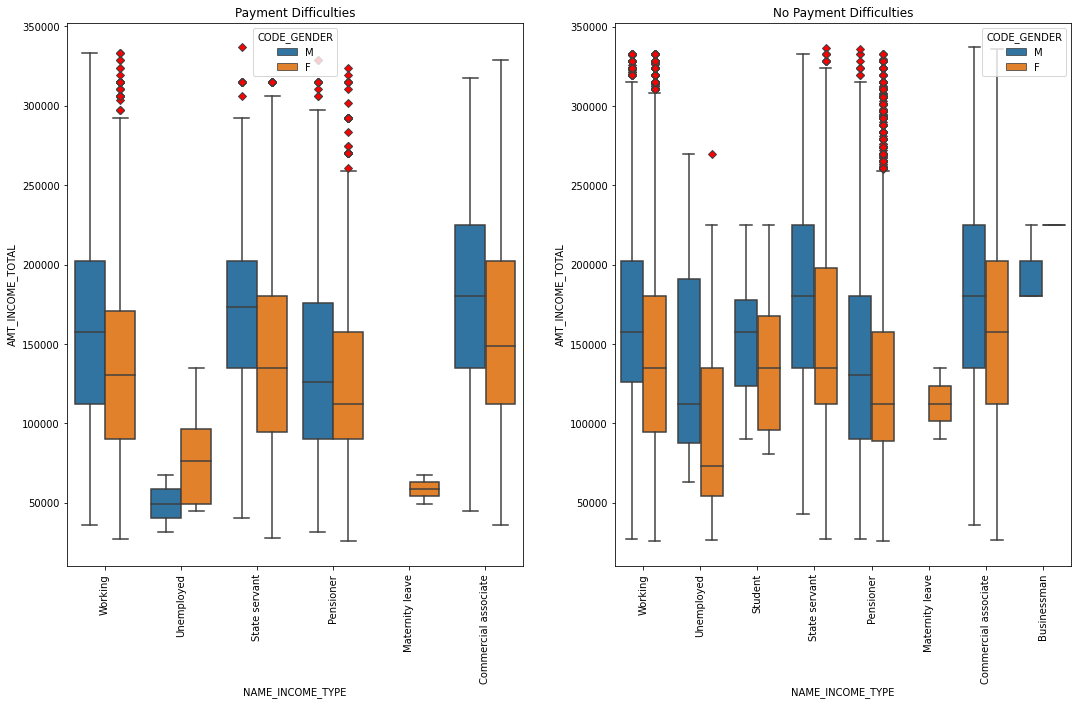

In [343]:
# creating a boxplot for the NAME_INCOME_TYPE, AMT_ICOME_TOTAL with CODE_GENDER for both payment difficulty and no difficulty

plt.figure(figsize = [18,10])

plt.subplot(1,2,1)
plt.title('Payment Difficulties')
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x = inp0_1.NAME_INCOME_TYPE,
            y = inp0_1[inp0_1['AMT_INCOME_TOTAL'] < max_value1_AMT_INCOME_TOTAL]['AMT_INCOME_TOTAL'],
            data = inp0_1,
            flierprops = red_diamond,
            order = sorted(inp0_1['NAME_INCOME_TYPE'].unique(), reverse = True),
            hue = inp0_1.CODE_GENDER, hue_order = sorted(inp0_1['CODE_GENDER'].unique(), reverse = True))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('No Payment Difficulties')
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x = inp0_0.NAME_INCOME_TYPE,
            y = inp0_0[inp0_0['AMT_INCOME_TOTAL'] < max_value0_AMT_INCOME_TOTAL]['AMT_INCOME_TOTAL'],
            data = inp0_0,
            flierprops = red_diamond,
            order = sorted(inp0_0['NAME_INCOME_TYPE'].unique(), reverse = True),
            hue = inp0_0.CODE_GENDER, hue_order = sorted(inp0_0['CODE_GENDER'].unique(), reverse = True))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

In [344]:

# Observations

# Clients who are Unemployed and Male have a very high income in On-Time Payments than Payment difficulties
# Clients who are Student and either Male OR Female do their payments On-Time. They are completely missing from Payment difficulties category. Student seems to be an attractive category to give loans to.
# Clients who are Businessman and either Male OR Female do their payments On-Time. They are completely missing from Payment difficulties category. Businessman seems to be an attractive category to give loans to.
# Clients who are in Maternity Leave and Female have a very high income in On-Time Payments than Payment difficulties

Analysis of OCCUPATION_TYPE V/S AMT_INCOME_TOTAL V/S CODE_GENDER

In [345]:
# Outlier identification of AMT_INCOME_TOTAL with Payment difficulties

max_value1_DAYS_EMPLOYED = outlier_range(inp0_1,'DAYS_EMPLOYED')
print(f'max_value1_DAYS_EMPLOYED: {max_value1_DAYS_EMPLOYED}')

# Outlier identification of AMT_INCOME_TOTAL with No Payment difficulties

max_value0_DAYS_EMPLOYED = outlier_range(inp0_0,'DAYS_EMPLOYED')
print(f'max_value0_DAYS_EMPLOYED: {max_value0_DAYS_EMPLOYED}')

max_value1_DAYS_EMPLOYED: 18.5
max_value0_DAYS_EMPLOYED: 37.0


In [346]:
inp0_1.groupby(by = ['OCCUPATION_TYPE','CODE_GENDER']).AMT_INCOME_TOTAL.describe().head()

count           mean           std      min  \
OCCUPATION_TYPE CODE_GENDER                                                
Accountants     F            457.0  174840.636761  79021.040323  54000.0   
                M             17.0  202367.647059  98623.658009  81000.0   
Cleaning staff  F            410.0  128907.987805  70328.229454  31500.0   
                M             37.0  119493.243243  45786.206320  45000.0   
Cooking staff   F            555.0  129298.378378  55531.877347  32400.0   

                                  25%       50%       75%       max  
OCCUPATION_TYPE CODE_GENDER                                          
Accountants     F            112500.0  157500.0  202500.0  540000.0  
                M            121500.0  180000.0  252000.0  438750.0  
Cleaning staff  F             90000.0  112500.0  157500.0  720000.0  
                M             90000.0  112500.0  135000.0  247500.0  
Cooking staff   F             90000.0  112500.0  157500.0  405000.0

In [347]:
inp0_0.groupby(by = ['OCCUPATION_TYPE','CODE_GENDER']).AMT_INCOME_TOTAL.describe().head()

count           mean            std      min  \
OCCUPATION_TYPE CODE_GENDER                                                  
Accountants     F            9072.0  194324.507937  109135.608131  27000.0   
                M             267.0  236490.893258  131795.325488  54000.0   
Cleaning staff  F            3904.0  130602.052254   63495.045291  25650.0   
                M             302.0  137172.516556   64373.090447  31500.0   
Cooking staff   F            4830.0  134460.402922   60213.558132  27000.0   

                                  25%       50%       75%        max  
OCCUPATION_TYPE CODE_GENDER                                           
Accountants     F            130500.0  175500.0  225000.0  2214117.0  
                M            141750.0  216000.0  270000.0  1035000.0  
Cleaning staff  F             90000.0  112500.0  157500.0  1080000.0  
                M             90000.0  132750.0  169875.0   450000.0  
Cooking staff   F             90000.0  121500.0  157500.0   540000.0

In [348]:
# creating a boxplot for the OCCUPATIONAL_TYPE, AMT_ICOME_TOTAL with CODE_GENDER for both payment difficulty and no difficulty

plt.figure(figsize = [18,10])

plt.subplot(1,2,1)
plt.title('Payment Difficulties')
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x = inp0_1.OCCUPATION_TYPE,
            y = inp0_1[inp0_1['AMT_INCOME_TOTAL'] < max_value1_AMT_INCOME_TOTAL]['AMT_INCOME_TOTAL'],
            data = inp0_1,
            flierprops = red_diamond,
            order = sorted(inp0_1['OCCUPATION_TYPE'].unique(), reverse = True),
            hue = inp0_1.CODE_GENDER, hue_order = sorted(inp0_1['CODE_GENDER'].unique(), reverse = True))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('No Payment Difficulties')
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x = inp0_0.OCCUPATION_TYPE,
            y = inp0_0[inp0_0['AMT_INCOME_TOTAL'] < max_value0_AMT_INCOME_TOTAL]['AMT_INCOME_TOTAL'],   
            data = inp0_0,
            flierprops = red_diamond,
            order = sorted(inp0_0['OCCUPATION_TYPE'].unique(), reverse = True),
            hue = inp0_0.CODE_GENDER, hue_order = sorted(inp0_0['CODE_GENDER'].unique(), reverse = True))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()


In [349]:
# Observations

# Clients who are Waiters/barment staff and female have less median income in On-Time Payments than Payment difficulties
# Clients who are Cleaning staff and female have more median income in On-Time Payments than Payment difficulties
# Clients who are HR Staff and Male have more median income in Payment difficulties than On-Time Payments
# Clients who are Managers and Male have more median income in On-Time Payments than Payment difficulties

Categorical V/S Categorical variables

In [350]:
# Analysis of NAME_INCOME_TYPE V/S CODE_GENDER

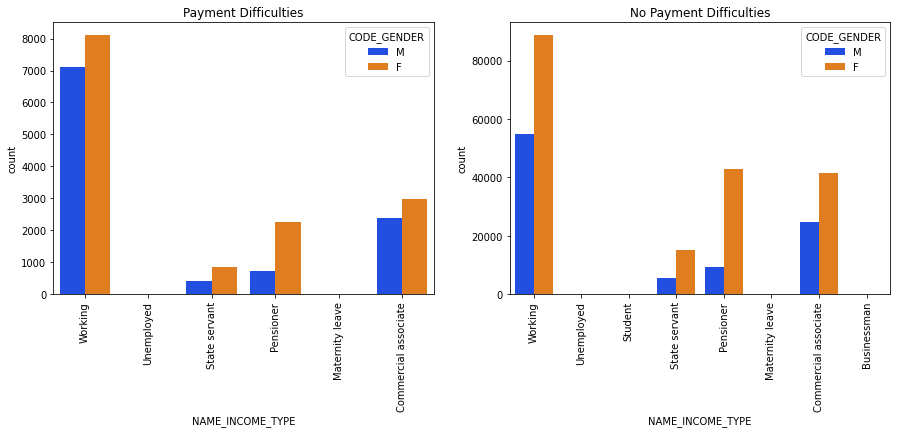

In [351]:
# Create a countplot for the categorical variables NAME_INCOME_TYPE and CODE_GENDER

plt.figure(figsize = [15,5])
palt = sns.color_palette("bright")
plt.subplot(1,2,1)
plt.title('Payment Difficulties')
sns.countplot(x = inp0_1.NAME_INCOME_TYPE,
                data = inp0_1,
                order = sorted(inp0_1['NAME_INCOME_TYPE'].unique(), reverse = True),
                palette = palt,
                hue = inp0_1.CODE_GENDER, hue_order = sorted(inp0_1['CODE_GENDER'].unique(), reverse = True))
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('No Payment Difficulties')
sns.countplot(x = inp0_0.NAME_INCOME_TYPE,
                data = inp0_0,
                order = sorted(inp0_0['NAME_INCOME_TYPE'].unique(), reverse = True),
                palette = palt,
                hue = inp0_0.CODE_GENDER, hue_order = sorted(inp0_0['CODE_GENDER'].unique(), reverse = True))
plt.xticks(rotation=90)
plt.show()


In [352]:
# Observations

# Clients who are Working and Male have more Payment difficulties compared to On-Time Payments
# Clients who are Pensioner and Female have more Payment difficulties compared to On-Time Payments
# Clients who are Businessman and Students do their payments On-Time though their record count is low

In [353]:
# Analysis of NAME_EDUCATION_TYPE V/S CODE_GENDER
# Create a countplot for the categorical variables NAME_EDUCTION_TYPE and CODE_GENDER

plt.figure(figsize = [15,5])
palt = sns.color_palette("bright")
plt.subplot(1,2,1)
plt.title('Payment Difficulties')
sns.countplot(x = inp0_1.NAME_EDUCATION_TYPE,
                data = inp0_1,
                order = sorted(inp0_1['NAME_EDUCATION_TYPE'].unique(), reverse = True),
                palette = palt,
                hue = inp0_1.CODE_GENDER, hue_order = sorted(inp0_1['CODE_GENDER'].unique(), reverse = True))
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('No Payment Difficulties')
sns.countplot(x = inp0_0.NAME_EDUCATION_TYPE,
                data = inp0_0,
                order = sorted(inp0_0['NAME_EDUCATION_TYPE'].unique(), reverse = True),
                palette = palt,
                hue = inp0_0.CODE_GENDER, hue_order = sorted(inp0_0['CODE_GENDER'].unique(), reverse = True))
plt.xticks(rotation=90)
plt.show()

In [354]:
# Observations

# Clients who have Secondary/Secondary special education and Male have more Payment difficulties compared to On-Time Payments
# Clients who have Higher education and Female have more On-Time Payments compared to Payment difficulties

In [355]:
# Analysis of NAME_FAMILY_STATUS V/S OCCUPATION_TYPE
# Create a countplot for the categorical variables NAME_FAMILY_STATUS and OCCUPATION_TYPE

plt.figure(figsize = [20,10])
palt = sns.color_palette("bright")
plt.subplot(1,2,1)
plt.title('Payment Difficulties')
sns.countplot(x = inp0_1.OCCUPATION_TYPE,
                data = inp0_1,
                order = sorted(inp0_1['OCCUPATION_TYPE'].unique(), reverse = True),
                palette = palt,
                hue = inp0_1.NAME_FAMILY_STATUS, hue_order = sorted(inp0_1['NAME_FAMILY_STATUS'].unique(), reverse = True))
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('No Payment Difficulties')
sns.countplot(x = inp0_0.OCCUPATION_TYPE,
                data = inp0_0,
                order = sorted(inp0_0['OCCUPATION_TYPE'].unique(), reverse = True),
                palette = palt,
                hue = inp0_0.NAME_FAMILY_STATUS, hue_order = sorted(inp0_0['NAME_FAMILY_STATUS'].unique(), reverse = True))
plt.xticks(rotation=90)
plt.show()


In [356]:
# Observations

# Clients who are Single/not married, Married & Civil marriage and are Waiters/barmen staff have more Payment difficulties compared to On-Time Payments
# Clients who are Single/not married & Married and are Laborers have more Payment difficulties compared to On-Time Payments
# Clients who are Married and are Drivers have more Payment difficulties compared to On-Time Payments
# Married and Accountants have better On-Time Payments

In [357]:
# Analysis of ORGANIZATION_TYPE V/S FLAG_OWN_CAR

# Create a countplot for the categorical variables ORGANIZATION_TYPE and FLAG_OWN_CAR

plt.figure(figsize = [20,10])
palt = sns.color_palette("bright")
plt.subplot(1,2,1)
plt.title('Payment Difficulties')
sns.countplot(x = inp0_1.ORGANIZATION_TYPE,
                data = inp0_1,
                order = sorted(inp0_1['ORGANIZATION_TYPE'].unique(), reverse = True),
                palette = palt,
                hue = inp0_1.FLAG_OWN_CAR, hue_order = sorted(inp0_1['FLAG_OWN_CAR'].unique(), reverse = True))
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('No Payment Difficulties')
sns.countplot(x = inp0_0.ORGANIZATION_TYPE,
                data = inp0_0,
                order = sorted(inp0_0['ORGANIZATION_TYPE'].unique(), reverse = True),
                palette = palt,
                hue = inp0_0.FLAG_OWN_CAR, hue_order = sorted(inp0_0['FLAG_OWN_CAR'].unique(), reverse = True))
plt.xticks(rotation=90)
plt.show()

In [358]:

# Observations

# Clients who are Self-employedand don't own Car have more Payment difficulties compared to On-Time Payments

In [359]:
# Analysis of OCCUPATION_TYPE V/S NAME_CONTRACT_TYPE

# Create a countplot for the categorical variables OCCUPATION_TYPE and NAME_CONTRACT_TYPE

plt.figure(figsize = [15,8])
palt = sns.color_palette("bright")
plt.subplot(1,2,1)
plt.title('Payment Difficulties')
sns.countplot(x = inp0_1.OCCUPATION_TYPE,
                data = inp0_1,
                order = sorted(inp0_1['OCCUPATION_TYPE'].unique(), reverse = True),
                palette = palt,
                hue = inp0_1.NAME_CONTRACT_TYPE, hue_order = sorted(inp0_1['NAME_CONTRACT_TYPE'].unique(), reverse = True))
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('No Payment Difficulties')
sns.countplot(x = inp0_0.OCCUPATION_TYPE,
                data = inp0_0,
                order = sorted(inp0_0['OCCUPATION_TYPE'].unique(), reverse = True),
                palette = palt,
                hue = inp0_0.NAME_CONTRACT_TYPE, hue_order = sorted(inp0_0['NAME_CONTRACT_TYPE'].unique(), reverse = True))
plt.xticks(rotation=90)
plt.show()

In [360]:
# Observations

# Clients who are Sales staff,Laborers,Drivers and have Cash loans have more Payment difficulties compared to On-Time Payments

# PREVIIOUS APPLICATION DATA

In [361]:
# Import the Warnings
import warnings
warnings.filterwarnings('ignore')

In [362]:
# Importing the Usefull libraries.
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [363]:
df_prev = pd.read_csv(r"D:\Courses\IIIT Banglore DS\Credit EDA Case Study\previous_application.csv")
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [364]:
# shape of the data frame
df_prev.shape

(1670214, 37)

In [365]:
# count of missing values from each column in the dataframe
df_prev.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [366]:
#precentage of missing values from the columns
(df_prev.isnull().sum()/len(df_prev)*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

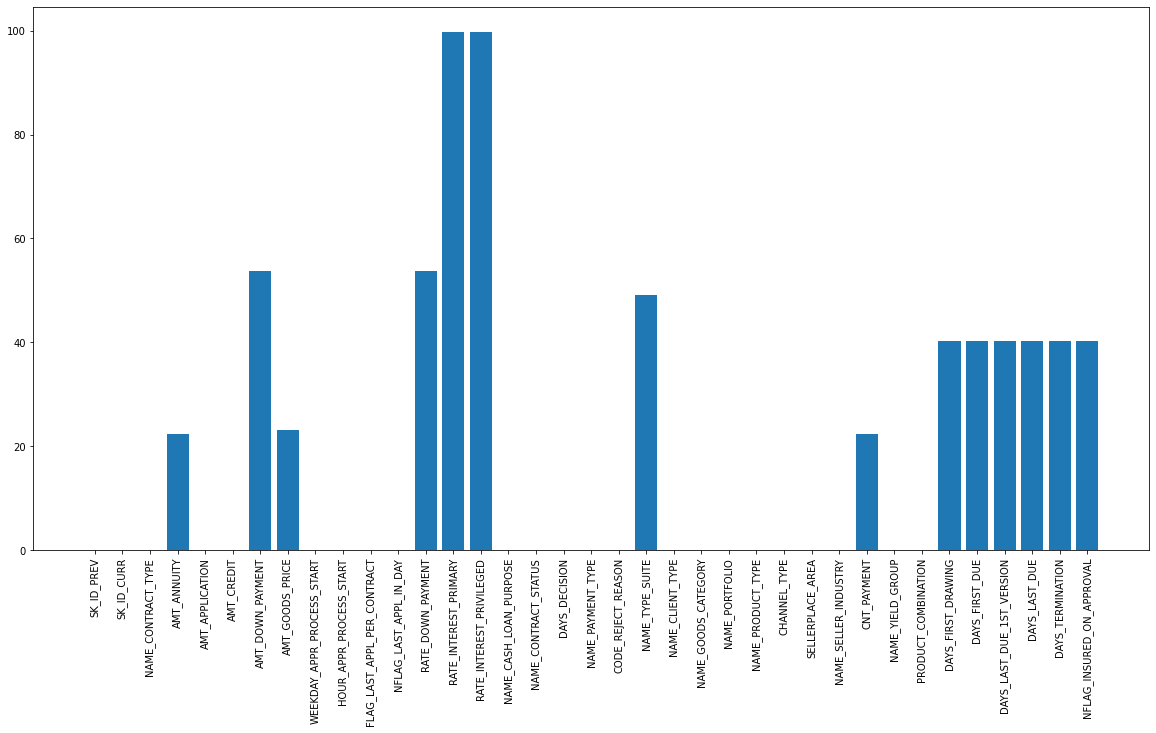

In [367]:
# plot a bar graph for the null value percentage in the data frame
plt.figure(figsize=(20,10))
plt.bar(df_prev.columns,100*df_prev.isnull().sum()/len(df_prev))
plt.xticks(rotation=90)
plt.show()


In [368]:
# list of columns having null value percentage more than 30percentage
null_columns = df_prev.columns[df_prev.isnull().sum()/len(df_prev) > 0.35]

In [369]:
# print count of null_columns
print(len(null_columns))
null_columns

11


Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

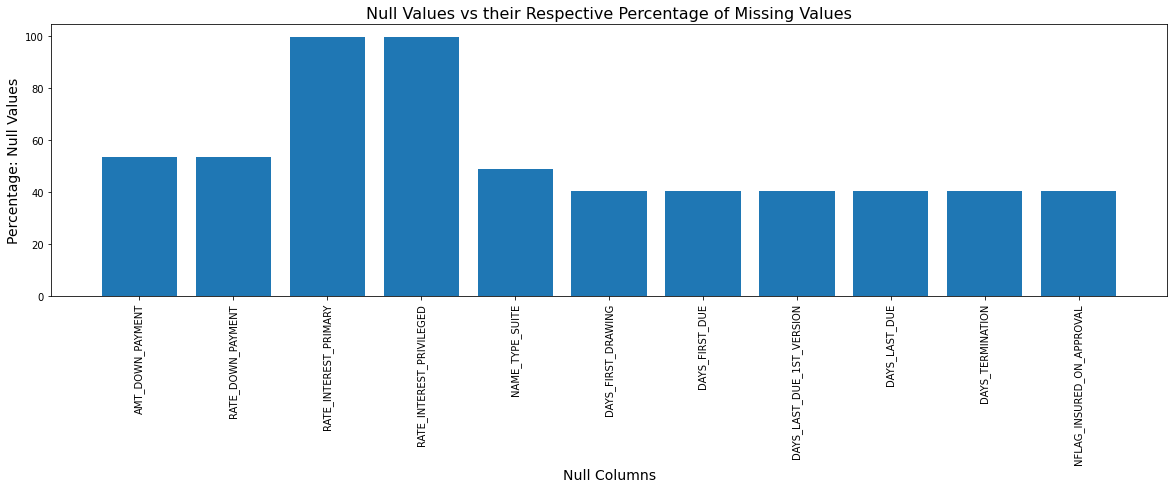

In [370]:
# plot a bar graph for the null value percentage in the data frame
plt.figure(figsize=(20,5))
plt.bar(null_columns,100*df_prev[null_columns].isnull().sum()/len(df_prev))
plt.title("Null Values vs their Respective Percentage of Missing Values", fontdict={'fontsize':16})
plt.xticks(rotation=90)
plt.xlabel("Null Columns",fontdict={"fontsize":14,"fontweight":6})                  
plt.ylabel("Percentage: Null Values",fontdict={"fontsize":14,"fontweight":6})
plt.show()


In [371]:
df_prev.drop(columns = null_columns, inplace = True)

In [372]:
# Checking the shape of the dataset
df_prev.shape

(1670214, 26)

In [373]:
# percentage for null values

round(df_prev.isnull().sum()[df_prev.isnull().sum()/len(df_prev) < 0.4]/len(df_prev)*100, 2).sort_values(ascending=False)

AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
NAME_PAYMENT_TYPE               0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
NAME_CONTRACT_TYPE              0.00
DAYS_DECISION                   0.00
dtype: float64

In [374]:
# Analysis of AMT_GOODS_PRICE
# with a null value percentage of 23.08%

df_prev.AMT_GOODS_PRICE.value_counts().head()

45000.0     47831
225000.0    43549
135000.0    40666
450000.0    38926
90000.0     29367
Name: AMT_GOODS_PRICE, dtype: int64

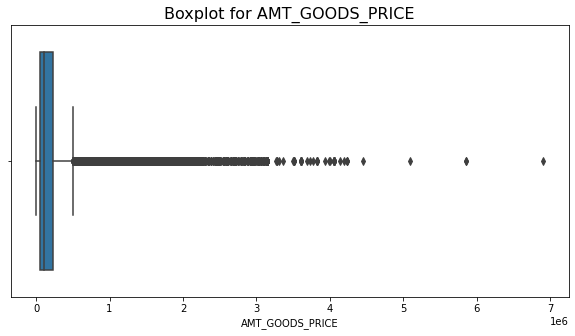

In [375]:
# plotting a boxplot for the AMT_GOODS_PRICE to check for outliers

plt.figure(figsize=(10,5))
sns.boxplot(x=df_prev.AMT_GOODS_PRICE)
plt.title("Boxplot for AMT_GOODS_PRICE", fontdict={'fontsize':16})
plt.show()


In [376]:
# Finding the quantile values of the goods
df_prev.AMT_GOODS_PRICE.quantile([0.25,0.5,0.75,1])

0.25      50841.0
0.50     112320.0
0.75     234000.0
1.00    6905160.0
Name: AMT_GOODS_PRICE, dtype: float64

In [377]:
#Checking for the mode,median and mean of the goods price for further analysis

print("Mode of the AMT_GOODS_PRICE is: ", df_prev.AMT_GOODS_PRICE.mode()[0])
print("Mean of the AMT_GOODS_PRICE is: ", round(df_prev.AMT_GOODS_PRICE.mean(),2))
print("Median of the AMT_GOODS_PRICE is: ", df_prev.AMT_GOODS_PRICE.median())

Mode of the AMT_GOODS_PRICE is:  45000.0
Mean of the AMT_GOODS_PRICE is:  227847.28
Median of the AMT_GOODS_PRICE is:  112320.0


In [378]:
# Observations,
# 1. The mean and median are almost same.
# 2. The mode is 450000.0
# 3. The quantile values are 238500.0, 450000.0, 679500.0, 4050000.0
# Percentage of NUll_Values is high, so we not imputing with the mode of mean of the data

In [379]:
# Analysis of AMT_Annuity with a null percentage of values = 22.29%

df_prev.AMT_ANNUITY.value_counts().head()

2250.0     31865
11250.0    13974
6750.0     13442
9000.0     12496
22500.0    11903
Name: AMT_ANNUITY, dtype: int64

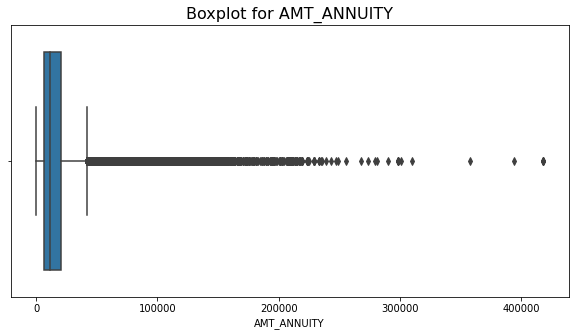

In [380]:
# plotting a boxplot for the AMT_ANNUITY to check for outliers

plt.figure(figsize=(10,5))
sns.boxplot(x=df_prev.AMT_ANNUITY)
plt.title("Boxplot for AMT_ANNUITY", fontdict={'fontsize':16})
plt.show()


In [381]:
# Checking the quantile values for the Annuity

df_prev.AMT_ANNUITY.quantile([0.25,0.5,0.75,1])

0.25      6321.780
0.50     11250.000
0.75     20658.420
1.00    418058.145
Name: AMT_ANNUITY, dtype: float64

In [382]:
# Finding the mean, median and mode of the Annuity amount to see what can be done

print("Mode of the AMT_ANNUITY is: ", df_prev.AMT_ANNUITY.mode()[0])
print("Mean of the AMT_ANNUITY is: ", round(df_prev.AMT_ANNUITY.mean(),2))
print("Median of the AMT_ANNUITY is: ", df_prev.AMT_ANNUITY.median())

Mode of the AMT_ANNUITY is:  2250.0
Mean of the AMT_ANNUITY is:  15955.12
Median of the AMT_ANNUITY is:  11250.0


In [383]:
# Observations
# 1. The mean and median are almost same.
# 2. The mode is 9000.0
# 3. The quantile values are 9251.775, 16524.0, 24903.0, 258025.5
# Percentage of NUll_Values is high, so we not imputing with the mode of mean of the data


In [384]:
# Analysis of CNT_PAYMENT with the percentage of null values 22.29%

df_prev.CNT_PAYMENT.value_counts().head()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
Name: CNT_PAYMENT, dtype: int64

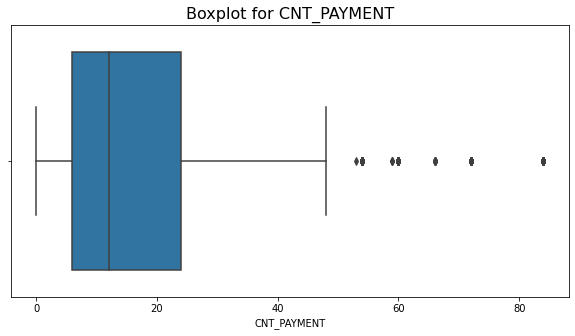

In [385]:
# Plotting the box plot for further analysis

plt.figure(figsize=(10,5))
sns.boxplot(x=df_prev.CNT_PAYMENT)
plt.title("Boxplot for CNT_PAYMENT", fontdict={'fontsize':16})
plt.show()

In [386]:
# finding the quantiles for the credit payment

df_prev.CNT_PAYMENT.quantile([0.25,0.5,0.75,1])

0.25     6.0
0.50    12.0
0.75    24.0
1.00    84.0
Name: CNT_PAYMENT, dtype: float64

In [387]:
# finding the mean and mode of the cnt_payment

print("Mode of the CNT_PAYMENT is: ", df_prev.CNT_PAYMENT.mode()[0])
print("Mean of the CNT_PAYMENT is: ", round(df_prev.CNT_PAYMENT.mean(),2))

Mode of the CNT_PAYMENT is:  12.0
Mean of the CNT_PAYMENT is:  16.05


In [388]:
# observations

# 1. The mean and median are almost same.
# 2. The mode is 12.0
# 3. The quantile values are 12.0, 24.0, 48.0, 84.0
# Percentage of NUll_Values is high, so we not imputing with the mode of mean of the data

In [389]:
# Handling missing values wwhos percentage is less than 1%

round(df_prev.isnull().sum()/df_prev.shape[0]*100, 2).sort_values(ascending = False)

AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
NAME_PAYMENT_TYPE               0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
NAME_CONTRACT_TYPE              0.00
DAYS_DECISION                   0.00
dtype: float64

In [390]:
#PRODUCT_COMBINATION
df_prev.PRODUCT_COMBINATION.value_counts()     

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

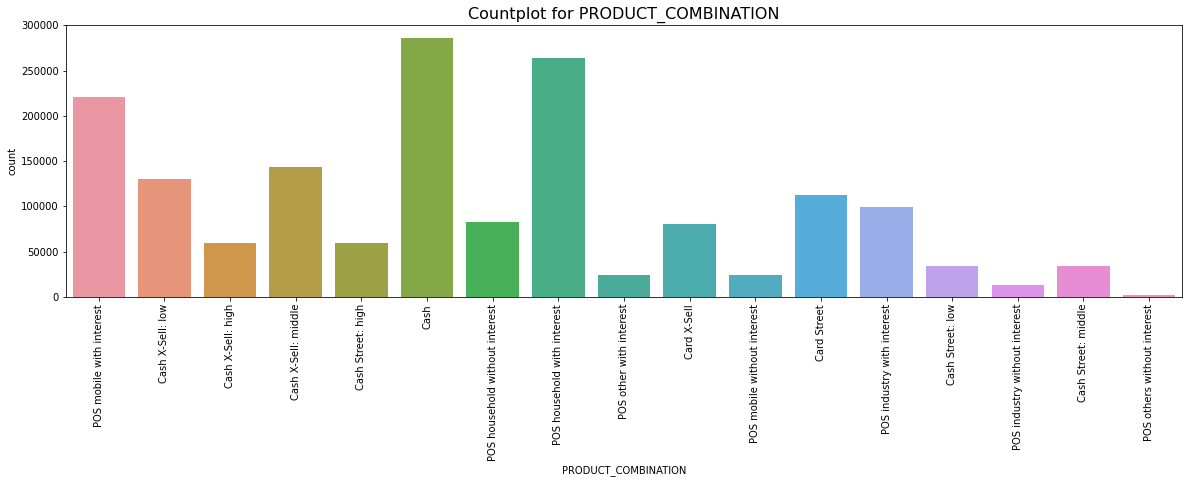

In [391]:
# Plotting the graph to understand the distribution of the PRODUCT_COMBINATION

plt.figure(figsize=(20,5))
sns.countplot(x=df_prev.PRODUCT_COMBINATION)
plt.title("Countplot for PRODUCT_COMBINATION", fontdict={'fontsize':16})
plt.xticks(rotation=90)
plt.show()

In [392]:
# observaions
# 1. The most common product combination is cash
# 2. The least common product combination is POS industry with interest
# 3. We can impute the missing values with cash

# imputing the missing values with cash
df_prev.PRODUCT_COMBINATION.fillna("Cash", inplace = True)

In [393]:
# Dealing with incorrect values

# Checking the unique values of the column
df_prev.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [394]:
df_prev['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

In [395]:
# We observe here is XAP/XNA, we do not have any understanding to this. the value is considered to be missing
# combiining the percentagee of XNA/XAP compute 95%
# we can drop the column as this wont make any understanding to it

df_prev.drop(columns = ['NAME_CASH_LOAN_PURPOSE'], inplace = True)

In [396]:
# Days_Decision have negative values
# we can convert it to positive values

df_prev.DAYS_DECISION = df_prev.DAYS_DECISION.abs()

In [397]:
df_prev.DAYS_DECISION.describe()

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

In [398]:
# Looking at the data we find NAME_PAYMENT_TYPE has XNA Values

df_prev.NAME_PAYMENT_TYPE.value_counts(normalize=True)

Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: NAME_PAYMENT_TYPE, dtype: float64

In [399]:
# XNA As discussed earlier provides no information and computes ~38% 
# we can drop the column

df_prev.drop(columns = ['NAME_PAYMENT_TYPE'], inplace = True)

In [400]:
# understanding CODE_REJECT_REASON column

df_prev.CODE_REJECT_REASON.value_counts(normalize=True)

XAP       0.810132
HC        0.104915
LIMIT     0.033337
SCO       0.022432
CLIENT    0.015828
SCOFR     0.007670
XNA       0.003140
VERIF     0.002116
SYSTEM    0.000429
Name: CODE_REJECT_REASON, dtype: float64

In [401]:
# XAP computes to 81% of the data
# we can drop the column

df_prev.drop(columns = ['CODE_REJECT_REASON'], inplace = True)

In [402]:
# understanding NAME_CLIENT_TYPE column

df_prev.NAME_CLIENT_TYPE.value_counts(normalize=True)

Repeater     0.737188
New          0.180434
Refreshed    0.081217
XNA          0.001162
Name: NAME_CLIENT_TYPE, dtype: float64

In [403]:
# Lets look at the data with the NAME_CLIENT_TYPE == XNA

df_prev[df_prev.NAME_CLIENT_TYPE == 'XNA'].head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
694      1044207      241230         Cash loans          NaN              0.0   
3419     1167657      366138         Cash loans    55400.895        1354500.0   
3594     2609511      334664     Consumer loans     2223.990          20659.5   
5819     2092311      281867         Cash loans          NaN              0.0   
5990     2680830      335491         Cash loans    32048.460         877500.0   

      AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
694          0.0              NaN                     SUNDAY   
3419   1451047.5        1354500.0                     MONDAY   
3594     23112.0          20659.5                     MONDAY   
5819         0.0              NaN                     MONDAY   
5990   1016496.0         877500.0                     MONDAY   

      HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  \
694                        12                           Y  ...   
3419                       17                           Y  ...   
3594                       11                           Y  ...   
5819                       13                           Y  ...   
5990                        9                           Y  ...   

      NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
694                XNA                 XNA             XNA               XNA   
3419               XNA                 XNA            Cash            x-sell   
3594               XNA           Computers             POS               XNA   
5819               XNA                 XNA             XNA               XNA   
5990               XNA                 XNA            Cash           walk-in   

                 CHANNEL_TYPE SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  \
694   Credit and cash offices               -1                   XNA   
3419  Credit and cash offices               -1                   XNA   
3594             Country-wide               50  Consumer electronics   
5819  Credit and cash offices               -1                   XNA   
5990  Credit and cash offices               -1                   XNA   

     CNT_PAYMENT  NAME_YIELD_GROUP             PRODUCT_COMBINATION  
694          NaN               XNA                            Cash  
3419        36.0        low_normal                Cash X-Sell: low  
3594        12.0        low_action  POS household without interest  
5819         NaN               XNA                            Cash  
5990        48.0        low_normal                Cash Street: low  

[5 rows x 23 columns]

In [404]:
# Observations
# 1. The NAME_CLIENT_TYPE == XNA has the same values for the NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_PRODUCT_TYPE, NAME_SELLER_INDUSTRY, NAME_YIELD_GROUP
# 2. The rest of the values look fine
# 3. We can impute the missing values with the mode of the column

# imputing the XNA values with the mode of the column i.e Repeater

df_prev.NAME_CLIENT_TYPE.replace('XNA', df_prev.NAME_CLIENT_TYPE.mode()[0], inplace = True) 

In [405]:
# Checking NAME_CLIENT_TYPE column

df_prev.NAME_CLIENT_TYPE.value_counts(normalize=True)

Repeater     0.738350
New          0.180434
Refreshed    0.081217
Name: NAME_CLIENT_TYPE, dtype: float64

In [406]:
df_prev.shape

(1670214, 23)

In [407]:
df_prev.select_dtypes("float")

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0           1730.430          17145.0     17145.0          17145.0   
1          25188.615         607500.0    679671.0         607500.0   
2          15060.735         112500.0    136444.5         112500.0   
3          47041.335         450000.0    470790.0         450000.0   
4          31924.395         337500.0    404055.0         337500.0   
...              ...              ...         ...              ...   
1670209    14704.290         267295.5    311400.0         267295.5   
1670210     6622.020          87750.0     64291.5          87750.0   
1670211    11520.855         105237.0    102523.5         105237.0   
1670212    18821.520         180000.0    191880.0         180000.0   
1670213    16431.300         360000.0    360000.0         360000.0   

         CNT_PAYMENT  
0               12.0  
1               36.0  
2               12.0  
3               12.0  
4               24.0  
...              ...  
1670209         30.0  
1670210         12.0  
1670211         10.0  
1670212         12.0  
1670213         48.0  

[1670214 rows x 5 columns]

In [408]:
# NUMERIC VALUES

#  AMT_ANNUITY - Amount to be paid at regular intervals by the applicant to the bank.
#  AMT_APPLICATION - Amount of the loan application
#  AMT_CREDIT - Credit amount of the loan
#  AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given


In [409]:
# Dealing with the Outliers in the Numerical Values
# AMT_ANNUITY

In [410]:
# Printing min and max range of the annuity paid by the applicant
print(df_prev.AMT_ANNUITY.min())
print(df_prev.AMT_ANNUITY.max())

0.0
418058.145


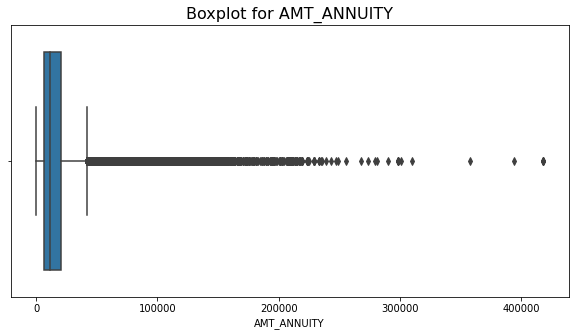

In [411]:
# Plotting the boxplot to understand the distribution of the data

plt.figure(figsize=(10,5))
sns.boxplot(x=df_prev.AMT_ANNUITY)
plt.title("Boxplot for AMT_ANNUITY", fontdict={'fontsize':16})
plt.show()

In [412]:
# Calculating the quantile values for the ANNUITY

df_prev.AMT_ANNUITY.quantile([0.25,0.5,0.75,1])

0.25      6321.780
0.50     11250.000
0.75     20658.420
1.00    418058.145
Name: AMT_ANNUITY, dtype: float64

In [413]:
# Calculating inter quantile range

Q1 = df_prev.AMT_ANNUITY.quantile(0.25)
Q3 = df_prev.AMT_ANNUITY.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

14336.64


In [414]:
# Values before the min values and max qunatile values are called outliers

Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value}")
print(f"Max value after which outlier exist: {Max_value}")

Min value before which outlier exist: -15183.18
Max value after which outlier exist: 42163.38


In [415]:
# observation
# 1. The value above which the outlliers exist is `42163.38`

In [416]:
# Dealing with AMT_APPLICATION values
df_prev.AMT_APPLICATION.describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

In [417]:
#Boxplot to under the value distribution

plt.figure(figsize=(10,5))
sns.boxplot(x=df_prev.AMT_APPLICATION)
plt.title("Boxplot for AMT_APPLICATION", fontdict={'fontsize':16})
plt.show()


In [418]:
# checking for quantile vallues of the application

df_prev.AMT_APPLICATION.quantile([0.25,0.5,0.75,1])

0.25      18720.0
0.50      71046.0
0.75     180360.0
1.00    6905160.0
Name: AMT_APPLICATION, dtype: float64

In [419]:
# calculating the inter quartile range for the data

Q1 = df_prev.AMT_APPLICATION.quantile(0.25)
Q3 = df_prev.AMT_APPLICATION.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

161640.0


In [420]:
# Values before the min values and max qunatile values are called outliers

Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value}")
print(f"Max value after which outlier exist: {Max_value}")


Min value before which outlier exist: -223740.0
Max value after which outlier exist: 422820.0


In [421]:
# observation
# 1. Max value after which outlier exist: `422820.0`

In [422]:
# Dealing with AMYT_CREDIT

df_prev.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [423]:
# observation
# 1. The min value is 0.0 which is not possible
# 2. The max value is 6905160.0 which is possible

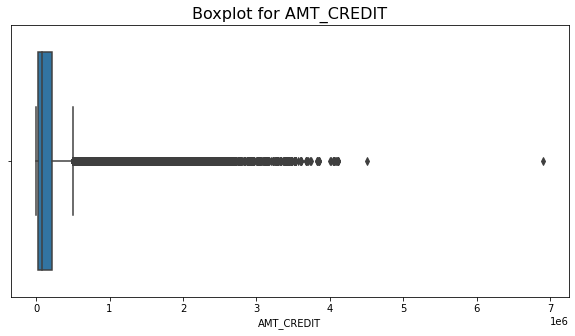

In [424]:
# Box plot to understand the outliers of AMT_CREDIT

plt.figure(figsize=(10,5))
sns.boxplot(x=df_prev.AMT_CREDIT)
plt.title("Boxplot for AMT_CREDIT", fontdict={'fontsize':16})
plt.show()


In [425]:
# quantile values of AMT_CREDIT

df_prev.AMT_CREDIT.quantile([0.25,0.5,0.75,1])

0.25      24160.5
0.50      80541.0
0.75     216418.5
1.00    6905160.0
Name: AMT_CREDIT, dtype: float64

In [426]:
# Inter quartile range oof the value

Q1 = df_prev.AMT_CREDIT.quantile(0.25)
Q3 = df_prev.AMT_CREDIT.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

192258.0


In [427]:
# Values before the min values and max qunatile values are called outliers

Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value}")
print(f"Max value after which outlier exist: {Max_value}")

Min value before which outlier exist: -264226.5
Max value after which outlier exist: 504805.5


In [428]:
# observations
# 1. Max value after which outlier exist: 504805.5

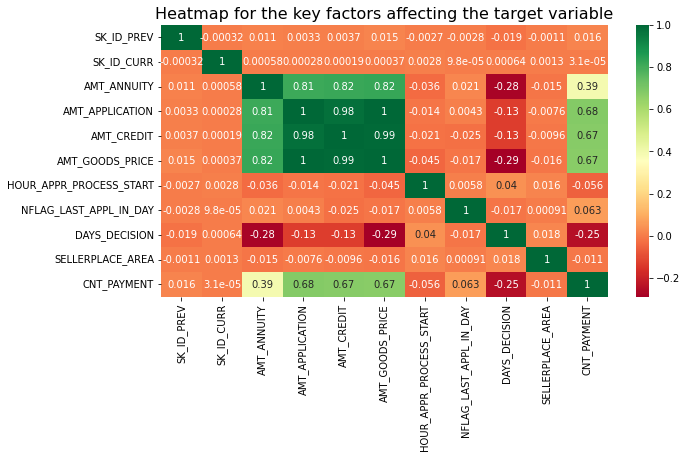

In [522]:
# make a heat map for the key factors affecting the target varibale

plt.figure(figsize=(10,5))
sns.heatmap(df_prev.corr(), annot=True, cmap = 'RdYlGn')
plt.title("Heatmap for the key factors affecting the target variable", fontdict={'fontsize':16})
plt.show()

## Merge datasets inp0 and df_prev into df_merge

In [429]:
df_merge = inp0.merge(df_prev, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')


In [430]:
# Shape of both the inp0 dataset, and df_prev

print(inp0.shape)
print(df_prev.shape)
print(df_merge.shape)

(307511, 76)
(1670214, 23)
(1413701, 98)


In [431]:
# Check structure of the data
df_merge.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 98 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  int64   
 1   TARGET                        1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object  
 3   CODE_GENDER                   1413701 non-null  object  
 4   FLAG_OWN_CAR                  1413701 non-null  object  
 5   FLAG_OWN_REALTY               1413701 non-null  object  
 6   CNT_CHILDREN                  1413701 non-null  int64   
 7   AMT_INCOME_TOTAL              1413701 non-null  float64 
 8   AMT_CREDIT_x                  1413701 non-null  float64 
 9   AMT_ANNUITY_x                 1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x             1413701 non-null  float64 
 11  NAME_TYPE_SUITE               1413701 non-null  object  
 12  NAME_INCOME_TY

In [432]:
df_merge[df_merge['SK_ID_CURR'] == 265681][['AMT_CREDIT_x','AMT_CREDIT_y']].head()

AMT_CREDIT_x  AMT_CREDIT_y
654385      278460.0      109552.5
654386      278460.0       22234.5
654387      278460.0      225000.0
654388      278460.0      118989.0
654389      278460.0      337824.0

In [433]:
inp0[inp0['SK_ID_CURR'] == 265681][['AMT_CREDIT']].head()


AMT_CREDIT
142895    278460.0

In [434]:
# Get statistical summary for numerical variables

In [435]:
# Describe the merged data
df_merge.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+05   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.413701e+06   1.413608e+06       1.413701e+06   
mean   5.875537e+05   2.701702e+04       5.276522e+05   
std    3.849173e+05   1.395116e+04       3.531028e+05   
min    4.500000e+04   1.615500e+03       4.050000e+04   
25%    2.700000e+05   1.682100e+04       2.385000e+05   
50%    5.084955e+05   2.492550e+04       4.500000e+05   
75%    8.079840e+05   3.454200e+04       6.795000e+05   
max    4.050000e+06   2.250000e+05       4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count                1.413701e+06  1.413701e+06   1.413701e+06  ...   
mean                 2.074985e-02  4.421384e+01   1.985500e+02  ...   
std                  1.334702e-02  1.190217e+01   3.926378e+02  ...   
min                  2.900000e-04  2.000000e+01   0.000000e+00  ...   
25%                  1.003200e-02  3.400000e+01   2.000000e+00  ...   
50%                  1.885000e-02  4.300000e+01   6.000000e+00  ...   
75%                  2.866300e-02  5.400000e+01   1.700000e+01  ...   
max                  7.250800e-02  6.900000e+01   1.000000e+03  ...   

         SK_ID_PREV  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  \
count  1.413701e+06   1.106483e+06     1.413701e+06  1.413700e+06   
mean   1.922744e+06   1.583718e+04     1.752436e+05  1.963541e+05   
std    5.327153e+05   1.472491e+04     2.936222e+05  3.194813e+05   
min    1.000001e+06   0.000000e+00     0.000000e+00  0.000000e+00   
25%    1.461346e+06   6.257858e+03     1.975050e+04  2.488050e+04   
50%    1.922698e+06   1.122376e+04     7.087050e+04  8.059500e+04   
75%    2.384012e+06   2.042078e+04     1.800000e+05  2.156400e+05   
max    2.845381e+06   4.180581e+05     5.850000e+06  4.509688e+06   

       AMT_GOODS_PRICE_y  HOUR_APPR_PROCESS_START_y  NFLAG_LAST_APPL_IN_DAY  \
count       1.094176e+06               1.413701e+06            1.413701e+06   
mean        2.264512e+05               1.247893e+01            9.964321e-01   
std         3.159376e+05               3.331474e+00            5.962560e-02   
min         0.000000e+00               0.000000e+00            0.000000e+00   
25%         4.982850e+04               1.000000e+01            1.000000e+00   
50%         1.102455e+05               1.200000e+01            1.000000e+00   
75%         2.295000e+05               1.500000e+01            1.000000e+00   
max         5.850000e+06               2.300000e+01            1.000000e+00   

       DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count   1.413701e+06      1.413701e+06  1.106488e+06  
mean    8.803670e+02      3.149878e+02  1.605194e+01  
std     7.835402e+02      7.695082e+03  1.456675e+01  
min     1.000000e+00     -1.000000e+00  0.000000e+00  
25%     2.710000e+02     -1.000000e+00  6.000000e+00  
50%     5.820000e+02      4.000000e+00  1.200000e+01  
75%     1.313000e+03      8.500000e+01  2.400000e+01  
max     2.922000e+03      4.000000e+06  8.400000e+01  

[8 rows x 71 columns]

In [436]:
# Analyzing categorical variables

In [437]:
df_merge.select_dtypes(include = "object").columns


Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'NAME_CONTRACT_TYPE_y', 'WEEKDAY_APPR_PROCESS_START_y',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [438]:
# Checking number of categorical variables

len(df_merge.select_dtypes(include = "object").columns)

24

In [440]:
# Analyzing numerical variables

In [442]:
df_merge.select_dtypes(include=["int64","float64"]).columns


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG

In [443]:
# Checking number of NUMERICAL variables

len(df_merge.select_dtypes(include = ["int64","float64"]).columns)

71

In [444]:
# Univariate analysis of categorical variables

In [446]:
# Analysis of NAME_CONTRACT_STATUS

# Checking the value counts of the column

df_merge.NAME_CONTRACT_STATUS.value_counts().sort_values(ascending = False)

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

In [447]:
#Count plot for the NAME CONTRACT_STATUS

plt.figure(figsize=(10,5))
sns.countplot(x=df_merge.NAME_CONTRACT_STATUS)
plt.title("Countplot for NAME_CONTRACT_STATUS", fontdict={'fontsize':16})
plt.show()


In [449]:
# Observations

# Approved loan status is the highest among all loan applications
# Canceled loan status is the second highest among all loan applications

In [450]:
# Analysis of NAME_CLIENT_TYPE

# Checking the value counts of the column

df_merge.NAME_CLIENT_TYPE.value_counts().sort_values(ascending = False)

Repeater     1039225
New           259540
Refreshed     114936
Name: NAME_CLIENT_TYPE, dtype: int64

In [451]:

# Count plot for the NAME_CLIENT_TYPE

plt.figure(figsize=(10,5))
sns.countplot(x=df_merge.NAME_CLIENT_TYPE)
plt.title("Countplot for NAME_CLIENT_TYPE", fontdict={'fontsize':16})
plt.show()

In [452]:
# Observations

# Repeater client type is the highest among all loan applications
# New client type is the second highest among all loan applications

In [453]:
#Analysis of CHANNEL_TYPE

# Checking the value counts of the column

df_merge.CHANNEL_TYPE.value_counts().sort_values(ascending = False)

Credit and cash offices       600342
Country-wide                  423062
Stone                         183508
Regional / Local               92472
Contact center                 58891
AP+ (Cash loan)                49624
Channel of corporate sales      5396
Car dealer                       406
Name: CHANNEL_TYPE, dtype: int64

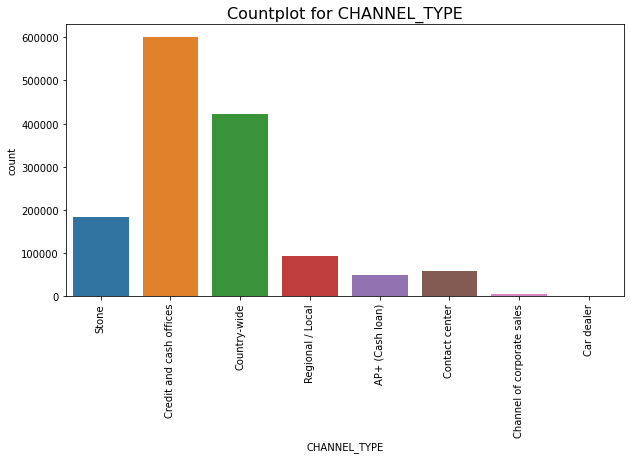

In [455]:

# Count plot for the CHANNEL_TYPE

plt.figure(figsize=(10,5))
sns.countplot(x=df_merge.CHANNEL_TYPE)
plt.title("Countplot for CHANNEL_TYPE", fontdict={'fontsize':16})
plt.xticks(rotation = 90)
plt.show()


In [456]:
# Observations

# Country-wide Channel type is the highest among all loan applications
# Credit and cash offices is the second highest Channel Type among all loan applications

In [457]:
# Analysis of NAME_YIELD_GROUP

# Checking the value counts of the column

df_merge.NAME_YIELD_GROUP.value_counts().sort_values(ascending = False)


XNA           429198
middle        324971
high          306061
low_normal    274884
low_action     78587
Name: NAME_YIELD_GROUP, dtype: int64

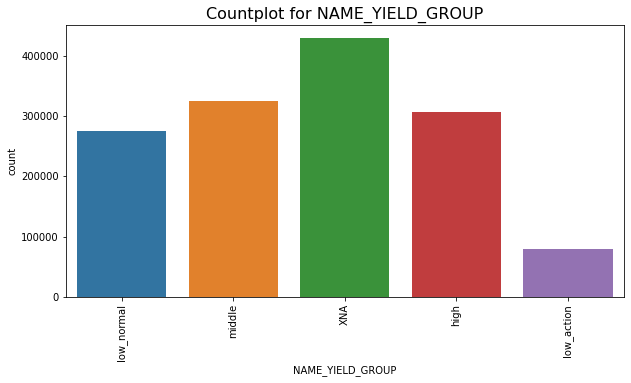

In [458]:

# Count plot for the NAME_YIELD_GROUP

plt.figure(figsize=(10,5))
sns.countplot(x=df_merge.NAME_YIELD_GROUP)
plt.title("Countplot for NAME_YIELD_GROUP", fontdict={'fontsize':16})
plt.xticks(rotation = 90)
plt.show()

In [459]:
# Observations

# XNA interest rate is the highest among all loan applications
# middle and high interest rates are the second and third highest among all loan applications

In [460]:
# Analysis of NAME_GOODS_CATEGORY

# Checking the value counts of the column

df_merge.NAME_GOODS_CATEGORY.value_counts().sort_values(ascending = False)

XNA                         797209
Mobile                      193743
Consumer Electronics        104785
Computers                    89923
Audio/Video                  85502
Furniture                    45439
Photo / Cinema Equipment     21707
Construction Materials       21356
Clothing and Accessories     19590
Auto Accessories              6228
Jewelry                       5188
Homewares                     4309
Medical Supplies              3240
Vehicles                      2854
Sport and Leisure             2540
Other                         2337
Gardening                     2322
Office Appliances             1985
Tourism                       1324
Medicine                      1302
Direct Sales                   330
Fitness                        166
Additional Service             109
Education                       89
Weapon                          65
Insurance                       58
Animals                          1
Name: NAME_GOODS_CATEGORY, dtype: int64

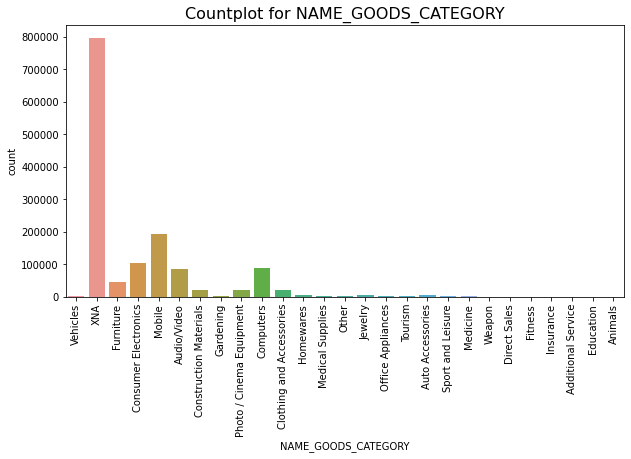

In [461]:

# Count plot for the NAME_GOODS_CATEGORY

plt.figure(figsize=(10,5))
sns.countplot(x=df_merge.NAME_GOODS_CATEGORY)
plt.title("Countplot for NAME_GOODS_CATEGORY", fontdict={'fontsize':16})
plt.xticks(rotation = 90)
plt.show()


In [462]:
# Observations

# XNA goods category is the highest among all loan applications
# mobile goods categoryis the second highest among all loan applications

Univariate analysis of numerical variables

In [464]:
# Analysis of AMT_APPLICATION

# Outlier identification of AMT_APPLICATION

Q1 = df_merge['AMT_APPLICATION'].quantile(0.25)
Q3 = df_merge['AMT_APPLICATION'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value}")
print(f"Max value after which outlier exist: {Max_value}")

160249.5
Min value before which outlier exist: -220623.75
Max value after which outlier exist: 420374.25


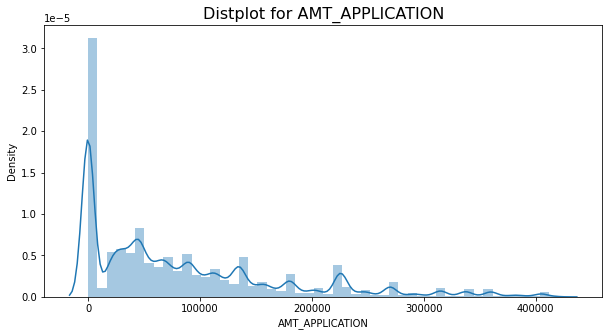

In [465]:
# Removing outliers and plotting distplot

df_merge = df_merge[(df_merge['AMT_APPLICATION'] > Min_value) & (df_merge['AMT_APPLICATION'] < Max_value)]
plt.figure(figsize=(10,5))
sns.distplot(df_merge['AMT_APPLICATION'])
plt.title("Distplot for AMT_APPLICATION", fontdict={'fontsize':16})
plt.show()


In [466]:
# Observations
 
# Most of the loan amount applied by the clients initially seems to be very small as can be seen from,
# the huge spike at the beginning of the distribution

In [467]:
# Analysis of AMT_ANNUITY_y

# Outlier identification of AMT_ANNUITY_y

Q1 = df_merge['AMT_ANNUITY_y'].quantile(0.25)
Q3 = df_merge['AMT_ANNUITY_y'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value}")
print(f"Max value after which outlier exist: {Max_value}")


9258.029999999999
Min value before which outlier exist: -8288.55
Max value after which outlier exist: 28743.57


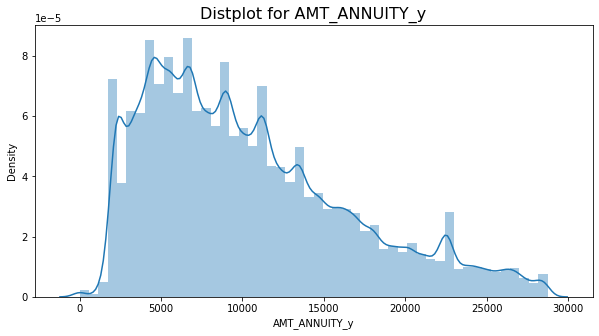

In [468]:

# Removing outliers and plotting distplot

df_merge = df_merge[(df_merge['AMT_ANNUITY_y'] > Min_value) & (df_merge['AMT_ANNUITY_y'] < Max_value)]
plt.figure(figsize=(10,5))
sns.distplot(df_merge['AMT_ANNUITY_y'])
plt.title("Distplot for AMT_ANNUITY_y", fontdict={'fontsize':16})
plt.show()

In [469]:
# Observations

# Most of the previous loan's annuity from the clients is less than 10,000 as the distribution is high here
# As previous loan's annuity increases, the no. of clients decreases

In [470]:
# Analysis of AMT_CREDIT_y

# Outlier identification of AMT_CREDIT_y

Q1 = df_merge['AMT_CREDIT_y'].quantile(0.25)
Q3 = df_merge['AMT_CREDIT_y'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value}")
print(f"Max value after which outlier exist: {Max_value}")


116856.0
Min value before which outlier exist: -130284.0
Max value after which outlier exist: 337140.0


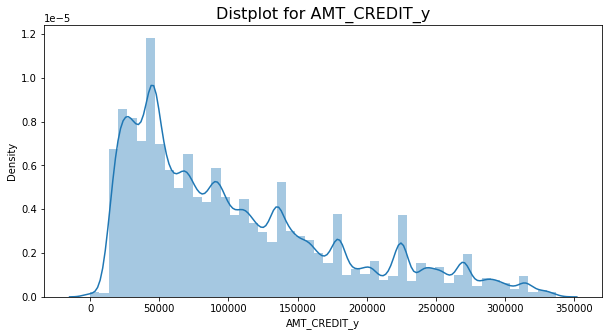

In [471]:

# Removing outliers and plotting distplot

df_merge = df_merge[(df_merge['AMT_CREDIT_y'] > Min_value) & (df_merge['AMT_CREDIT_y'] < Max_value)]
plt.figure(figsize=(10,5))
sns.distplot(df_merge['AMT_CREDIT_y'])
plt.title("Distplot for AMT_CREDIT_y", fontdict={'fontsize':16})
plt.show()

In [472]:
# Observations

# This distribution very closely resembles that of AMT_APPLICATION. This means that most people received the loan amount that they applied for

In [473]:
# Analysis of AMT_GOODS_PRICE_y

# Outlier identification of AMT_GOODS_PRICE_y

Q1 = df_merge['AMT_GOODS_PRICE_y'].quantile(0.25)
Q3 = df_merge['AMT_GOODS_PRICE_y'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print(f"Min value before which outlier exist: {Min_value}")
print(f"Max value after which outlier exist: {Max_value}")

90000.0
Min value before which outlier exist: -90000.0
Max value after which outlier exist: 270000.0


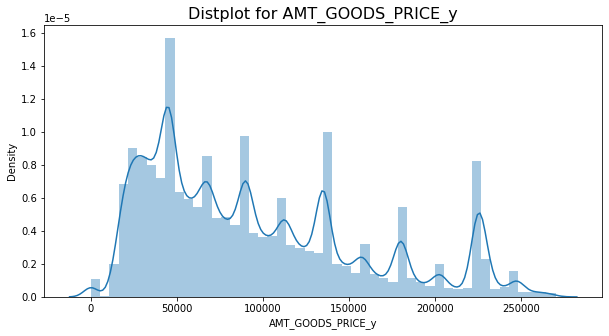

In [474]:

# Removing outliers and plotting distplot

df_merge = df_merge[(df_merge['AMT_GOODS_PRICE_y'] > Min_value) & (df_merge['AMT_GOODS_PRICE_y'] < Max_value)]
plt.figure(figsize=(10,5))
sns.distplot(df_merge['AMT_GOODS_PRICE_y'])
plt.title("Distplot for AMT_GOODS_PRICE_y", fontdict={'fontsize':16})
plt.show()

In [475]:
# Observations

# Most of the goods price asked by clients in previous application is less than 100K

### Correlation analysis of numerical variable
### Plotting correlation matrix

In [477]:
corr_df = df_merge[['AMT_ANNUITY_x', 'AMT_APPLICATION','AMT_CREDIT_x', 'AMT_GOODS_PRICE_x',
                    'AMT_ANNUITY_y', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'CNT_PAYMENT']].corr()

In [478]:
corr_df.head()

AMT_ANNUITY_x  AMT_APPLICATION  AMT_CREDIT_x  \
AMT_ANNUITY_x           1.000000         0.059574      0.767680   
AMT_APPLICATION         0.059574         1.000000      0.033962   
AMT_CREDIT_x            0.767680         0.033962      1.000000   
AMT_GOODS_PRICE_x       0.770220         0.032421      0.986282   
AMT_ANNUITY_y           0.113852         0.744167      0.059903   

                   AMT_GOODS_PRICE_x  AMT_ANNUITY_y  AMT_CREDIT_y  \
AMT_ANNUITY_x               0.770220       0.113852      0.039283   
AMT_APPLICATION             0.032421       0.744167      0.962975   
AMT_CREDIT_x                0.986282       0.059903      0.016860   
AMT_GOODS_PRICE_x           1.000000       0.059804      0.013731   
AMT_ANNUITY_y               0.059804       1.000000      0.725068   

                   AMT_GOODS_PRICE_y  CNT_PAYMENT  
AMT_ANNUITY_x               0.059604    -0.063761  
AMT_APPLICATION             0.999800     0.442333  
AMT_CREDIT_x                0.033981    -0.029354  
AMT_GOODS_PRICE_x           0.032432    -0.031783  
AMT_ANNUITY_y               0.744364     0.104971

In [482]:
# Creating HEatmap

plt.figure(figsize=(10,5))
sns.heatmap(corr_df, annot=True,cmap = "RdYlGn",fmt='.2f')
plt.title("Heatmap for correlation between variables", fontdict={'fontsize':16})
plt.show()


In [483]:
# Observations

# AMT_APPLICATION has a high correlation with AMT_ANNUITY_y,AMT_CREDIT_y,AMT_GOODS_PRICE_y and decent correlation with CNT_PAYMENT
# AMT_GOODS_PRICE_y has a high correlation with AMT_ANNUITY_y,AMT_CREDIT_y,AMT_APPLICATION and decent correlation with CNT_PAYMENT
# AMT_CREDIT_y has a high correlation with AMT_GOODS_PRICE_y and decent correlation with CNT_PAYMENT
# AMT_ANNUITY_x has a high correlation with AMT_GOODS_PRICE_y,AMT_CREDIT_y
# AMT_ANNUITY_x has a high correlation with AMT_GOODS_PRICE_x,AMT_CREDIT_x
# AMT_CREDIT_x has a high correlation with AMT_GOODS_PRICE_x

Bivariate/Multivariate analysis

Categorical V/S Categorical variables 

In [489]:
# Analysis of NAME_CONTRACT_STATUS V/S AMT_CREDIT_y V/S CODE_GENDER

In [494]:
# Analysis of age_category V/S NAME_CONTRACT_STATUS

def fn_bi_countplot_merge(column,hue_column):
    plt.figure(figsize = [20,8])
    palt = sns.color_palette("bright")

    sns.countplot(x = column, data = df_merge, 
                  order = sorted(df_merge[column].unique()), palette = palt,
                  hue = hue_column, hue_order = sorted(df_merge[hue_column].unique(), reverse = True))
    plt.xticks(rotation = 90)

    plt.tight_layout(pad = 4)
    plt.show()



In [495]:
fn_bi_countplot_merge('AGE_GROUP','NAME_CONTRACT_STATUS')


In [496]:
fn_bi_countplot_merge('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')

In [498]:
# Observations

# Clients who are Married receive the most approvals

In [499]:
# Analysis of NAME_EDUCATION_TYPE V/S NAME_CONTRACT_STATUS
fn_bi_countplot_merge('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

In [500]:
# Analysis of NAME_CLIENT_TYPE V/S NAME_CONTRACT_STATUS

fn_bi_countplot_merge('NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS')

In [501]:
# Observations

# Clients who are Repeaters receive the most approvals followed by New

In [503]:
# Conclusion: Client categories to be targeted for providing loan

# Clients who are employed for more than 19 years
# Clients in the age range 30-40 and 40-50
# Clients who are Married
# Male clients with Academic degree
# Students and Businessman
# Repeater clients

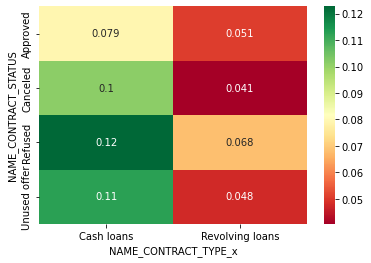

In [505]:
#Plotting Contract type vs Previous contact status vs Target variable
res = pd.pivot_table(data=df_merge,index="NAME_CONTRACT_STATUS",columns="NAME_CONTRACT_TYPE_x",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

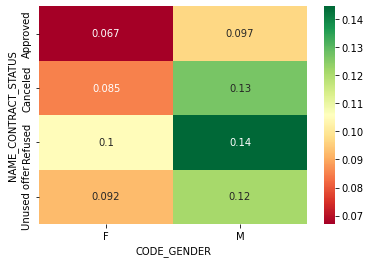

In [507]:
#Plotting Gender vs Previous contact status vs Target variable
res = pd.pivot_table(data=df_merge,index="NAME_CONTRACT_STATUS",columns="CODE_GENDER",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

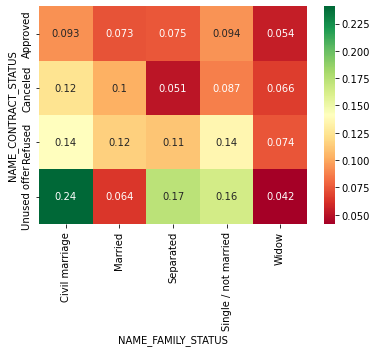

In [509]:
#Plotting Family status vs Previous contact status vs Target variable
res = pd.pivot_table(data=df_merge,index="NAME_CONTRACT_STATUS",columns="NAME_FAMILY_STATUS",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

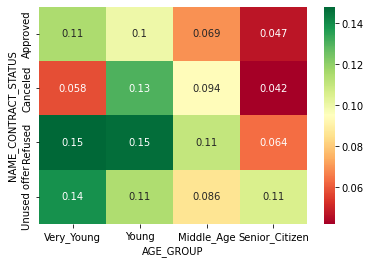

In [520]:
#Plotting FLag own realty vs Previous contact status vs Target variable
res = pd.pivot_table(data=df_merge,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()